In [2]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore", UserWarning)
import pandas as pd
import csv
import sys
import array
import xarray as xr
import cmocean.cm as cmocean
def write_with_byte_inversion(f, tab):
    tab2write = array.array('f', tab.T.flatten())
    if sys.byteorder == 'little':
        tab2write.byteswap()
    f.write(tab2write)

dtype=np.float32
#topo_adjust to topo wi
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import FuncFormatter
import pathlib
from pathlib import Path
import os
import netCDF4
from netCDF4 import Dataset as nc

import glob
from glob import glob
import glidertools as gt
import gsw
from scipy.interpolate import griddata
import cmocean
import cmocean.cm as cmo

# Along ATD

In [3]:
ds_work = xr.open_dataset('ds_ATD.nc')
ds_work

<xarray.Dataset>
Dimensions:    (ctd_depth: 2001, ATD: 844)
Coordinates:
  * ctd_depth  (ctd_depth) float64 0.0 0.5 1.0 1.5 ... 998.5 999.0 999.5 1e+03
  * ATD        (ATD) float64 0.0 2.0 4.0 6.0 ... 1.682e+03 1.684e+03 1.686e+03
    long       (ATD) float64 ...
    lat        (ATD) float64 ...
    time       (ATD) float64 ...
Data variables:
    temp       (ctd_depth, ATD) float64 ...
    salinity   (ctd_depth, ATD) float64 ...
    o2         (ctd_depth, ATD) float64 ...
    sol        (ctd_depth, ATD) float64 ...
    p          (ctd_depth, ATD) float64 ...
Attributes:
    description:  dataset including gridded data ATD and cleaned variables

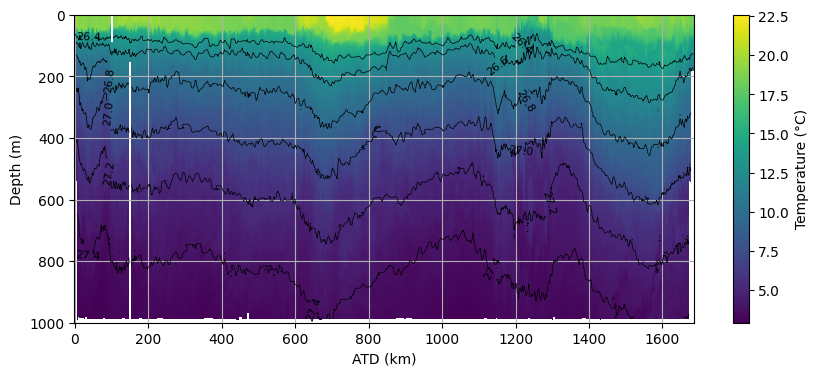

In [4]:
import matplotlib.pyplot as plt

# Adjust the figure size
plt.figure(figsize=(10, 4))  # Adjust width as needed, height is optional

# Plot the pcolormesh
plt.pcolormesh(ds_work.ATD, ds_work.ctd_depth, ds_work.temp)

# Add labels and title
plt.xlabel('ATD (km)', fontsize=10)
plt.ylabel('Depth (m)', fontsize=10)


# Add colorbar with label
cbar = plt.colorbar()
cbar.set_label('Temperature (°C)', fontsize=10)

density = gsw.sigma0(ds_work.salinity, ds_work.temp)

# Generate levels for the contour lines
# Specify the beginning, ending, and spacing
beginning = 26.4  # Beginning value
ending = 27.8    # Ending value
spacing = 0.2    # Spacing between contour lines
levels = np.arange(beginning, ending + spacing, spacing)

# Add density contour lines with specified levels and labels
contour = plt.contour(ds_work.ATD, ds_work.ctd_depth, density, levels=levels, colors='k', linewidths=0.5)
plt.clabel(contour, inline=True, fontsize=8)  # Add labels to contour lines

# Add grid lines
plt.grid()

# Invert y-axis
plt.gca().invert_yaxis()

# Show plot
plt.show()

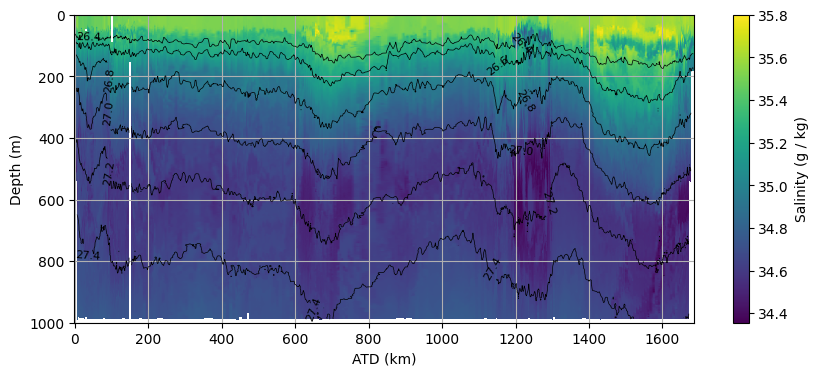

In [5]:
import matplotlib.pyplot as plt

# Adjust the figure size
plt.figure(figsize=(10, 4))  # Adjust width as needed, height is optional

# Plot the pcolormesh
plt.pcolormesh(ds_work.ATD, ds_work.ctd_depth, ds_work.salinity)

# Add labels and title
plt.xlabel('ATD (km)', fontsize=10)
plt.ylabel('Depth (m)', fontsize=10)


# Add colorbar with label
cbar = plt.colorbar()
cbar.set_label('Salinity (g / kg)', fontsize=10)

# Generate levels for the contour lines
# Specify the beginning, ending, and spacing
beginning = 26.4  # Beginning value
ending = 27.8    # Ending value
spacing = 0.2    # Spacing between contour lines
levels = np.arange(beginning, ending + spacing, spacing)

# Add density contour lines with specified levels and labels
contour = plt.contour(ds_work.ATD, ds_work.ctd_depth, density, levels=levels, colors='k', linewidths=0.5)
plt.clabel(contour, inline=True, fontsize=8)  # Add labels to contour lines

# Add grid lines
plt.grid()

# Invert y-axis
plt.gca().invert_yaxis()

# Show plot
plt.show()

In [6]:
density = gsw.sigma0(ds_work.salinity, ds_work.temp)

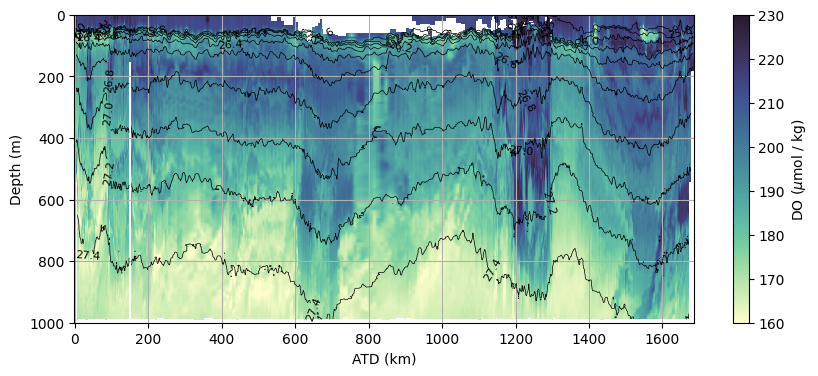

In [7]:
import matplotlib.pyplot as plt

# Adjust the figure size
plt.figure(figsize=(10, 4))  # Adjust width as needed, height is optional

# Plot the pcolormesh
plt.pcolormesh(ds_work.ATD, ds_work.ctd_depth, ds_work.o2, cmap = cmo.deep, vmin =160, vmax=230)



# Add labels and title
plt.xlabel('ATD (km)', fontsize=10)
plt.ylabel('Depth (m)', fontsize=10)


# Add colorbar with label
cbar = plt.colorbar()
cbar.set_label(r'DO ($\mu$mol / kg)', fontsize=10)

# Generate levels for the contour lines
# Specify the beginning, ending, and spacing
beginning = 25.6  # Beginning value
ending = 27.8    # Ending value
spacing = 0.2    # Spacing between contour lines
levels = np.arange(beginning, ending + spacing, spacing)

# Add density contour lines with specified levels and labels
contour = plt.contour(ds_work.ATD, ds_work.ctd_depth, density, levels=levels, colors='k', linewidths=0.5)
plt.clabel(contour, inline=True, fontsize=8)  # Add labels to contour lines

# Add grid lines
plt.grid()

#plt.xlim(1500,1600)
#plt.ylim(0,200)

# Invert y-axis
plt.gca().invert_yaxis()

# Show plot
plt.show()


In [8]:
AOU = ds_work.sol - ds_work.o2

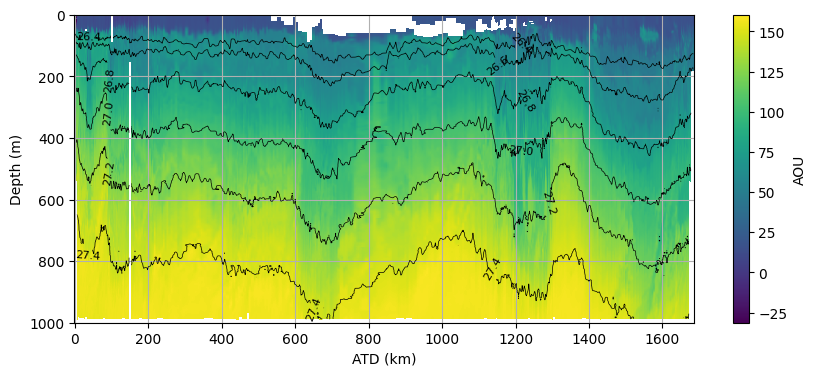

In [9]:
import matplotlib.pyplot as plt

# Adjust the figure size
plt.figure(figsize=(10, 4))  # Adjust width as needed, height is optional

# Plot the pcolormesh
plt.pcolormesh(ds_work.ATD, ds_work.ctd_depth, AOU)

# Add labels and title
plt.xlabel('ATD (km)', fontsize=10)
plt.ylabel('Depth (m)', fontsize=10)


# Add colorbar with label
cbar = plt.colorbar()
cbar.set_label('AOU', fontsize=10)

# Generate levels for the contour lines
# Specify the beginning, ending, and spacing
beginning = 26.4  # Beginning value
ending = 27.8    # Ending value
spacing = 0.2    # Spacing between contour lines
levels = np.arange(beginning, ending + spacing, spacing)

# Add density contour lines with specified levels and labels
contour = plt.contour(ds_work.ATD, ds_work.ctd_depth, density, levels=levels, colors='k', linewidths=0.5)
plt.clabel(contour, inline=True, fontsize=8)  # Add labels to contour lines



# Add grid lines
plt.grid()

# Invert y-axis
plt.gca().invert_yaxis()

# Show plot
plt.show()

# yearday

In [4]:
from datetime import datetime

# Define the start date of the year and the given date
start_of_year = datetime(2023, 1, 1)
given_date = datetime(2023, 3, 22, 8, 33, 43)

# Calculate the difference in days
difference = given_date - start_of_year

# The difference will be a timedelta object, so you can get the total number of seconds and convert to days
days_passed = difference.total_seconds() / (24 * 3600)

# Print the result rounded to 2 decimal places
print(f"Days passed since the start of the year: {days_passed:.2f}")



Days passed since the start of the year: 80.36


In [5]:
ds_work.time

<xarray.DataArray 'time' (ATD: 844)>
[844 values with dtype=float64]
Coordinates:
  * ATD      (ATD) float64 0.0 2.0 4.0 6.0 ... 1.682e+03 1.684e+03 1.686e+03
    long     (ATD) float64 ...
    lat      (ATD) float64 ...
    time     (ATD) float64 ...

In [6]:
ds_work['year_day'] = ds_work['time'] + days_passed

In [7]:
ds_work.year_day

<xarray.DataArray 'year_day' (ATD: 844)>
array([ 80.35674769,  80.48725731,  80.70809403,  81.19567735,
        81.52324966,  81.9407374 ,  82.51515446,  82.73937311,
        82.91872426,  83.01442086,  83.14574481,  83.28683165,
        83.42396414,  83.53186335,  83.61358091,  83.73955552,
        83.84255865,  83.95626696,  84.0807703 ,  84.20562316,
        84.31394714,  84.4083461 ,  84.48907269,  84.55561822,
        84.62186767,  84.68783646,  84.75497105,  84.82314644,
        84.89337044,  84.96472371,  85.03645811,  85.10727862,
        85.17924989,  85.25929762,  85.39750896,  85.56109215,
        85.65075481,  85.75805881,  85.9079438 ,  86.05912082,
        86.20160985,  86.34574241,  86.4975862 ,  86.64606523,
        86.81001784,  86.98013744,  87.1603664 ,  87.46461789,
        88.26003078,  88.73193607,  88.99215962,  89.14388443,
        89.3126896 ,  89.57019387,  89.78652009,  89.95761378,
        90.16777548,  90.35835828,  90.53061736,  90.71047026,
        90.89386623,  91.07534459,  91.24002789,  91.39014148,
        91.55652045,  91.72173339,  91.87090153,  92.05877894,
        92.16881034,  92.28318883,  92.49080233,  92.61855195,
        92.74278514,  92.88334722,  93.24145086,  93.63638939,
        93.77920889,  93.95330416,  94.11300319,  94.25453566,
...
       134.61364196, 134.6726976 , 134.73874449, 134.805039  ,
       134.86900135, 134.93423458, 135.00210253, 135.06597096,
       135.12835194, 135.19137606, 135.25447889, 135.31700074,
       135.38055646, 135.44969224, 135.51417905, 135.57596787,
       135.64077859, 135.70629883, 135.76936336, 135.82931188,
       135.8848555 , 135.94000087, 135.99467346, 136.05047518,
       136.10889133, 136.16766449, 136.22685455, 136.28706684,
       136.3485379 , 136.4083574 , 136.46772968, 136.5332909 ,
       136.6000177 , 136.66445791, 136.7308201 , 136.79925922,
       136.86880634, 136.93829865, 137.00598139, 137.07430891,
       137.1432432 , 137.21089597, 137.27766213, 137.34169045,
       137.40657324, 137.47408782, 137.54188107, 137.60985232,
       137.68030755, 137.75197588, 137.82544316, 137.89911581,
       137.9730032 , 138.0471894 , 138.1234355 , 138.20112347,
       138.27803756, 138.35430754, 138.4329716 , 138.54384402,
       138.75100947, 138.9511843 , 139.16460463, 139.44729854,
       139.64070506, 139.8269348 , 140.01596963, 140.2309403 ,
       140.44790644, 140.67964118, 140.90020653, 141.10786148,
       141.32355616, 141.56902498, 141.79645144, 142.01332898,
       142.24861944, 142.37405685, 142.51929745,          nan])
Coordinates:
  * ATD      (ATD) float64 0.0 2.0 4.0 6.0 ... 1.682e+03 1.684e+03 1.686e+03
    long     (ATD) float64 ...
    lat      (ATD) float64 ...
    time     (ATD) float64 0.0 0.1305 0.3513 0.8389 ... 61.89 62.02 62.16 nan

# mixed layer depth

In [9]:
import numpy as np
import xarray as xr
import gsw

mixed_layer_densities = []

for i in range(len(ds_work.ATD)):
    # Calculate density and density difference for the current ATD point
    density = gsw.sigma0(ds_work.salinity.isel(ATD=i), ds_work.temp.isel(ATD=i)).expand_dims(ATD=ds_work.ATD)
    reference_density = density.sel(ctd_depth=10)
    density_difference = density - reference_density
    
    # Find the index where the difference is greater than the threshold for the first time
    mixed_layer_index_flat = np.argmax((density_difference > 0.03).values)
    
    # Get the depth index where the difference is greater than the threshold for the first time
    mixed_layer_index = mixed_layer_index_flat.item()
    
    # Get the density value at that depth for the current ATD point
    mixed_layer_density = density.isel(ctd_depth=mixed_layer_index, ATD=i)
    
    # Append the mixed layer density directly to the list
    mixed_layer_densities.append(mixed_layer_density)

# Concatenate the list of mixed layer densities along the ATD dimension
mixed_layer_densities = xr.concat(mixed_layer_densities, dim=ds_work.ATD)

mixed_layer_densities




<xarray.DataArray 'salinity' (ATD: 844)>
array([        nan, 25.09528048, 25.09130207, 25.21229797, 25.23086822,
       25.25042239, 25.27111462, 25.27929194, 25.28868478, 25.39673036,
       25.28932862, 25.2933274 , 25.25110892, 25.24920488, 25.25499219,
       25.91846863, 25.591859  , 25.35094455, 25.29714447, 25.35394752,
       25.32914709, 25.32173836, 25.31416335, 25.3179581 , 25.31562688,
       25.32363386, 25.31181075, 25.38384472, 25.31091812, 25.34581689,
       25.32329553, 25.31836739, 25.33151112, 25.36832092, 25.36040952,
       25.35651193, 25.34537194, 25.38500787, 25.33302814, 25.29742749,
       25.31504483, 25.29849304, 25.29881692, 25.31452656, 25.35498611,
       25.34087905, 25.29779025, 25.27121291, 25.23416139, 25.23533493,
               nan,         nan, 25.28231811, 25.23499856, 25.23753009,
       25.24708002, 25.25483888, 25.21835994, 25.20460312, 25.16820602,
       25.18391963, 25.16088583, 25.16624719, 25.13108291, 25.14049886,
       25.12110891, 25.09756892, 25.102685  , 25.09896856, 25.1021936 ,
       25.08716069, 25.08554581, 25.08586947, 25.08626614, 25.18897015,
       25.24056388, 25.24939906, 25.21210083, 25.18719286, 25.16112539,
       25.15447321, 25.17812035, 25.14047162, 25.1272706 , 25.11394094,
       25.11829465, 25.12868515, 25.14481481, 25.15389927, 25.13928746,
       25.12941162, 25.12697892, 25.12717352, 25.12670942, 25.13033701,
       25.12646148, 25.12948723, 25.12909266, 25.12245562, 25.11371547,
...
       25.48713636, 25.46529805, 25.47394157, 25.51941578, 25.52792119,
       25.53921029, 25.50979095, 25.4941807 , 25.49718851, 25.49589784,
       25.49685405, 25.50074087, 25.50139005, 25.50332594, 25.52097813,
       25.5292504 , 25.53565947, 25.48868538, 25.42080475, 25.35660379,
       25.29081581, 25.23989958, 25.21491112, 25.21772992, 25.22890756,
       25.25845594, 25.27311984, 25.26785026, 25.28863288, 25.3113634 ,
       25.30933712, 25.31210404, 25.32884749, 25.33961641, 25.34415545,
       25.32040651, 25.28844314, 25.29053871, 25.29136778, 25.2919805 ,
       25.29347431, 25.29123055, 25.31124914, 25.34843206, 25.3751167 ,
       25.37439646, 25.37895521, 25.41327969, 25.39269741, 25.39144616,
       25.38633704, 25.37078685, 25.37602714, 25.42333629, 25.51209443,
       25.52245833, 25.51907785, 25.49793362, 25.49202226, 25.49202253,
       25.50608011, 25.52114996, 25.52140649, 25.49768834, 25.40353199,
       25.36468812, 25.36791851, 25.34842656, 25.32908506, 25.33143581,
       25.35029241, 25.38611322, 25.3933763 , 25.41988873, 25.46386197,
       25.45914929, 25.44368621, 25.42767881, 25.41619219, 25.42240284,
       25.49893509, 25.32017386, 25.28556083, 25.30027323, 25.37665436,
       25.35630603, 25.45418785, 25.44322146, 25.4670805 , 25.46648774,
       25.46134837, 25.49532142, 25.54351189, 25.56092467, 25.56836845,
       25.55390421, 25.55527799, 25.57306081,         nan])
Coordinates:
  * ATD        (ATD) float64 0.0 2.0 4.0 6.0 ... 1.682e+03 1.684e+03 1.686e+03
    ctd_depth  (ATD) float64 0.0 35.5 34.0 45.5 44.0 ... 42.0 35.5 31.5 18.0 0.0
    long       (ATD) float64 17.32 17.34 17.35 17.35 ... 16.86 16.84 16.82 nan
    lat        (ATD) float64 -37.52 -37.53 -37.54 -37.54 ... -34.2 -34.19 nan
    time       (ATD) float64 0.0 0.1305 0.3513 0.8389 ... 61.89 62.02 62.16 nan

In [ ]:
plt.plot(density[0],)

Text(0, 0.5, 'MLD (m)')

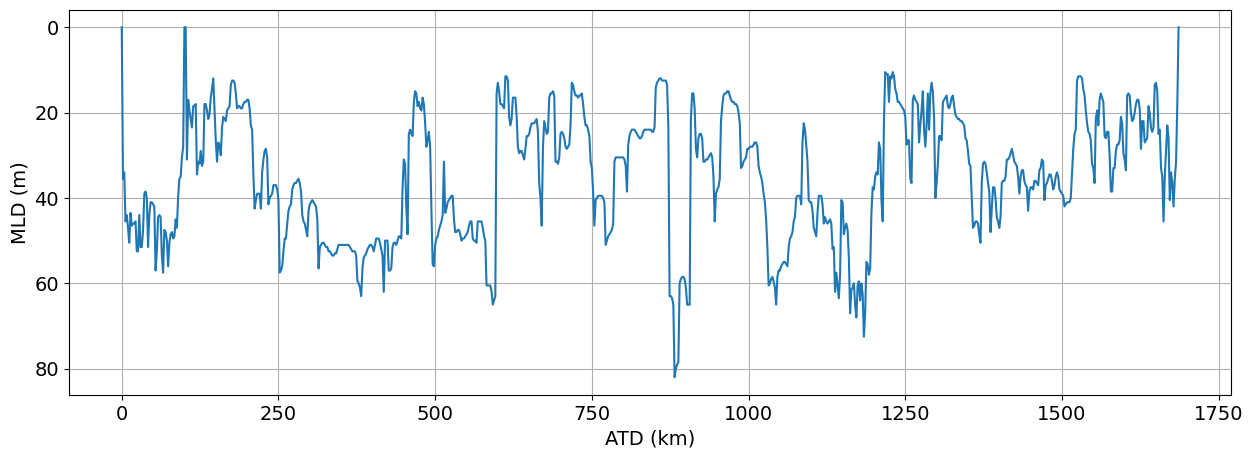

In [119]:
plt.figure(figsize=(15,5))
plt.plot(mixed_layer_densities.ATD, mixed_layer_densities.ctd_depth)
# Invert y-axis
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel('ATD (km)')
plt.ylabel('MLD (m)')

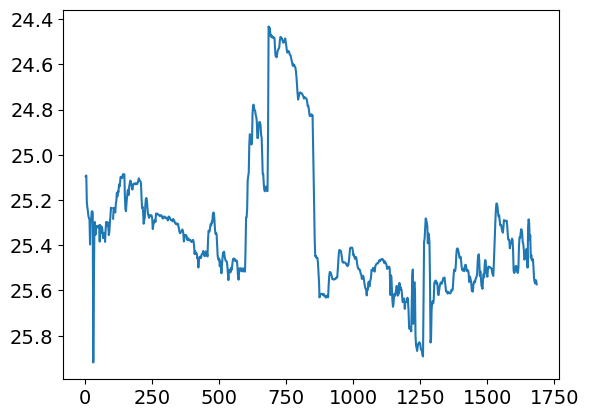

In [120]:
plt.plot(mixed_layer_densities.ATD, mixed_layer_densities)
plt.gca().invert_yaxis()


In [185]:
mixed_layer_data1 = mixed_layer_densities.sel(ATD=2)

mixed_layer_data1

<xarray.DataArray 'salinity' ()>
array(25.09528048)
Coordinates:
    ATD        float64 2.0
    ctd_depth  float64 35.5
    long       float64 17.34
    lat        float64 -37.53
    time       float64 0.1305

In [188]:
for atd in density.ATD:
    plt.figure()
    
    # Select the data for the current ATD
    atd_data = density.sel(ATD=atd)
    mixed_layer_data = mixed_layer_densities.sel(ATD=atd)
    
    # Plot density
    plt.plot(atd_data, density.ctd_depth, label='Density')
    
    plt.scatter(mixed_layer_data, mixed_layer_data.ctd_depth)
    
    # Set labels and title
    plt.xlabel('Density')
    plt.ylabel('CTD Depth')
    plt.title(f'Profile at ATD {float(atd.values):.0f}')
    plt.gca().invert_yaxis()  # Invert y-axis to have depth increasing downwards
    plt.legend()
    
    # Save the plot
    plt.savefig(os.path.join(output_dir, f'profile_at_ATD_{float(atd.values):.0f}.png'))
    plt.close()

print(f'All plots saved in the {output_dir} folder.')

All plots saved in the MLD folder.


 # combined figure result

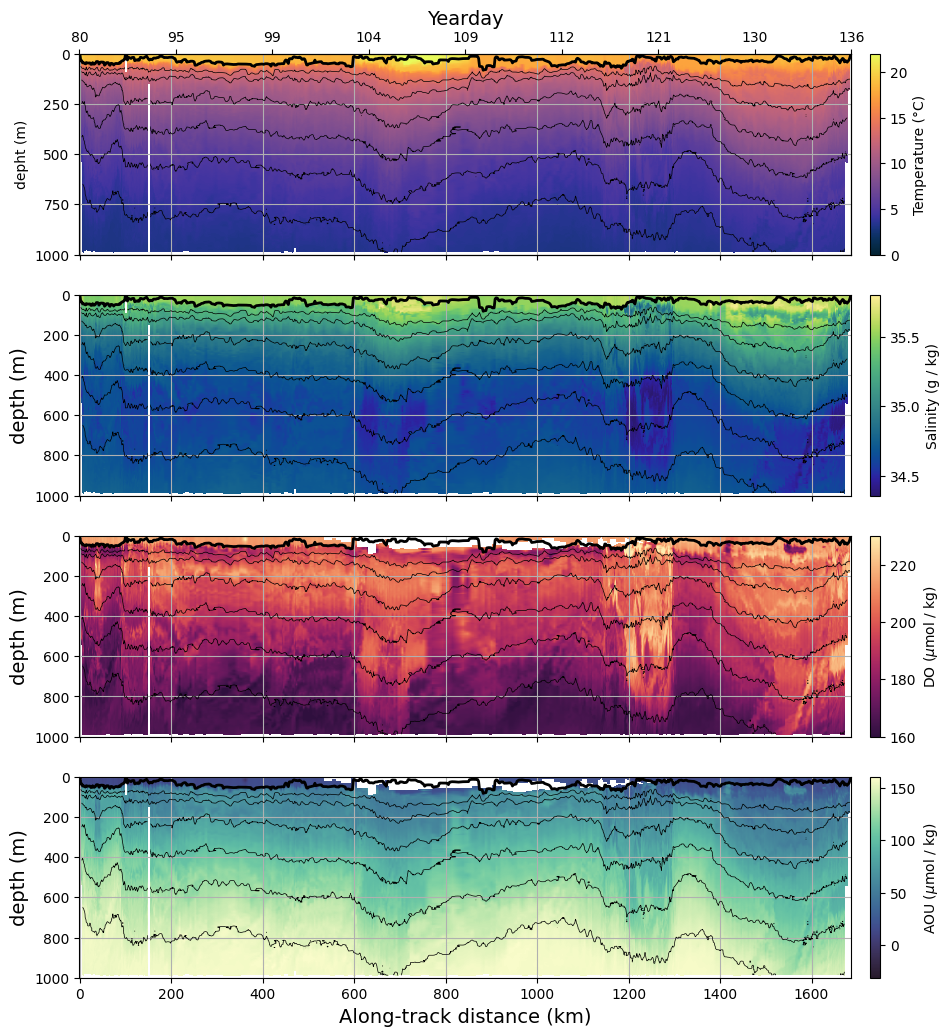

In [10]:
fig, ax = plt.subplots(4, figsize=(12, 12), sharex=True)

vmin = 160
vmax = 230

density = gsw.sigma0(ds_work.salinity, ds_work.temp)
AOU = ds_work.sol - ds_work.o2

# Create the bar chart
img0 = ax[0].pcolormesh(ds_work.ATD, ds_work.ctd_depth, ds_work.temp, cmap = cmo.thermal, vmin =0, vmax =22)
img1 = ax[1].pcolormesh(ds_work.ATD, ds_work.ctd_depth, ds_work.salinity, cmap = cmo.haline)
img2 = ax[2].pcolormesh(ds_work.ATD, ds_work.ctd_depth, ds_work.o2, cmap = cmo.matter_r, vmin =160, vmax=230)
img3 = ax[3].pcolormesh(ds_work.ATD, ds_work.ctd_depth, AOU, cmap = cmo.deep_r)

[a.invert_yaxis() for a in ax]
# Add colorbars to the plots
cbar0 = plt.colorbar(img0, ax=ax[0], pad=0.02)
cbar0.set_label('Temperature (°C)')

cbar1 = plt.colorbar(img1, ax=ax[1], pad=0.02)
cbar1.set_label('Salinity (g / kg)')

cbar2 = plt.colorbar(img2, ax=ax[2], pad=0.02)
cbar2.set_label(r'DO ($\mu$mol / kg)')

cbar3 = plt.colorbar(img3, ax=ax[3], pad=0.02)
cbar3.set_label(r'AOU ($\mu$mol / kg)')





#ax[0].set_title('Temperature')
#ax[1].set_title('Salinity')
#ax[2].set_title('DO')
#ax[3].set_title('AOU')

ax[3].set_xlabel('Along-track distance (km)')
ax[0].set_ylabel('depht (m)')
ax[1].set_ylabel('depth (m)')
ax[2].set_ylabel('depth (m)')
ax[3].set_ylabel('depth (m)')

ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()

# Generate levels for the contour lines
# Specify the beginning, ending, and spacing
beginning = 26.4  # Beginning value
ending = 27.8    # Ending value
spacing = 0.2    # Spacing between contour lines
levels = np.arange(beginning, ending + spacing, spacing)

ax[0].contour(ds_work.ATD, ds_work.ctd_depth, density, levels=levels, colors='k', linewidths=0.5)
ax[1].contour(ds_work.ATD, ds_work.ctd_depth, density, levels=levels, colors='k', linewidths=0.5)
ax[2].contour(ds_work.ATD, ds_work.ctd_depth, density, levels=levels, colors='k', linewidths=0.5)
ax[3].contour(ds_work.ATD, ds_work.ctd_depth, density, levels=levels, colors='k', linewidths=0.5)

ax[0].plot(mixed_layer_densities.ATD, mixed_layer_densities.ctd_depth, color='k', linewidth =2)
ax[1].plot(mixed_layer_densities.ATD, mixed_layer_densities.ctd_depth, color='k', linewidth =2)
ax[2].plot(mixed_layer_densities.ATD, mixed_layer_densities.ctd_depth, color='k', linewidth =2)
ax[3].plot(mixed_layer_densities.ATD, mixed_layer_densities.ctd_depth, color='k', linewidth =2)



# Increase font sizes for all text and numbers
plt.rcParams.update({'font.size': 14})  # Set the default font size

# Set the xlabel on the top
ax[0] = ax[0].twiny()
ax[0].set_xlabel('Yearday')

tick_positions = np.arange(0, max(ds_work.ATD), 200)
tick_labels = ds_work.year_day[np.searchsorted(ds_work.ATD, tick_positions)].astype(int)  # Convert to integers
ax[0].set_xticks(tick_positions)
ax[0].set_xticklabels([f'{t:.0f}' for t in tick_labels])

# Set font sizes for specific elements
for a in ax:
    a.set_title(a.get_title(), fontsize=14)  # Increase title font size
    a.set_xlabel(a.get_xlabel(), fontsize=14)  # Increase x-axis label font size
    a.set_ylabel(a.get_ylabel(), fontsize=14)  # Increase y-axis label font size
    a.tick_params(axis='both', which='major', labelsize=10)  # Increase tick label font size

#colorbar_ax0.tick_params(axis='both', which='major', labelsize=10)    
#colorbar_ax1.tick_params(axis='both', which='major', labelsize=10)  # Increase colorbar tick label font size
#colorbar_ax2.tick_params(axis='both', which='major', labelsize=10)  
#colorbar_ax3.tick_params(axis='both', which='major', labelsize=10)  

# Increase font size for colorbar labels
#colorbar_ax0.set_ylabel(colorbar_ax0.get_ylabel(), fontsize=12) 
#colorbar_ax1.set_ylabel(colorbar_ax1.get_ylabel(), fontsize=12)  
#colorbar_ax2.set_ylabel(colorbar_ax2.get_ylabel(), fontsize=12)  
#colorbar_ax3.set_ylabel(colorbar_ax3.get_ylabel(), fontsize=12)  



# Save the figure
plt.savefig('CombinedATD.png', bbox_inches='tight', dpi=100)

In [168]:
ds_work.ATD

<xarray.DataArray 'ATD' (ATD: 844)>
array([   0.,    2.,    4., ..., 1682., 1684., 1686.])
Coordinates:
  * ATD      (ATD) float64 0.0 2.0 4.0 6.0 ... 1.682e+03 1.684e+03 1.686e+03
    long     (ATD) float64 ...
    lat      (ATD) float64 ...
    time     (ATD) float64 0.0 0.1305 0.3513 0.8389 ... 61.89 62.02 62.16 nan

In [166]:
tick_positions

array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.])

In [160]:
ds_work

<xarray.Dataset>
Dimensions:    (ctd_depth: 2001, ATD: 844)
Coordinates:
  * ctd_depth  (ctd_depth) float64 0.0 0.5 1.0 1.5 ... 998.5 999.0 999.5 1e+03
  * ATD        (ATD) float64 0.0 2.0 4.0 6.0 ... 1.682e+03 1.684e+03 1.686e+03
    long       (ATD) float64 ...
    lat        (ATD) float64 ...
    time       (ATD) float64 0.0 0.1305 0.3513 0.8389 ... 61.89 62.02 62.16 nan
Data variables:
    temp       (ctd_depth, ATD) float64 nan nan nan nan nan ... nan nan nan nan
    salinity   (ctd_depth, ATD) float64 nan nan nan nan nan ... nan nan nan nan
    o2         (ctd_depth, ATD) float64 nan 214.4 212.8 211.7 ... nan nan nan
    sol        (ctd_depth, ATD) float64 ...
    p          (ctd_depth, ATD) float64 ...
    year_day   (ATD) float64 80.36 80.49 80.71 81.2 ... 142.2 142.4 142.5 nan
Attributes:
    description:  dataset including gridded data ATD and cleaned variables

# along time

In [11]:
ds_work = xr.open_dataset('ds_time.nc')
ds_work

<xarray.Dataset>
Dimensions:    (ctd_depth: 2001, time: 624)
Coordinates:
  * ctd_depth  (ctd_depth) float64 0.0 0.5 1.0 1.5 ... 998.5 999.0 999.5 1e+03
  * time       (time) float64 0.0 0.1 0.2 0.3 0.4 ... 61.9 62.0 62.1 62.2 62.3
    long       (time) float64 ...
    lat        (time) float64 ...
    ATD        (time) float64 ...
Data variables:
    temp       (ctd_depth, time) float64 ...
    salinity   (ctd_depth, time) float64 ...
    o2         (ctd_depth, time) float64 ...
    sol        (ctd_depth, time) float64 ...
    p          (ctd_depth, time) float64 ...
Attributes:
    description:  dataset including gridded data time and cleaned variables

In [ ]:
import matplotlib.pyplot as plt

# Adjust the figure size
plt.figure(figsize=(10, 4))  # Adjust width as needed, height is optional

# Plot the pcolormesh
plt.pcolormesh(ds_work.time, ds_work.ctd_depth, ds_work.temp)

# Add labels and title
plt.xlabel('Time (days)', fontsize=10)
plt.ylabel('Depth (m)', fontsize=10)


# Add colorbar with label
cbar = plt.colorbar()
cbar.set_label('Temperature (°C)', fontsize=10)

density = gsw.sigma0(ds_work.salinity, ds_work.temp)


# Generate levels for the contour lines
# Specify the beginning, ending, and spacing
beginning = 26.4  # Beginning value
ending = 27.8    # Ending value
spacing = 0.2    # Spacing between contour lines
levels = np.arange(beginning, ending + spacing, spacing)

# Add density contour lines with specified levels and labels
contour = plt.contour(ds_work.time, ds_work.ctd_depth, density, levels=levels, colors='k', linewidths=0.5)
plt.clabel(contour, inline=True, fontsize=8)  # Add labels to contour lines

# Add grid lines
plt.grid()

# Invert y-axis
plt.gca().invert_yaxis()

# Show plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Adjust the figure size
plt.figure(figsize=(10, 4))  # Adjust width as needed, height is optional

# Plot the pcolormesh
plt.pcolormesh(ds_work.time, ds_work.ctd_depth, ds_work.salinity)

# Add labels and title
plt.xlabel('Time (days)', fontsize=10)
plt.ylabel('Depth (m)', fontsize=10)


# Add colorbar with label
cbar = plt.colorbar()
cbar.set_label('Salinity (g / kg)', fontsize=10)

# Generate levels for the contour lines
# Specify the beginning, ending, and spacing
beginning = 26.4  # Beginning value
ending = 27.8    # Ending value
spacing = 0.2    # Spacing between contour lines
levels = np.arange(beginning, ending + spacing, spacing)

# Add density contour lines with specified levels and labels
contour = plt.contour(ds_work.time, ds_work.ctd_depth, density, levels=levels, colors='k', linewidths=0.5)
plt.clabel(contour, inline=True, fontsize=8)  # Add labels to contour lines


# Add grid lines
plt.grid()

# Invert y-axis
plt.gca().invert_yaxis()

# Show plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Adjust the figure size
plt.figure(figsize=(10, 4))  # Adjust width as needed, height is optional

# Plot the pcolormesh
plt.pcolormesh(ds_work.time, ds_work.ctd_depth, ds_work.o2)

# Add labels and title
plt.xlabel('time (days)', fontsize=10)
plt.ylabel('Depth (m)', fontsize=10)


# Add colorbar with label
cbar = plt.colorbar()
cbar.set_label(r'DO ($\mu$mol / kg)', fontsize=10)


# Generate levels for the contour lines
# Specify the beginning, ending, and spacing
beginning = 26.4  # Beginning value
ending = 27.8    # Ending value
spacing = 0.2    # Spacing between contour lines
levels = np.arange(beginning, ending + spacing, spacing)

# Add density contour lines with specified levels and labels
contour = plt.contour(ds_work.time, ds_work.ctd_depth, density, levels=levels, colors='k', linewidths=0.5)
plt.clabel(contour, inline=True, fontsize=8)  # Add labels to contour lines

plt.xlim(50,60)

# Add grid lines
plt.grid()

# Invert y-axis
plt.gca().invert_yaxis()

# Show plot
plt.show()

# retrieve coordinates and times

In [12]:
# Get the latitude and longitude values at time index 55
lat_at_55 = ds_work.lat.isel(time=55).values
lon_at_55 = ds_work.long.isel(time=55).values

print("Latitude at time index 55:", lat_at_55)
print("Longitude at time index 55:", lon_at_55)


Latitude at time index 55: -37.56563740764413
Longitude at time index 55: 17.873695886305097


In [13]:
ds_old = xr.open_dataset('ds_work.nc')
ds_old.ctd_time_dt64.values
# Convert NumPy datetime values to pandas DatetimeIndex
dt_index = pd.to_datetime(ds_old.ctd_time_dt64.values)

# Select the datetime value at index 50 and add 50 days
value_after_0_days = dt_index[0] + pd.Timedelta(days=0)

print("Value after 0 days:", value_after_0_days)

Value after 0 days: 2023-03-22 08:33:43


In [ ]:
ds_time

In [ ]:
ds

# dataset with time in dates instead of days

In [14]:
import xarray as xr
import numpy as np
from datetime import datetime, timedelta

# Load your dataset
# Replace 'your_dataset.nc' with the path to your dataset file
ds_date = xr.open_dataset('ds_time.nc')

# Define start and end datetime objects
start_date = datetime(2023, 3, 22, 8, 33, 43)
end_date = datetime(2023, 5, 23, 15, 45, 43)

# Calculate timedelta
time_delta = end_date - start_date

# Convert time coordinates from days to datetime objects
ds_date['time'] = [start_date + timedelta(days=float(day)) for day in ds_date['time']]

# Show updated dataset
print(ds_date)


<xarray.Dataset>
Dimensions:    (ctd_depth: 2001, time: 624)
Coordinates:
  * ctd_depth  (ctd_depth) float64 0.0 0.5 1.0 1.5 ... 998.5 999.0 999.5 1e+03
  * time       (time) datetime64[ns] 2023-03-22T08:33:43 ... 2023-05-23T15:45:43
    long       (time) float64 ...
    lat        (time) float64 ...
    ATD        (time) float64 ...
Data variables:
    temp       (ctd_depth, time) float64 ...
    salinity   (ctd_depth, time) float64 ...
    o2         (ctd_depth, time) float64 ...
    sol        (ctd_depth, time) float64 ...
    p          (ctd_depth, time) float64 ...
Attributes:
    description:  dataset including gridded data time and cleaned variables


In [20]:
ds


<xarray.Dataset>
Dimensions:         (time: 1, latitude: 720, nv: 2, longitude: 1440)
Coordinates:
  * time            (time) datetime64[ns] 2023-05-23
  * latitude        (latitude) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * longitude       (longitude) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
  * nv              (nv) int32 0 1
Data variables: (12/14)
    crs             int32 ...
    lat_bnds        (latitude, nv) float32 ...
    lon_bnds        (longitude, nv) float32 ...
    sla             (time, latitude, longitude) float64 ...
    err_sla         (time, latitude, longitude) float64 ...
    ugosa           (time, latitude, longitude) float64 ...
    ...              ...
    err_vgosa       (time, latitude, longitude) float64 ...
    adt             (time, latitude, longitude) float64 ...
    ugos            (time, latitude, longitude) float64 ...
    vgos            (time, latitude, longitude) float64 ...
    tpa_correction  (time) float64 ...
    flag_ice        (time, latitude, longitude) float64 ...
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         http://climate.copernicus.eu/c3s-user-se...
    creator_email:                   http://climate.copernicus.eu/c3s-user-se...
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2023-05-23T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2023-05-22T12:00:00Z
    title:                           DT merged two satellites Global Ocean Gr...

In [ ]:
print(ds.adt.isel(time=0))

# location glider and changing SSH + ADT + u and v geostrophic

In [19]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from PIL import Image
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# Define start and end dates
start_date = pd.to_datetime("2023-03-22")
end_date = pd.to_datetime("2023-05-23")


# vmin and vmax
vmin = -2.0
vmax = 2.0
#cmap = 'balance'

# Define the file path pattern
file_path_pattern = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/may/dt_global_twosat_phy_l4_{:%Y%m%d}_vDT2021.nc"

# Select latitude and longitude range
lat_range = slice(-42, -32)
lon_range = slice(12, 21)

    
# Initialize a list to store image paths
image_paths = []

# Iterate over the dates
for current_date in pd.date_range(start=start_date, end=end_date):
    file_path = file_path_pattern.format(current_date)
    if not os.path.exists(file_path):  # Check if the file exists
        continue
    
    ds = xr.open_dataset(file_path)
    
    # Calculate EKE
    ugos = ds['ugos'].sel(latitude=lat_range, longitude=lon_range)
    vgos = ds['vgos'].sel(latitude=lat_range, longitude=lon_range)

    latitude = ds['latitude']
    longitude = ds['longitude']
    # Extract sea surface height data for the specified region
    ssh_subset = ds['sla'].sel(latitude=lat_range, longitude=lon_range) # (Sea Level Anomaly)
    adt_subset = ds['adt'].sel(latitude=lat_range, longitude=lon_range) # (ADT)
    
    plt.figure(figsize=(10, 6)) # Adjust the figure size to make space for the title
    # Create a map projection
    ax = plt.axes(projection=ccrs.PlateCarree())
    # Plot the data on the map with fixed colorbar range and colormap
    plt.contourf(ssh_subset.longitude, ssh_subset.latitude, ssh_subset.isel(time=0),
                 transform=ccrs.PlateCarree(), cmap=cmo.balance, levels=np.arange(vmin, vmax, 0.1))
    plt.colorbar(label='Sea Level Anomaly (m)', pad=0.1)
    
    # Add the thick black contour line
    plt.contour(adt_subset.longitude, adt_subset.latitude, adt_subset.isel(time=0),
                levels=[0.6], colors='black', linewidths=2, transform=ccrs.PlateCarree())
 
    
  
    # Add coastlines and gridlines
    ax.coastlines()
    ax.gridlines(draw_labels=True)

    # Set labels and title
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    
    
   
    # Plot quiver plot
    plt.quiver(ds.longitude.sel(longitude=lon_range),
                       ds.latitude.sel(latitude=lat_range), ugos.isel(time=0), vgos.isel(time=0))
    
    # Extract latitude and longitude corresponding to the current day
    day_time = ds_date['time'].sel(time=current_date, method='nearest')  # Select nearest time slice
    lat = ds_date['lat'].sel(time=day_time)
    lon = ds_date['long'].sel(time=day_time)
    
    
    # Add the current date as a title above the graph
    day = current_date.strftime("%B %d")
    plt.title(f'SLA and Geostrophic Currents on {day}', pad=30)

    # Add a dot at the specified latitude and longitude
    plt.scatter(lon, lat, color='red', label='location glider')
    
    # Show legend in the top right corner
    plt.legend(loc='upper right', bbox_to_anchor=(0.97, 0.95), borderaxespad=0.)
    
    plt.grid(True) 
    
    
    
    # Save the plot as an image
    day = current_date.strftime("%Y%m%d")
    image_path = f"sla_{day}.png"
    plt.savefig(image_path)
    plt.close()  # Close the plot to prevent displaying each plot

    image_paths.append(image_path)



# Combine the images into a GIF
images = [Image.open(image_path) for image_path in image_paths]
gif_path = "sla.gif"
images[0].save(gif_path, save_all=True, append_images=images[1:], duration=500, loop=0)

print(f"GIF saved at: {gif_path}")

    


GIF saved at: sla.gif


In [173]:
ds

<xarray.Dataset>
Dimensions:         (time: 1, latitude: 720, nv: 2, longitude: 1440)
Coordinates:
  * time            (time) datetime64[ns] 2023-05-23
  * latitude        (latitude) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * longitude       (longitude) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
  * nv              (nv) int32 0 1
Data variables: (12/14)
    crs             int32 ...
    lat_bnds        (latitude, nv) float32 ...
    lon_bnds        (longitude, nv) float32 ...
    sla             (time, latitude, longitude) float64 ...
    err_sla         (time, latitude, longitude) float64 ...
    ugosa           (time, latitude, longitude) float64 ...
    ...              ...
    err_vgosa       (time, latitude, longitude) float64 ...
    adt             (time, latitude, longitude) float64 ...
    ugos            (time, latitude, longitude) float64 ...
    vgos            (time, latitude, longitude) float64 ...
    tpa_correction  (time) float64 ...
    flag_ice        (time, latitude, longitude) float64 ...
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         http://climate.copernicus.eu/c3s-user-se...
    creator_email:                   http://climate.copernicus.eu/c3s-user-se...
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2023-05-23T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2023-05-22T12:00:00Z
    title:                           DT merged two satellites Global Ocean Gr...

# EKE and glider location

In [56]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from PIL import Image
import os
import cartopy.crs as ccrs
import numpy as np

# Define start and end dates
start_date = pd.to_datetime("2023-03-22")
end_date = pd.to_datetime("2023-05-23")

# vmin and vmax
vmin = 0
vmax = 1
cmap = 'viridis'

# Define the file path pattern
file_path_pattern = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/may/dt_global_twosat_phy_l4_{:%Y%m%d}_vDT2021.nc"

# Select latitude and longitude range
lat_range = slice(-42, -32)
lon_range = slice(12, 21)

# Initialize a list to store image paths
image_paths = []

# Initialize lists to store ugos and vgos data for mean calculation
ugos_list = []
vgos_list = []

# Iterate over the dates to collect data for mean calculation
for current_date in pd.date_range(start=start_date, end=end_date):
    file_path = file_path_pattern.format(current_date)
    if not os.path.exists(file_path):  # Check if the file exists
        continue
    
    ds = xr.open_dataset(file_path)
    
    # Select ugos and vgos for the specified region
    ugos = ds['ugos'].sel(latitude=lat_range, longitude=lon_range)
    vgos = ds['vgos'].sel(latitude=lat_range, longitude=lon_range)
    
    # Append data to the lists for mean calculation
    ugos_list.append(ugos)
    vgos_list.append(vgos)

# Concatenate all data arrays along the time dimension
ugos_all = xr.concat(ugos_list, dim='time')
vgos_all = xr.concat(vgos_list, dim='time')

# Calculate the mean over time
ugos_mean = ugos_all.mean(dim='time')
vgos_mean = vgos_all.mean(dim='time')

# Iterate over the dates again for calculating and plotting EKE
for current_date in pd.date_range(start=start_date, end=end_date):
    file_path = file_path_pattern.format(current_date)
    if not os.path.exists(file_path):  # Check if the file exists
        continue
    
    ds = xr.open_dataset(file_path)
    
    # Select ugos and vgos for the specified region
    ugos = ds['ugos'].sel(latitude=lat_range, longitude=lon_range)
    vgos = ds['vgos'].sel(latitude=lat_range, longitude=lon_range)
    
    # Calculate the deviations from the mean
    ugos_anomaly = ugos - ugos_mean
    vgos_anomaly = vgos - vgos_mean
    
    # Calculate EKE
    eke = 0.5 * (ugos_anomaly**2 + vgos_anomaly**2)
    
    adt_subset = ds['adt'].sel(latitude=lat_range, longitude=lon_range)
    
    plt.figure()  # Adjust the figure size to make space for the title
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    plt.contourf(eke.longitude, eke.latitude, eke.isel(time=0), cmap=cmap, levels=np.linspace(vmin, vmax, 41), extend='both', transform=ccrs.PlateCarree())
    plt.colorbar(label='EKE (m$^2$/s$^2$)', pad=0.2)

    # Add the thick black contour line
    plt.contour(adt_subset.longitude, adt_subset.latitude, adt_subset.isel(time=0), levels=[0.6], colors='black', linewidths=2, transform=ccrs.PlateCarree())

    # Add coastlines and gridlines
    ax.coastlines()
    ax.gridlines(draw_labels=True)

    # Set labels and title
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    
    # Plot quiver plot using the mean ugos and vgos
    plt.quiver(ugos.longitude, ugos.latitude, ugos_mean, vgos_mean, transform=ccrs.PlateCarree())
    
    # Save the plot as an image
    day = current_date.strftime("%Y%m%d")
    image_path = f"aEKE_{day}.png"
    plt.savefig(image_path)
    plt.close()  # Close the plot to prevent displaying each plot

    image_paths.append(image_path)

# Combine the images into a GIF
images = [Image.open(image_path) for image_path in image_paths]
gif_path = "aEKE.gif"
images[0].save(gif_path, save_all=True, append_images=images[1:], duration=500, loop=0)

print(f"GIF saved at: {gif_path}")


GIF saved at: aEKE.gif


# mean KE

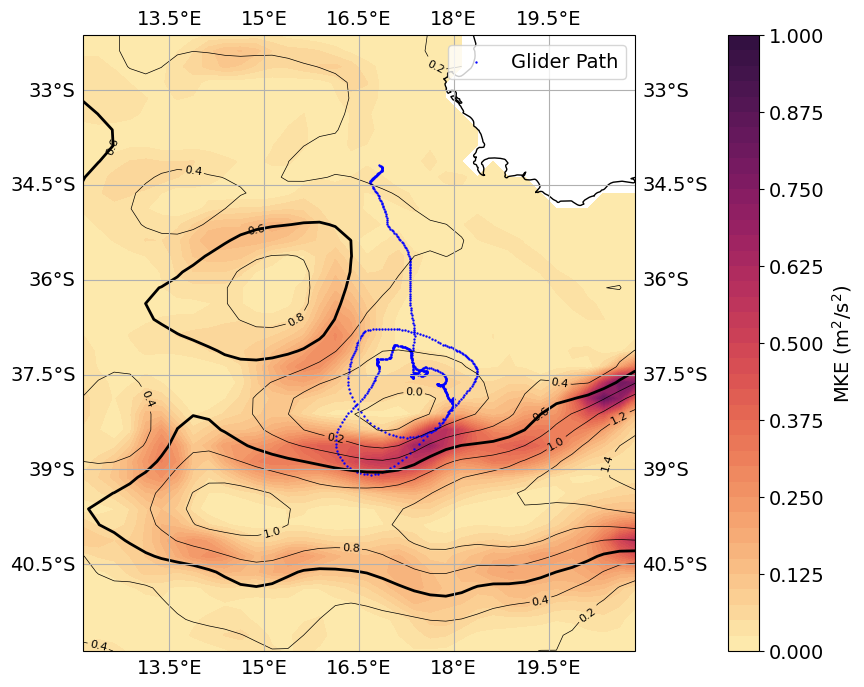

In [55]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import cmocean

# Define start and end dates
start_date = pd.to_datetime("2023-03-22")
end_date = pd.to_datetime("2023-05-23")

# vmin and vmax for EKE
vmin = 0
vmax = 1

# Define the file path pattern
file_path_pattern = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/may/dt_global_twosat_phy_l4_{:%Y%m%d}_vDT2021.nc"

# Select latitude and longitude range
lat_range = slice(-42, -32)
lon_range = slice(12, 21)

# Initialize lists to store datasets
#eke_datasets = []
adt_datasets = []

# Initialize lists to store ugos and vgos data for mean calculation
ugos_list = []
vgos_list = []

# Iterate over the dates to collect data for mean calculation
for current_date in pd.date_range(start=start_date, end=end_date):
    file_path = file_path_pattern.format(current_date)
    if not os.path.exists(file_path):  # Check if the file exists
        continue
    
    ds = xr.open_dataset(file_path)
    
    # Select ugos and vgos for the specified region
    ugos = ds['ugos'].sel(latitude=lat_range, longitude=lon_range)
    vgos = ds['vgos'].sel(latitude=lat_range, longitude=lon_range)
    
    # Append data to the lists for mean calculation
    ugos_list.append(ugos)
    vgos_list.append(vgos)

# Concatenate all data arrays along the time dimension
ugos_all = xr.concat(ugos_list, dim='time')
vgos_all = xr.concat(vgos_list, dim='time')

# Calculate the mean over time
ugos_mean = ugos_all.mean(dim='time')
vgos_mean = vgos_all.mean(dim='time')


# Iterate over the dates
for current_date in pd.date_range(start=start_date, end=end_date):
    file_path = file_path_pattern.format(current_date)
    if not os.path.exists(file_path):  # Check if the file exists
        continue
    
    ds = xr.open_dataset(file_path)
    
    # Extract ADT data
    adt = ds['adt'].sel(latitude=lat_range, longitude=lon_range)
    adt_datasets.append(adt)
    
# MKE     
meke = 0.5 * (ugos_mean ** 2 + vgos_mean ** 2)
#eke_datasets.append(eke)

# Compute mean EKE and ADT over the period
#eke_mean = xr.concat(eke_datasets, dim='time').mean(dim='time')
adt_mean = xr.concat(adt_datasets, dim='time').mean(dim='time')

# Plot the mean EKE and ADT
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Create a custom colormap that starts from a less dark color
cmap = cmo.matter
cmap = cmap(np.linspace(0, 1, cmap.N))  # Shift the colormap to start from a lighter color
cmap = plt.cm.colors.ListedColormap(cmap)

# Plot the mean EKE
eke_plot = plt.contourf(meke.longitude, meke.latitude, meke, 
                        cmap=cmap, levels=np.linspace(vmin, vmax, 41), transform=ccrs.PlateCarree())

# Add colorbar
plt.colorbar(eke_plot, label='MKE (m$^2$/s$^2$)',pad=0.1)

# Plot the mean ADT with contours
adt_levels = np.arange(-0.2, 1.8, 0.2)
adt_contours = plt.contour(adt_mean.longitude, adt_mean.latitude, adt_mean, levels=adt_levels, 
                           colors='black', linestyles='-', linewidths=0.5, transform=ccrs.PlateCarree())
plt.clabel(adt_contours, fmt='%2.1f', colors='black', fontsize=8)

# Highlight the contour at ADT = 0.6 with a thicker line
adt_highlight_contour = plt.contour(adt_mean.longitude, adt_mean.latitude, adt_mean, levels=[0.6], 
                                    colors='black', linestyles='-', linewidths=2, transform=ccrs.PlateCarree())

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)

# Set labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Extract glider path (example data)
# Replace with your actual glider data
lat = ds_date['lat']
lon = ds_date['long']

# Add glider path
plt.scatter(lon, lat, color='blue', label='Glider Path', s=0.5)

# Show legend
plt.legend()

# Show plot
plt.show()


In [84]:
ds_date.lat

<xarray.DataArray 'lat' (time: 624)>
array([-37.517006, -37.525179, -37.53593 , ..., -34.192211, -34.183013,
              nan])
Coordinates:
  * time     (time) datetime64[ns] 2023-03-22T08:33:43 ... 2023-05-23T15:45:43
    long     (time) float64 17.32 17.34 17.35 17.35 ... 16.84 16.83 16.82 nan
    lat      (time) float64 -37.52 -37.53 -37.54 -37.54 ... -34.19 -34.18 nan
    ATD      (time) float64 ...

# SST

In [15]:

# Define the file path pattern
file_path = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_1716288824368.nc"

ds_sst = xr.open_dataset(file_path)

ds_sst


    


<xarray.Dataset>
Dimensions:         (time: 65, latitude: 200, longitude: 180)
Coordinates:
  * latitude        (latitude) float32 -41.97 -41.92 -41.88 ... -32.08 -32.02
  * longitude       (longitude) float32 12.03 12.08 12.12 ... 20.88 20.93 20.98
  * time            (time) datetime64[ns] 2023-03-20 2023-03-21 ... 2023-05-23
Data variables:
    analysed_sst    (time, latitude, longitude) float32 ...
    analysis_error  (time, latitude, longitude) float32 ...
Attributes:
    Conventions:       CF-1.11
    title:             Global SST & Sea Ice Analysis, L4 OSTIA, 0.05 deg dail...
    institution:       UKMO
    source:            AVHRR18_G-NAVO-L2P-V1.0, AVHRR19_G-NAVO-L2P-V1.0, AVHR...
    history:           Created from sst.nc; obs_anal.nc; seaice.nc
    references:        Good S, Fiedler E, Mao C, Martin MJ, Maycock A, Reid R...
    comment:           WARNING Some applications are unable to properly handl...
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  SST_GLO_SST_L4_NRT_OBSERVATIONS_010_001
    subset:datasetId:  METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2
    subset:date:       2024-05-21T10:53:44.368Z

In [122]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from PIL import Image
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# Define start and end dates
start_date = pd.to_datetime("2023-03-22")
end_date = pd.to_datetime("2023-05-23")


# vmin and vmax
vmin = -0.05
vmax = 0.1
#cmap = 'balance'

# Define the file path pattern
file_path_pattern = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/may/dt_global_twosat_phy_l4_{:%Y%m%d}_vDT2021.nc"


# Define the file path pattern
file_path_sst = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_1716288824368.nc"

ds_sst = xr.open_dataset(file_path_sst)

# Select latitude and longitude range
lat_range = slice(-41, -33)
lon_range = slice(12, 20)

    
# Initialize a list to store image paths
image_paths = []

# Iterate over the dates
for current_date in pd.date_range(start=start_date, end=end_date):
    file_path = file_path_pattern.format(current_date)
    if not os.path.exists(file_path):  # Check if the file exists
        continue
    
    ds = xr.open_dataset(file_path)
    
    # Calculate EKE
    ugos = ds['ugos'].sel(latitude=lat_range, longitude=lon_range)
    vgos = ds['vgos'].sel(latitude=lat_range, longitude=lon_range)

    latitude = ds['latitude']
    longitude = ds['longitude']
    # Extract sea surface height data for the specified region
    ssh_subset = ds['sla'].sel(latitude=lat_range, longitude=lon_range) # (Sea Level Anomaly)
    adt_subset = ds['adt'].sel(latitude=lat_range, longitude=lon_range) # (ADT)
    
    plt.figure(figsize=(10, 6)) # Adjust the figure size to make space for the title
    # Create a map projection
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    
    # plot the SST 
    sst_subset = ds_sst['analysed_sst'].sel(latitude=lat_range, longitude=lon_range)
    
    sst_sel = sst_subset.sel(time=current_date, method='nearest')
    
    sst_sel_degree = sst_sel - 272.15
    
    # Compute the partial derivatives
    partial_lon = np.gradient(sst_sel_degree, axis=1)  # Gradient along longitude
    partial_lat = np.gradient(sst_sel_degree, axis=0)  # Gradient along latitude
    
    length_per_degree_lat = 111 # km
    
    length_per_degree_lon = 11 * np.cos(np.deg2rad(sst_sel_degree.latitude.values))
    
    # Convert the gradients to degrees per km
    partial_lon_per_km = partial_lon / length_per_degree_lon
    partial_lat_per_km = partial_lat / length_per_degree_lat

    # Sum the partial derivatives (now in degrees per km)
    tempgrad = partial_lon_per_km + partial_lat_per_km
    
        
    ds_grad = xr.Dataset(
        {
            "tempgrad": (("latitude", "longitude"), tempgrad)
        },
        coords={
            "longitude":sst_sel_degree.longitude ,
            "latitude": sst_sel_degree.latitude
        }
    )
    
    
    plt.contourf(ds_grad.longitude, ds_grad.latitude, ds_grad.tempgrad, cmap=cmo.thermal, levels=np.linspace(vmin, vmax, 41), extend='both') 
    
    plt.colorbar(label='Temperature gradient (°C/km)', pad=0.1)
    
    # Add the thick black contour line
    plt.contour(adt_subset.longitude, adt_subset.latitude, adt_subset.isel(time=0),
                levels=[0.6], colors='black', linewidths=2, transform=ccrs.PlateCarree())
 
    
  
    # Add coastlines and gridlines
    ax.coastlines()
    ax.gridlines(draw_labels=True)

    # Set labels and title
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    
    
   
    # Plot quiver plot
    plt.quiver(ds.longitude.sel(longitude=lon_range),
                       ds.latitude.sel(latitude=lat_range), ugos.isel(time=0), vgos.isel(time=0))
    
    
    # Extract latitude and longitude corresponding to the current day
    day_time = ds_date['time'].sel(time=current_date, method='nearest')  # Select nearest time slice
    lat = ds_date['lat'].sel(time=day_time)
    lon = ds_date['long'].sel(time=day_time)
    
    
    # Add the current date as a title above the graph
    day = current_date.strftime("%B %d")
    plt.title(f'SST and Geostrophic Currents on {day}', pad=30)

    # Add a dot at the specified latitude and longitude
    plt.scatter(lon, lat, color='red', label='location glider')
    
    # Show legend in the top right corner
    plt.legend(loc='upper right', bbox_to_anchor=(0.97, 0.95), borderaxespad=0.)
    
    plt.grid(True) 
    
    
    
    # Save the plot as an image
    day = current_date.strftime("%Y%m%d")
    image_path = f"sst__grad{day}.png"
    plt.savefig(image_path)
    plt.close()  # Close the plot to prevent displaying each plot

    image_paths.append(image_path)



# Combine the images into a GIF
images = [Image.open(image_path) for image_path in image_paths]
gif_path = "sst_grad.gif"
images[0].save(gif_path, save_all=True, append_images=images[1:], duration=500, loop=0)

print(f"GIF saved at: {gif_path}")


GIF saved at: sst_grad.gif


In [32]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from PIL import Image
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# Define start and end dates
start_date = pd.to_datetime("2023-03-22")
end_date = pd.to_datetime("2023-05-23")


# vmin and vmax
vmin = 15
vmax = 25
#cmap = 'balance'

# Define the file path pattern
file_path_pattern = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/may/dt_global_twosat_phy_l4_{:%Y%m%d}_vDT2021.nc"


# Define the file path pattern
file_path_sst = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_1716288824368.nc"

ds_sst = xr.open_dataset(file_path_sst)

# Select latitude and longitude range
lat_range = slice(-41, -33)
lon_range = slice(12, 20)

    
# Initialize a list to store image paths
image_paths = []

# Iterate over the dates
for current_date in pd.date_range(start=start_date, end=end_date):
    file_path = file_path_pattern.format(current_date)
    if not os.path.exists(file_path):  # Check if the file exists
        continue
    
    ds = xr.open_dataset(file_path)
    
    # Calculate EKE
    ugos = ds['ugos'].sel(latitude=lat_range, longitude=lon_range)
    vgos = ds['vgos'].sel(latitude=lat_range, longitude=lon_range)

    latitude = ds['latitude']
    longitude = ds['longitude']
    # Extract sea surface height data for the specified region
    ssh_subset = ds['sla'].sel(latitude=lat_range, longitude=lon_range) # (Sea Level Anomaly)
    adt_subset = ds['adt'].sel(latitude=lat_range, longitude=lon_range) # (ADT)
    
    plt.figure(figsize=(10, 6)) # Adjust the figure size to make space for the title
    # Create a map projection
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    
    # plot the SST 
    sst_subset = ds_sst['analysed_sst'].sel(latitude=lat_range, longitude=lon_range)
    
    sst_sel = sst_subset.sel(time=current_date, method='nearest')
    
    sst_sel_degree = sst_sel - 272.15
    

    plt.contourf(sst_sel_degree.longitude, sst_sel_degree.latitude, sst_sel_degree, cmap=cmo.thermal) 
    
    plt.colorbar(label='Temperature gradient (°C)', pad=0.1)
    
    # Add the thick black contour line
    plt.contour(adt_subset.longitude, adt_subset.latitude, adt_subset.isel(time=0),
                levels=[0.6], colors='black', linewidths=2, transform=ccrs.PlateCarree())
 
    
  
    # Add coastlines and gridlines
    ax.coastlines()
    ax.gridlines(draw_labels=True)

    # Set labels and title
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    
    
   
    # Plot quiver plot
    plt.quiver(ds.longitude.sel(longitude=lon_range),
                       ds.latitude.sel(latitude=lat_range), ugos.isel(time=0), vgos.isel(time=0))
    
    
    # Extract latitude and longitude corresponding to the current day
    day_time = ds_date['time'].sel(time=current_date, method='nearest')  # Select nearest time slice
    lat = ds_date['lat'].sel(time=day_time)
    lon = ds_date['long'].sel(time=day_time)
    
    
    # Add the current date as a title above the graph
    day = current_date.strftime("%B %d")
    plt.title(f'SST and Geostrophic Currents on {day}', pad=30)

    # Add a dot at the specified latitude and longitude
    plt.scatter(lon, lat, color='red', label='location glider')
    
    # Show legend in the top right corner
    plt.legend(loc='upper right', bbox_to_anchor=(0.97, 0.95), borderaxespad=0.)
    
    plt.grid(True) 
    
    
    
    # Save the plot as an image
    day = current_date.strftime("%Y%m%d")
    image_path = f"sst_{day}.png"
    plt.savefig(image_path)
    plt.close()  # Close the plot to prevent displaying each plot

    image_paths.append(image_path)



# Combine the images into a GIF
images = [Image.open(image_path) for image_path in image_paths]
gif_path = "sst.gif"
images[0].save(gif_path, save_all=True, append_images=images[1:], duration=500, loop=0)

print(f"GIF saved at: {gif_path}")

GIF saved at: sst.gif


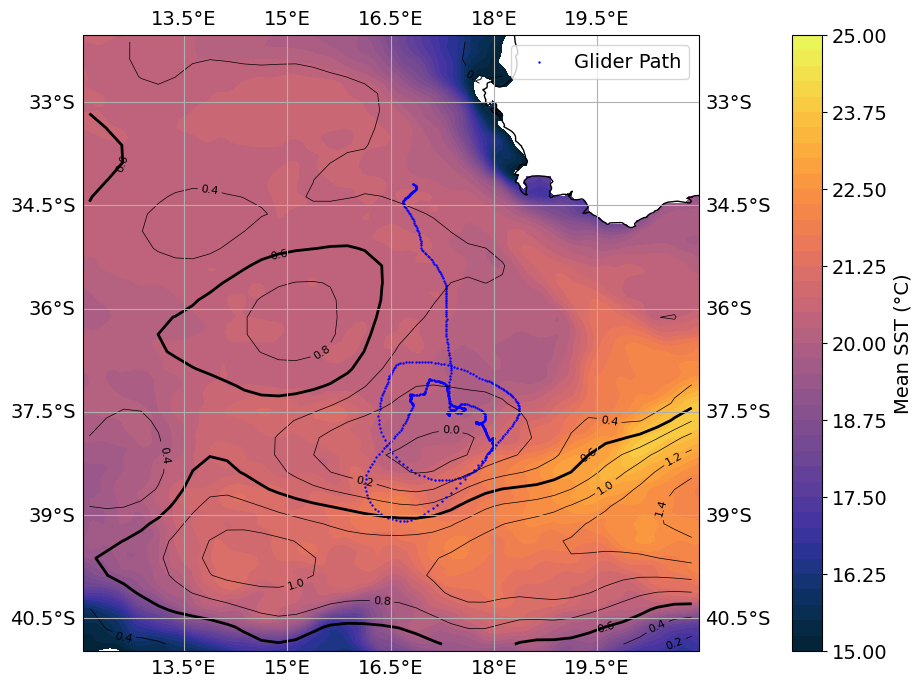

In [24]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import cmocean

# Define start and end dates
start_date = pd.to_datetime("2023-03-22")
end_date = pd.to_datetime("2023-05-23")

# vmin and vmax for EKE
vmin = 15
vmax = 25

# Define the file path pattern
file_path_pattern = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/may/dt_global_twosat_phy_l4_{:%Y%m%d}_vDT2021.nc"

# Define the file path pattern
file_path_sst = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_1716288824368.nc"

ds_sst = xr.open_dataset(file_path_sst)

# Select latitude and longitude range
lat_range = slice(-41, -32)
lon_range = slice(12, 21)

# Initialize lists to store datasets
SST_datasets = []
adt_datasets = []

# Iterate over the dates
for current_date in pd.date_range(start=start_date, end=end_date):
    file_path = file_path_pattern.format(current_date)
    if not os.path.exists(file_path):  # Check if the file exists
        continue
    
    ds = xr.open_dataset(file_path)
    
    # Calculate EKE
    ugos = ds['ugos'].sel(latitude=lat_range, longitude=lon_range)
    vgos = ds['vgos'].sel(latitude=lat_range, longitude=lon_range)
    #eke = 0.5 * (ugos ** 2 + vgos ** 2)
    #eke_datasets.append(eke)
    
    # Extract ADT data
    adt = ds['adt'].sel(latitude=lat_range, longitude=lon_range)
    adt_datasets.append(adt)
    
    #  Extract SST data 
    sst_subset = ds_sst['analysed_sst'].sel(latitude=lat_range, longitude=lon_range)
    
    sst_sel_degree = sst_subset - 272.15
    SST_datasets.append(sst_sel_degree)
    


# Compute mean EKE and ADT over the period
#eke_mean = xr.concat(eke_datasets, dim='time').mean(dim='time')
adt_mean = xr.concat(adt_datasets, dim='time').mean(dim='time')
SST_mean = xr.concat(SST_datasets, dim='time').mean(dim='time')

# Plot the mean EKE and ADT
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Create a custom colormap that starts from a less dark color
cmap = cmo.matter
cmap = cmap(np.linspace(0, 1, cmap.N))  # Shift the colormap to start from a lighter color
cmap = plt.cm.colors.ListedColormap(cmap)

# Plot the mean EKE
SST_plot = plt.contourf(SST_mean.longitude, SST_mean.latitude, SST_mean, 
                        cmap=cmo.thermal, levels=np.linspace(vmin, vmax, 41), transform=ccrs.PlateCarree())

# Add colorbar
plt.colorbar(SST_plot, label='Mean SST (°C)', pad=0.1)

# Plot the mean ADT with contours
adt_levels = np.arange(-0.2, 1.8, 0.2)
adt_contours = plt.contour(adt_mean.longitude, adt_mean.latitude, adt_mean, levels=adt_levels, 
                           colors='black', linestyles='-', linewidths=0.5, transform=ccrs.PlateCarree())
plt.clabel(adt_contours, fmt='%2.1f', colors='black', fontsize=8)

# Highlight the contour at ADT = 0.6 with a thicker line
adt_highlight_contour = plt.contour(adt_mean.longitude, adt_mean.latitude, adt_mean, levels=[0.6], 
                                    colors='black', linestyles='-', linewidths=2, transform=ccrs.PlateCarree())

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)

# Set labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Extract glider path (example data)
# Replace with your actual glider data
lat = ds_date['lat']
lon = ds_date['long']

# Add glider path
plt.scatter(lon, lat, color='blue', label='Glider Path', s=0.5)

# Show legend
plt.legend()

# Show plot
plt.show()


# SST over time

In [61]:
SST_global = ds_sst.analysed_sst
SST_global

<xarray.DataArray 'analysed_sst' (time: 65, latitude: 200, longitude: 180)>
[2340000 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 -41.97 -41.92 -41.88 ... -32.12 -32.08 -32.02
  * longitude  (longitude) float32 12.03 12.08 12.12 12.18 ... 20.88 20.93 20.98
  * time       (time) datetime64[ns] 2023-03-20 2023-03-21 ... 2023-05-23
Attributes:
    units:          kelvin
    standard_name:  sea_surface_foundation_temperature
    long_name:      Analysed sea surface temperature

In [62]:
# Load the datasets
analysed_sst = SST_global
temp = ds_date.temp

# Ensure the temp dataset has latitude and longitude as coordinates
temp = temp.assign_coords(lat=temp['lat'], lon=temp['long'])

# Interpolate SST at the locations and times of the temp dataset
sst_at_temp_locs = analysed_sst.interp(
    latitude=temp['lat'],
    longitude=temp['long'],
    time=temp['time'],
    method="linear"
)

# Now sst_at_temp_locs contains the SST values at the same times and locations as the temp dataset
SST_global_glider = sst_at_temp_locs - 272.15



In [63]:
days_elapsed = (SST_global_glider.time.values - SST_global_glider.time.values[0]) / np.timedelta64(1, 'D')
days_elapsed

# Calculate the number of days since the reference date
yearday = days_elapsed +80.36

# Replace the time coordinate with yearday
SST_global_glider = SST_global_glider.assign_coords(time=("time", yearday))

# Print the updated DataArray
SST_global_glider

<xarray.DataArray 'analysed_sst' (time: 624)>
array([20.66762753, 20.64645246, 20.62076373, 20.59956328, 20.58330745,
       20.56635861, 20.54766371, 20.51459037, 20.4714283 , 20.42736902,
       20.38123463, 20.33459243, 20.28598658, 20.23504157, 20.18068985,
       20.12739643, 20.07005891, 20.03878413, 20.02440968, 20.01106469,
       19.99900987, 19.98817822, 19.97894228, 19.96743482, 19.95382991,
       19.93642071, 19.91764196, 19.9103373 , 19.9032302 , 19.89741008,
       19.89528159, 19.92018042, 19.93674877, 19.96265889, 19.96358752,
       19.95741754, 19.95170354, 19.94054667, 19.91974169, 19.89872156,
       19.87531512, 19.83759404, 19.80616935, 19.78159058, 19.76219993,
       19.75562377, 19.77364063, 19.8215537 , 19.88386812, 19.93945973,
       19.97471792, 19.98452068, 20.00291714, 20.02688844, 20.03823865,
       20.03684585, 20.02939564, 20.03683332, 20.05624653, 20.07440412,
       20.09395991, 20.12075308, 20.14611248, 20.1652004 , 20.17920917,
       20.1873262 , 20.18892192, 20.18520728, 20.1785533 , 20.17260737,
       20.16583492, 20.15969769, 20.15398679, 20.14780511, 20.14270035,
       20.13610333, 20.13059159, 20.12235026, 20.11412147, 20.10768235,
       20.099456  , 20.09110184, 20.08059429, 20.06931087, 20.05574657,
       20.03782901, 20.01743036, 20.04067262, 20.09980516, 20.15742344,
       20.22071543, 20.28658942, 20.35286153, 20.41569169, 20.47439935,
       20.52743147, 20.57582514, 20.60177264, 20.61767441, 20.63671787,
...
       20.45787123, 20.54808851, 20.54097099, 20.45979747, 20.38237122,
       20.30135976, 20.23817429, 20.18457769, 20.16047842, 20.13269218,
       20.1304224 , 20.14294825, 20.16466277, 20.17177239, 20.18078413,
       20.19772219, 20.20886099, 20.23390544, 20.23759668, 20.27179875,
       20.31789272, 20.39200408, 20.37431639, 20.30294805, 20.22456334,
       20.16170967, 20.11938973, 20.09046244, 20.08537105, 20.10789278,
       20.18434089, 20.31206916, 20.32573674, 20.28016661, 20.21938078,
       20.18595591, 20.19029942, 20.19547776, 20.2281871 , 20.2108428 ,
       20.18306022, 20.16482096, 20.10213182, 20.02653856, 19.95451404,
       19.91770476, 19.89299492, 19.87172427, 19.8577474 , 19.86648092,
       19.88786366, 19.9240102 , 19.93855193, 19.94758936, 19.98189281,
       20.03467183, 20.08472267, 20.12086961, 20.15458172, 20.18511683,
       20.21002044, 20.21733948, 20.19896924, 20.1642403 , 20.13127912,
       20.09964785, 20.06768169, 20.03160556, 19.99510769, 19.95270043,
       19.9040415 , 19.85913695, 19.7772348 , 19.67329516, 19.57849735,
       19.49386467, 19.41277127, 19.33498806, 19.26202492, 19.19589593,
       19.13624056, 19.08803784, 19.07959842, 19.08912443, 19.09555104,
       19.09871699, 19.09038887, 19.08023249, 19.06805054, 19.05436631,
       19.03997507, 19.0252724 ,         nan,         nan,         nan,
               nan,         nan,         nan,         nan])
Coordinates:
    latitude   (time) float64 -37.52 -37.53 -37.54 -37.54 ... -34.19 -34.18 nan
    longitude  (time) float64 17.32 17.34 17.35 17.35 ... 16.84 16.83 16.82 nan
  * time       (time) float64 80.36 80.46 80.56 80.66 ... 142.5 142.6 142.7
    long       (time) float64 17.32 17.34 17.35 17.35 ... 16.84 16.83 16.82 nan
    lat        (time) float64 -37.52 -37.53 -37.54 -37.54 ... -34.19 -34.18 nan
    ATD        (time) float64 0.0 1.573 3.091 3.77 ... 1.683e+03 1.685e+03 nan
    lon        (time) float64 17.32 17.34 17.35 17.35 ... 16.84 16.83 16.82 nan

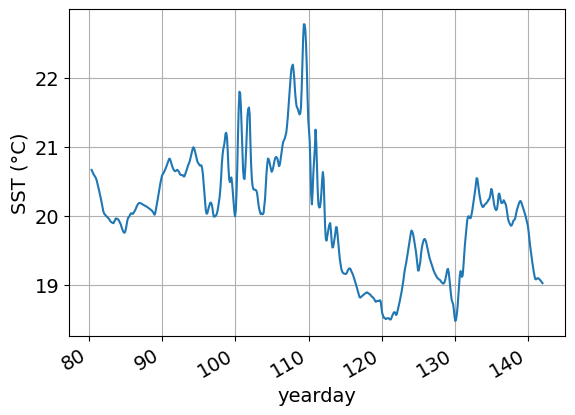

In [108]:
plt.plot(SST_global_glider.time,SST_global_glider, label='global')

# Set labels
plt.xlabel('yearday')
plt.ylabel('SST (°C)')
plt.grid()

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

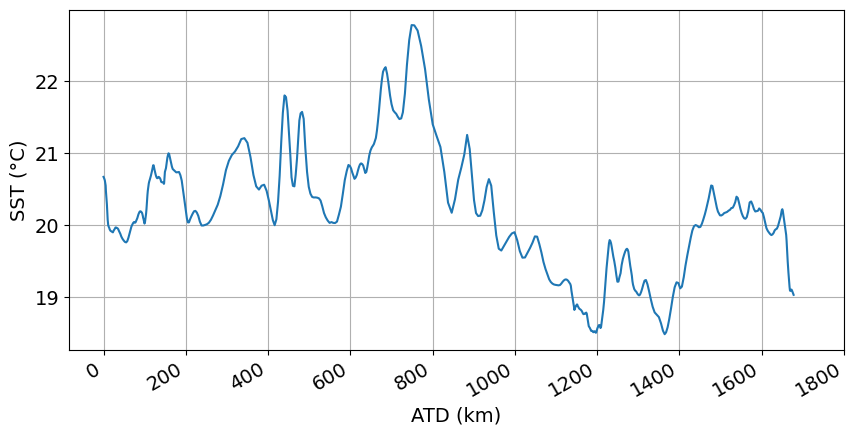

In [111]:
plt.figure(figsize=(10,5))
plt.plot(SST_global_glider.ATD,SST_global_glider, label='global')

# Set labels
plt.xlabel('ATD (km)')
plt.ylabel('SST (°C)')
plt.grid()
# Set x-axis ticks to have steps of 200
plt.xticks(np.arange(0, max(eke_global_glider.ATD) + 200, 200))

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# current in space and time

In [112]:
import os

# Define start and end dates
start_date = pd.to_datetime("2023-03-22")
end_date = pd.to_datetime("2023-05-23")

# Define the file path pattern
file_path_pattern = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/may/dt_global_twosat_phy_l4_{:%Y%m%d}_vDT2021.nc"

# Generate a list of file paths for the given date range
file_paths = [file_path_pattern.format(current_date) for current_date in pd.date_range(start=start_date, end=end_date)]

# Filter out the paths that do not exist
existing_file_paths = [file_path for file_path in file_paths if os.path.exists(file_path)]

# Open multiple files as a single dataset
combined_ds = xr.open_mfdataset(existing_file_paths, combine='by_coords')

# Print the combined dataset
combined_ds

<xarray.Dataset>
Dimensions:         (time: 63, latitude: 720, nv: 2, longitude: 1440)
Coordinates:
  * time            (time) datetime64[ns] 2023-03-22 2023-03-23 ... 2023-05-23
  * latitude        (latitude) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * longitude       (longitude) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
  * nv              (nv) int32 0 1
Data variables: (12/14)
    crs             (time) int32 -2147483647 -2147483647 ... -2147483647
    lat_bnds        (time, latitude, nv) float32 dask.array<chunksize=(1, 720, 2), meta=np.ndarray>
    lon_bnds        (time, longitude, nv) float32 dask.array<chunksize=(1, 1440, 2), meta=np.ndarray>
    sla             (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    err_sla         (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ugosa           (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ...              ...
    err_vgosa       (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    adt             (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ugos            (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    vgos            (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    tpa_correction  (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    flag_ice        (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         http://climate.copernicus.eu/c3s-user-se...
    creator_email:                   http://climate.copernicus.eu/c3s-user-se...
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2023-03-22T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2023-03-21T12:00:00Z
    title:                           DT merged two satellites Global Ocean Gr...

In [113]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from PIL import Image
import os
import cartopy.crs as ccrs
import numpy as np

# Define start and end dates
start_date = pd.to_datetime("2023-03-22")
end_date = pd.to_datetime("2023-05-23")


# Define the file path pattern
file_path_pattern = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/may/dt_global_twosat_phy_l4_{:%Y%m%d}_vDT2021.nc"

# Select latitude and longitude range
lat_range = slice(-42, -32)
lon_range = slice(12, 21)

# Initialize a list to store image paths
image_paths = []

# Initialize lists to store ugos and vgos data for mean calculation
ugos_list = []
vgos_list = []

# Iterate over the dates to collect data for mean calculation
for current_date in pd.date_range(start=start_date, end=end_date):
    file_path = file_path_pattern.format(current_date)
    if not os.path.exists(file_path):  # Check if the file exists
        continue
    
    ds = xr.open_dataset(file_path)
    
    # Select ugos and vgos for the specified region
    ugos = ds['ugos'].sel(latitude=lat_range, longitude=lon_range)
    vgos = ds['vgos'].sel(latitude=lat_range, longitude=lon_range)
    
    # Append data to the lists for mean calculation
    ugos_list.append(ugos)
    vgos_list.append(vgos)

# Concatenate all data arrays along the time dimension
ugos_all = xr.concat(ugos_list, dim='time')
vgos_all = xr.concat(vgos_list, dim='time')

# Calculate the magnitude of the velocity field
velocity_magnitude = np.sqrt(ugos_all**2 + vgos_all**2)


In [114]:
# Interpolate speed at the locations and times of the dataset
speed_at_temp_locs = velocity_magnitude.interp(
    latitude=ds_date['lat'],
    longitude=ds_date['long'],
    time=ds_date['time'],
    method="linear"
)

speed_at_temp_locs

<xarray.DataArray (time: 624)>
array([0.32608509, 0.31635605, 0.3020505 , 0.29073691, 0.27987508,
       0.26761769, 0.25694675, 0.25750518, 0.26616481, 0.27713115,
       0.29035865, 0.29710477, 0.30049828, 0.30643963, 0.31498446,
       0.32103414, 0.32855162, 0.33692827, 0.34570648, 0.35347072,
       0.36028575, 0.36696515, 0.37389911, 0.3820632 , 0.39060287,
       0.40162025, 0.42037128, 0.42980307, 0.4246279 , 0.41845414,
       0.41241682, 0.41607205, 0.42500816, 0.43581907, 0.44008654,
       0.44981466, 0.45694485, 0.46408308, 0.47005612, 0.47431546,
       0.47530691, 0.47633789, 0.46642615, 0.44230475, 0.41988416,
       0.39973191, 0.38179982, 0.36295108, 0.34341031, 0.32677512,
       0.31486288, 0.30886654, 0.2991113 , 0.28665238, 0.2764472 ,
       0.26910899, 0.26272651, 0.25790729, 0.25382539, 0.24905739,
       0.24486192, 0.25611205, 0.26705793, 0.27550102, 0.28236216,
       0.28809768, 0.29172682, 0.29568516, 0.29942778, 0.30377108,
       0.30575937, 0.30708602, 0.3083467 , 0.30976831, 0.31169787,
       0.3124612 , 0.3133127 , 0.31345601, 0.31351322, 0.31394077,
       0.31385292, 0.31358593, 0.31325213, 0.31315714, 0.31276971,
       0.31166104, 0.31050122, 0.31079944, 0.31362199, 0.31696877,
       0.3225944 , 0.32793214, 0.3331476 , 0.33811785, 0.34269372,
       0.34655985, 0.35004498, 0.35357849, 0.35688094, 0.359667  ,
...
       0.203188  , 0.22071321, 0.24488898, 0.27370118, 0.30052728,
       0.32557619, 0.34630511, 0.36940017, 0.39149739, 0.4188681 ,
       0.45127248, 0.47298021, 0.49109323, 0.50654245, 0.5184334 ,
       0.52806702, 0.53499322, 0.53984635, 0.5465422 , 0.54982747,
       0.54741048, 0.54352237, 0.537065  , 0.53191772, 0.52965537,
       0.52696911, 0.52761134, 0.53044298, 0.53613019, 0.53702909,
       0.52801989, 0.51274403, 0.49763006, 0.48235045, 0.46854198,
       0.45449817, 0.44415627, 0.43473652, 0.42822666, 0.42232769,
       0.41604062, 0.40566944, 0.39455359, 0.38522455, 0.37755007,
       0.37102283, 0.36597996, 0.36347142, 0.36292428, 0.36362374,
       0.36497023, 0.36506826, 0.36638147, 0.36675093, 0.36773712,
       0.36784355, 0.3661789 , 0.36442312, 0.35768723, 0.35177887,
       0.3437474 , 0.33602148, 0.32777077, 0.32063992, 0.31401494,
       0.30720231, 0.299893  , 0.28991455, 0.28072455, 0.2713002 ,
       0.26275358, 0.25419043, 0.24742669, 0.24167951, 0.23522404,
       0.23047709, 0.2227027 , 0.21692105, 0.20991011, 0.20333327,
       0.19694146, 0.19013849, 0.18467725, 0.17848651, 0.17424751,
       0.16845978, 0.1653209 , 0.16277418, 0.16110366, 0.15978319,
       0.15863195, 0.15727462,        nan,        nan,        nan,
              nan,        nan,        nan,        nan])
Coordinates:
    latitude   (time) float64 -37.52 -37.53 -37.54 -37.54 ... -34.19 -34.18 nan
    longitude  (time) float64 17.32 17.34 17.35 17.35 ... 16.84 16.83 16.82 nan
  * time       (time) datetime64[ns] 2023-03-22T08:33:43 ... 2023-05-23T15:45:43
    long       (time) float64 17.32 17.34 17.35 17.35 ... 16.84 16.83 16.82 nan
    lat        (time) float64 -37.52 -37.53 -37.54 -37.54 ... -34.19 -34.18 nan
    ATD        (time) float64 0.0 1.573 3.091 3.77 ... 1.683e+03 1.685e+03 nan

In [115]:
days_elapsed_speed = (speed_at_temp_locs.time.values - speed_at_temp_locs.time.values[0]) / np.timedelta64(1, 'D')
days_elapsed_speed

# Calculate the number of days since the reference date
yearday_speed = days_elapsed_speed +80.36

# Replace the time coordinate with yearday
speed_global_glider = speed_at_temp_locs.assign_coords(time=("time", yearday))

# Print the updated DataArray
speed_global_glider

<xarray.DataArray (time: 624)>
array([0.32608509, 0.31635605, 0.3020505 , 0.29073691, 0.27987508,
       0.26761769, 0.25694675, 0.25750518, 0.26616481, 0.27713115,
       0.29035865, 0.29710477, 0.30049828, 0.30643963, 0.31498446,
       0.32103414, 0.32855162, 0.33692827, 0.34570648, 0.35347072,
       0.36028575, 0.36696515, 0.37389911, 0.3820632 , 0.39060287,
       0.40162025, 0.42037128, 0.42980307, 0.4246279 , 0.41845414,
       0.41241682, 0.41607205, 0.42500816, 0.43581907, 0.44008654,
       0.44981466, 0.45694485, 0.46408308, 0.47005612, 0.47431546,
       0.47530691, 0.47633789, 0.46642615, 0.44230475, 0.41988416,
       0.39973191, 0.38179982, 0.36295108, 0.34341031, 0.32677512,
       0.31486288, 0.30886654, 0.2991113 , 0.28665238, 0.2764472 ,
       0.26910899, 0.26272651, 0.25790729, 0.25382539, 0.24905739,
       0.24486192, 0.25611205, 0.26705793, 0.27550102, 0.28236216,
       0.28809768, 0.29172682, 0.29568516, 0.29942778, 0.30377108,
       0.30575937, 0.30708602, 0.3083467 , 0.30976831, 0.31169787,
       0.3124612 , 0.3133127 , 0.31345601, 0.31351322, 0.31394077,
       0.31385292, 0.31358593, 0.31325213, 0.31315714, 0.31276971,
       0.31166104, 0.31050122, 0.31079944, 0.31362199, 0.31696877,
       0.3225944 , 0.32793214, 0.3331476 , 0.33811785, 0.34269372,
       0.34655985, 0.35004498, 0.35357849, 0.35688094, 0.359667  ,
...
       0.203188  , 0.22071321, 0.24488898, 0.27370118, 0.30052728,
       0.32557619, 0.34630511, 0.36940017, 0.39149739, 0.4188681 ,
       0.45127248, 0.47298021, 0.49109323, 0.50654245, 0.5184334 ,
       0.52806702, 0.53499322, 0.53984635, 0.5465422 , 0.54982747,
       0.54741048, 0.54352237, 0.537065  , 0.53191772, 0.52965537,
       0.52696911, 0.52761134, 0.53044298, 0.53613019, 0.53702909,
       0.52801989, 0.51274403, 0.49763006, 0.48235045, 0.46854198,
       0.45449817, 0.44415627, 0.43473652, 0.42822666, 0.42232769,
       0.41604062, 0.40566944, 0.39455359, 0.38522455, 0.37755007,
       0.37102283, 0.36597996, 0.36347142, 0.36292428, 0.36362374,
       0.36497023, 0.36506826, 0.36638147, 0.36675093, 0.36773712,
       0.36784355, 0.3661789 , 0.36442312, 0.35768723, 0.35177887,
       0.3437474 , 0.33602148, 0.32777077, 0.32063992, 0.31401494,
       0.30720231, 0.299893  , 0.28991455, 0.28072455, 0.2713002 ,
       0.26275358, 0.25419043, 0.24742669, 0.24167951, 0.23522404,
       0.23047709, 0.2227027 , 0.21692105, 0.20991011, 0.20333327,
       0.19694146, 0.19013849, 0.18467725, 0.17848651, 0.17424751,
       0.16845978, 0.1653209 , 0.16277418, 0.16110366, 0.15978319,
       0.15863195, 0.15727462,        nan,        nan,        nan,
              nan,        nan,        nan,        nan])
Coordinates:
    latitude   (time) float64 -37.52 -37.53 -37.54 -37.54 ... -34.19 -34.18 nan
    longitude  (time) float64 17.32 17.34 17.35 17.35 ... 16.84 16.83 16.82 nan
  * time       (time) float64 80.36 80.46 80.56 80.66 ... 142.5 142.6 142.7
    long       (time) float64 17.32 17.34 17.35 17.35 ... 16.84 16.83 16.82 nan
    lat        (time) float64 -37.52 -37.53 -37.54 -37.54 ... -34.19 -34.18 nan
    ATD        (time) float64 0.0 1.573 3.091 3.77 ... 1.683e+03 1.685e+03 nan

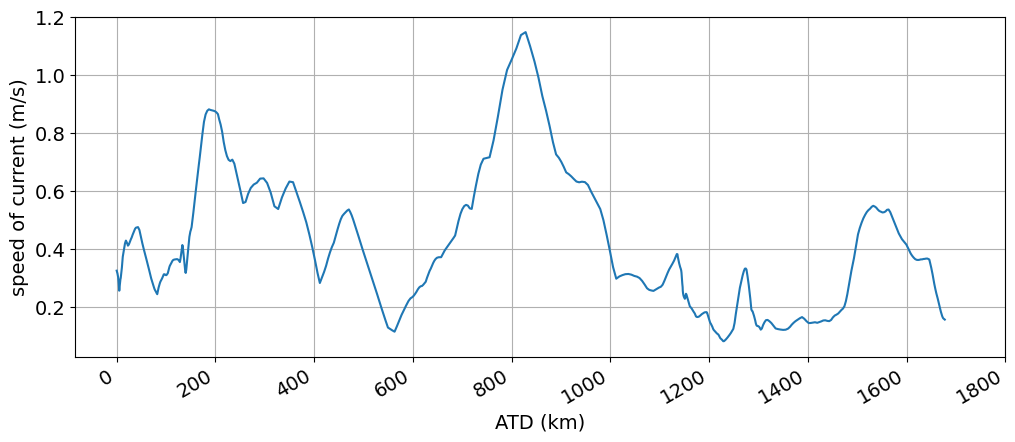

In [117]:
# Create a figure with a specific size
plt.figure(figsize=(12, 5))

plt.plot(speed_global_glider.ATD, speed_global_glider, label='global')

# Set labels
plt.xlabel('ATD (km)')
plt.ylabel('speed of current (m/s)')
plt.grid()

# Set x-axis ticks to have steps of 200
plt.xticks(np.arange(0, max(speed_global_glider.ATD) + 200, 200))

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# EKE in space and time

In [83]:
import os

# Define start and end dates
start_date = pd.to_datetime("2023-03-22")
end_date = pd.to_datetime("2023-05-23")

# Define the file path pattern
file_path_pattern = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/may/dt_global_twosat_phy_l4_{:%Y%m%d}_vDT2021.nc"

# Generate a list of file paths for the given date range
file_paths = [file_path_pattern.format(current_date) for current_date in pd.date_range(start=start_date, end=end_date)]

# Filter out the paths that do not exist
existing_file_paths = [file_path for file_path in file_paths if os.path.exists(file_path)]

# Open multiple files as a single dataset
combined_ds = xr.open_mfdataset(existing_file_paths, combine='by_coords')

# Print the combined dataset
combined_ds

<xarray.Dataset>
Dimensions:         (time: 63, latitude: 720, nv: 2, longitude: 1440)
Coordinates:
  * time            (time) datetime64[ns] 2023-03-22 2023-03-23 ... 2023-05-23
  * latitude        (latitude) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * longitude       (longitude) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
  * nv              (nv) int32 0 1
Data variables: (12/14)
    crs             (time) int32 -2147483647 -2147483647 ... -2147483647
    lat_bnds        (time, latitude, nv) float32 dask.array<chunksize=(1, 720, 2), meta=np.ndarray>
    lon_bnds        (time, longitude, nv) float32 dask.array<chunksize=(1, 1440, 2), meta=np.ndarray>
    sla             (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    err_sla         (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ugosa           (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ...              ...
    err_vgosa       (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    adt             (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ugos            (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    vgos            (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    tpa_correction  (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    flag_ice        (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         http://climate.copernicus.eu/c3s-user-se...
    creator_email:                   http://climate.copernicus.eu/c3s-user-se...
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2023-03-22T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2023-03-21T12:00:00Z
    title:                           DT merged two satellites Global Ocean Gr...

In [84]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from PIL import Image
import os
import cartopy.crs as ccrs
import numpy as np

# Define start and end dates
start_date = pd.to_datetime("2023-03-22")
end_date = pd.to_datetime("2023-05-23")


# Define the file path pattern
file_path_pattern = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/may/dt_global_twosat_phy_l4_{:%Y%m%d}_vDT2021.nc"

# Select latitude and longitude range
lat_range = slice(-42, -32)
lon_range = slice(12, 21)

# Initialize a list to store image paths
image_paths = []

# Initialize lists to store ugos and vgos data for mean calculation
ugos_list = []
vgos_list = []

# Iterate over the dates to collect data for mean calculation
for current_date in pd.date_range(start=start_date, end=end_date):
    file_path = file_path_pattern.format(current_date)
    if not os.path.exists(file_path):  # Check if the file exists
        continue
    
    ds = xr.open_dataset(file_path)
    
    # Select ugos and vgos for the specified region
    ugos = ds['ugos'].sel(latitude=lat_range, longitude=lon_range)
    vgos = ds['vgos'].sel(latitude=lat_range, longitude=lon_range)
    
    # Append data to the lists for mean calculation
    ugos_list.append(ugos)
    vgos_list.append(vgos)

# Concatenate all data arrays along the time dimension
ugos_all = xr.concat(ugos_list, dim='time')
vgos_all = xr.concat(vgos_list, dim='time')

# Calculate the mean over time
ugos_mean = ugos_all.mean(dim='time')
vgos_mean = vgos_all.mean(dim='time')


    
    # Select ugos and vgos for the specified region
ugos1 = combined_ds['ugos'].sel(latitude=lat_range, longitude=lon_range)
vgos1 = combined_ds['vgos'].sel(latitude=lat_range, longitude=lon_range)
    
    # Calculate the deviations from the mean
ugos_anomaly = ugos1 - ugos_mean
vgos_anomaly = vgos1 - vgos_mean
    
    # Calculate EKE
eke = 0.5 * (ugos_anomaly**2 + vgos_anomaly**2)
eke

<xarray.DataArray (time: 63, latitude: 40, longitude: 36)>
dask.array<mul, shape=(63, 40, 36), dtype=float64, chunksize=(1, 40, 36), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 2023-03-22 2023-03-23 ... 2023-05-23
  * latitude   (latitude) float32 -41.88 -41.62 -41.38 ... -32.62 -32.38 -32.12
  * longitude  (longitude) float32 12.12 12.38 12.62 12.88 ... 20.38 20.62 20.88

In [102]:
# Load the datasets

#temp = ds_date.temp

# Ensure the temp dataset has latitude and longitude as coordinates
#temp = temp.assign_coords(lat=temp['lat'], lon=temp['long'])

# Interpolate SST at the locations and times of the temp dataset
eke_at_temp_locs = eke.interp(
    latitude=ds_date['lat'],
    longitude=ds_date['long'],
    time=ds_date['time'],
    method="linear"
)

eke_at_temp_locs

<xarray.DataArray (time: 624)>
dask.array<chunked_aware_interpnd, shape=(624,), dtype=float64, chunksize=(624,), chunktype=numpy.ndarray>
Coordinates:
    latitude   (time) float64 -37.52 -37.53 -37.54 -37.54 ... -34.19 -34.18 nan
    longitude  (time) float64 17.32 17.34 17.35 17.35 ... 16.84 16.83 16.82 nan
  * time       (time) datetime64[ns] 2023-03-22T08:33:43 ... 2023-05-23T15:45:43
    long       (time) float64 17.32 17.34 17.35 17.35 ... 16.84 16.83 16.82 nan
    lat        (time) float64 -37.52 -37.53 -37.54 -37.54 ... -34.19 -34.18 nan
    ATD        (time) float64 0.0 1.573 3.091 3.77 ... 1.683e+03 1.685e+03 nan

In [103]:
days_elapsed_eke = (eke_at_temp_locs.time.values - eke_at_temp_locs.time.values[0]) / np.timedelta64(1, 'D')
days_elapsed_eke

# Calculate the number of days since the reference date
yearday_eke = days_elapsed_eke +80.36

# Replace the time coordinate with yearday
eke_global_glider = eke_at_temp_locs.assign_coords(time=("time", yearday))

# Print the updated DataArray
eke_global_glider

<xarray.DataArray (time: 624)>
dask.array<chunked_aware_interpnd, shape=(624,), dtype=float64, chunksize=(624,), chunktype=numpy.ndarray>
Coordinates:
    latitude   (time) float64 -37.52 -37.53 -37.54 -37.54 ... -34.19 -34.18 nan
    longitude  (time) float64 17.32 17.34 17.35 17.35 ... 16.84 16.83 16.82 nan
  * time       (time) float64 80.36 80.46 80.56 80.66 ... 142.5 142.6 142.7
    long       (time) float64 17.32 17.34 17.35 17.35 ... 16.84 16.83 16.82 nan
    lat        (time) float64 -37.52 -37.53 -37.54 -37.54 ... -34.19 -34.18 nan
    ATD        (time) float64 0.0 1.573 3.091 3.77 ... 1.683e+03 1.685e+03 nan

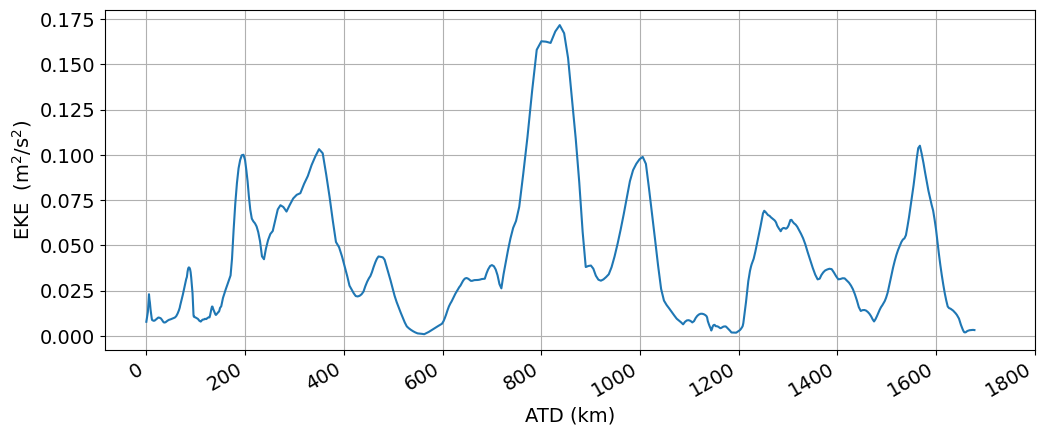

In [104]:
# Create a figure with a specific size
plt.figure(figsize=(12, 5))

plt.plot(eke_global_glider.ATD, eke_global_glider, label='global')

# Set labels
plt.xlabel('ATD (km)')
plt.ylabel('EKE  (m$^2$/s$^2$)')
plt.grid()

# Set x-axis ticks to have steps of 200
plt.xticks(np.arange(0, max(eke_global_glider.ATD) + 200, 200))

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# grad temp 

In [71]:
ds_sst

<xarray.Dataset>
Dimensions:         (time: 65, latitude: 200, longitude: 180)
Coordinates:
  * latitude        (latitude) float32 -41.97 -41.92 -41.88 ... -32.08 -32.02
  * longitude       (longitude) float32 12.03 12.08 12.12 ... 20.88 20.93 20.98
  * time            (time) datetime64[ns] 2023-03-20 2023-03-21 ... 2023-05-23
Data variables:
    analysed_sst    (time, latitude, longitude) float32 ...
    analysis_error  (time, latitude, longitude) float32 ...
Attributes:
    Conventions:       CF-1.11
    title:             Global SST & Sea Ice Analysis, L4 OSTIA, 0.05 deg dail...
    institution:       UKMO
    source:            AVHRR18_G-NAVO-L2P-V1.0, AVHRR19_G-NAVO-L2P-V1.0, AVHR...
    history:           Created from sst.nc; obs_anal.nc; seaice.nc
    references:        Good S, Fiedler E, Mao C, Martin MJ, Maycock A, Reid R...
    comment:           WARNING Some applications are unable to properly handl...
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  SST_GLO_SST_L4_NRT_OBSERVATIONS_010_001
    subset:datasetId:  METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2
    subset:date:       2024-05-21T10:53:44.368Z

<xarray.Dataset>
Dimensions:    (time: 63, latitude: 160, longitude: 160)
Coordinates:
  * time       (time) datetime64[ns] 2023-03-22 2023-03-23 ... 2023-05-23
  * latitude   (latitude) float32 -40.97 -40.92 -40.88 ... -33.12 -33.08 -33.02
  * longitude  (longitude) float32 12.03 12.08 12.12 12.18 ... 19.88 19.93 19.98
Data variables:
    tempgrad   (time, latitude, longitude) float32 -0.007168 -0.01643 ... nan

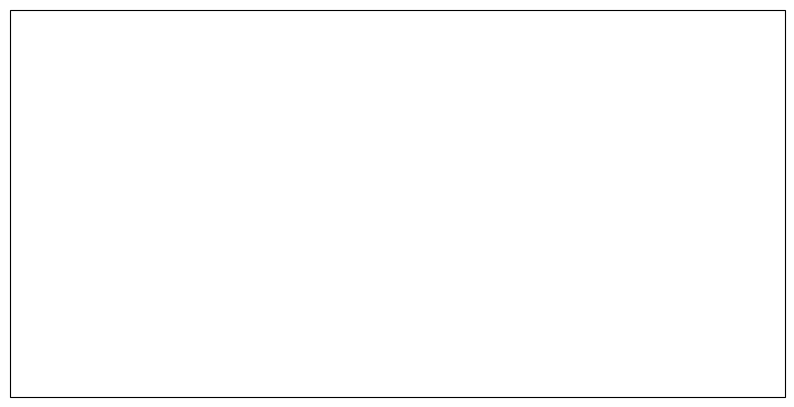

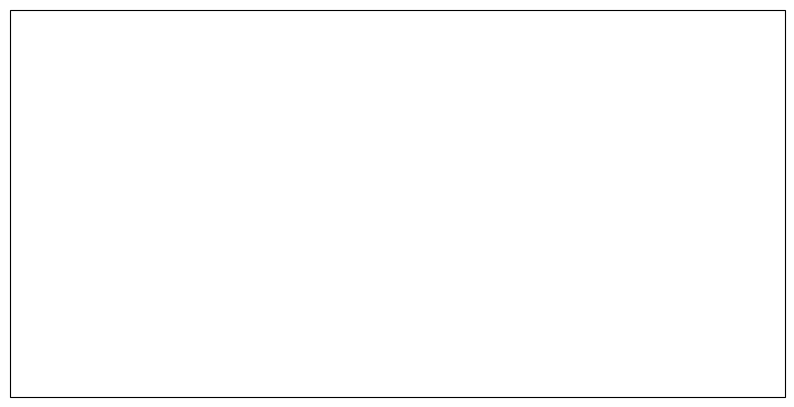

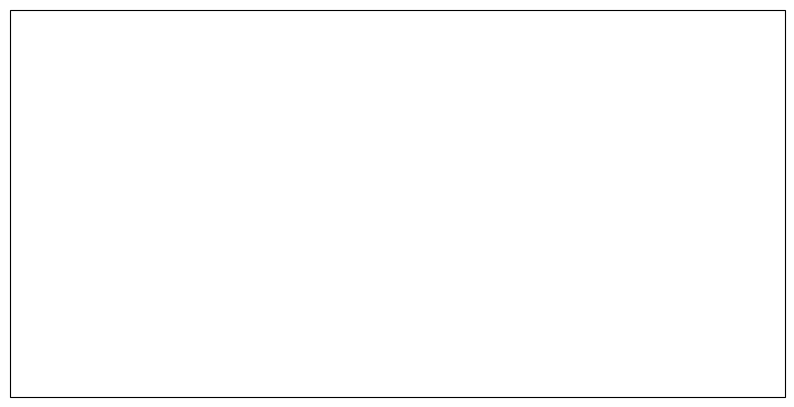

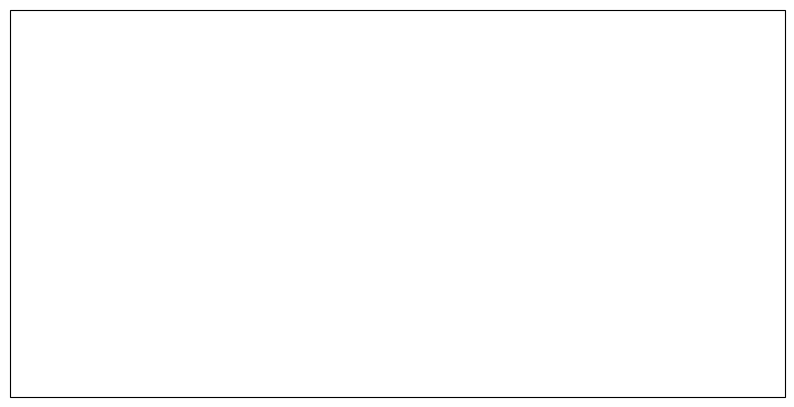

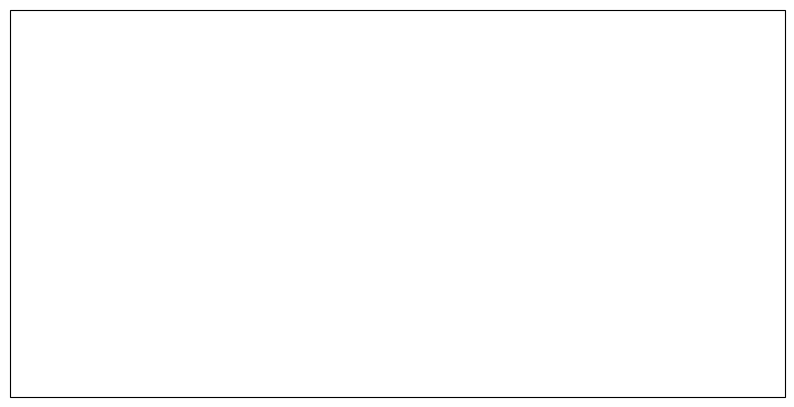

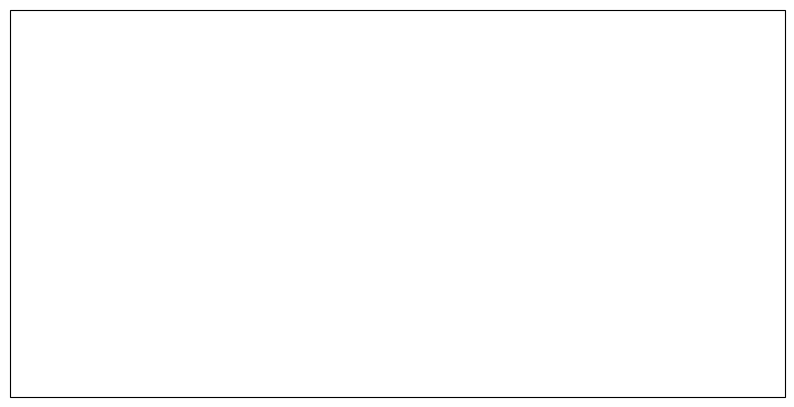

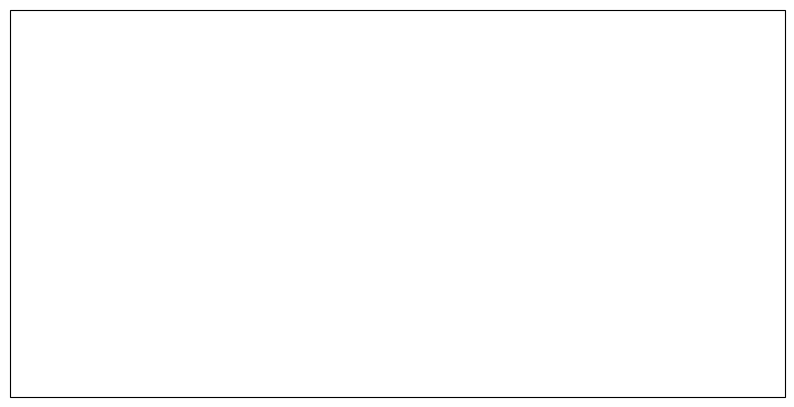

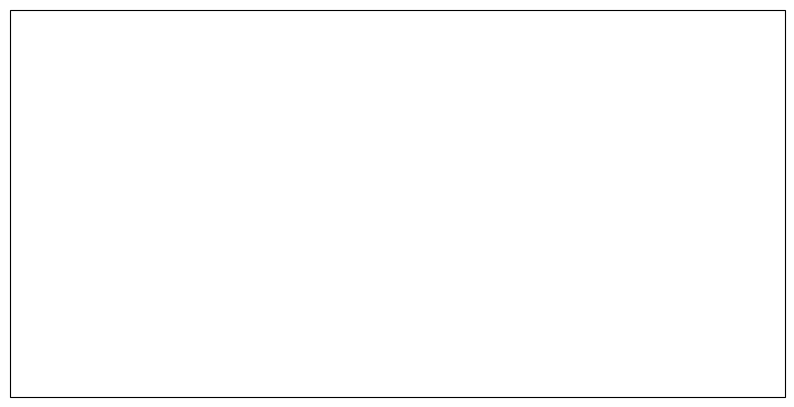

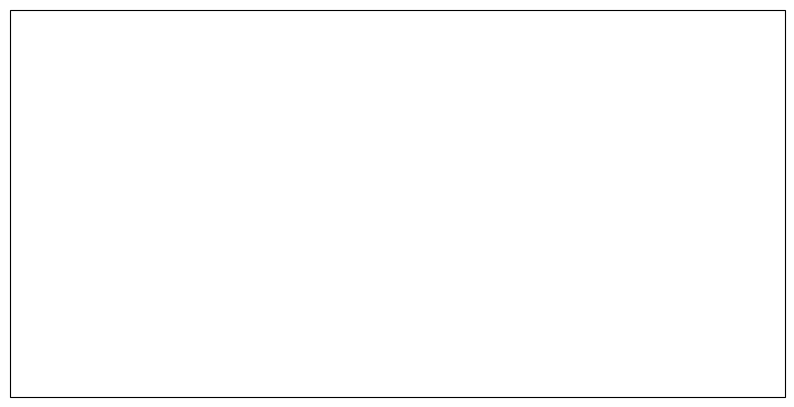

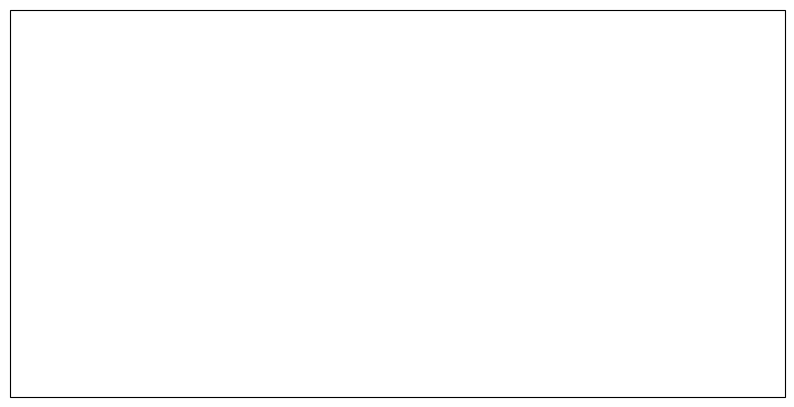

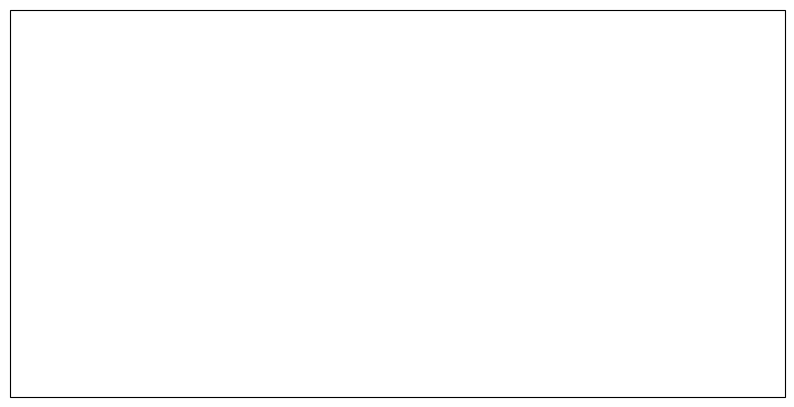

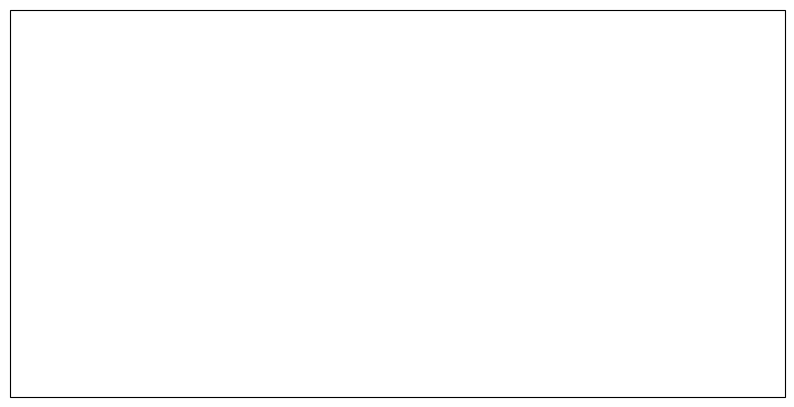

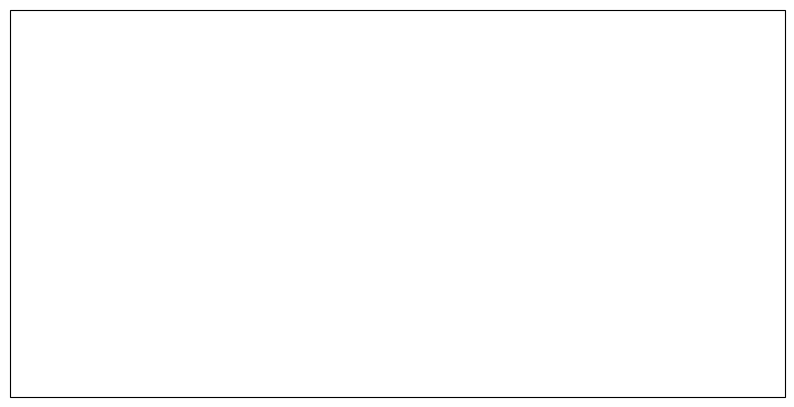

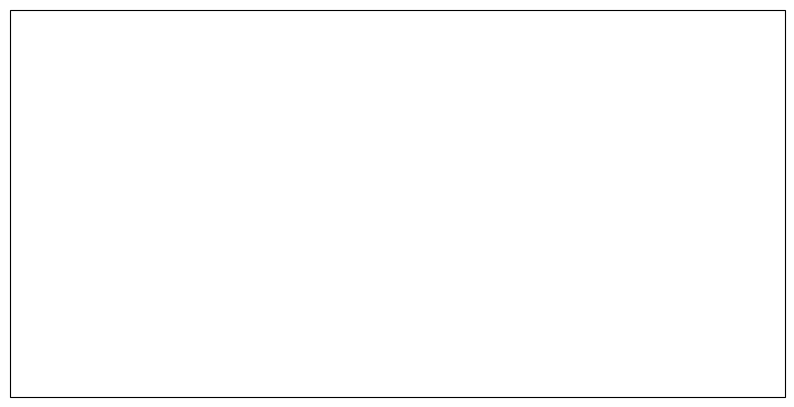

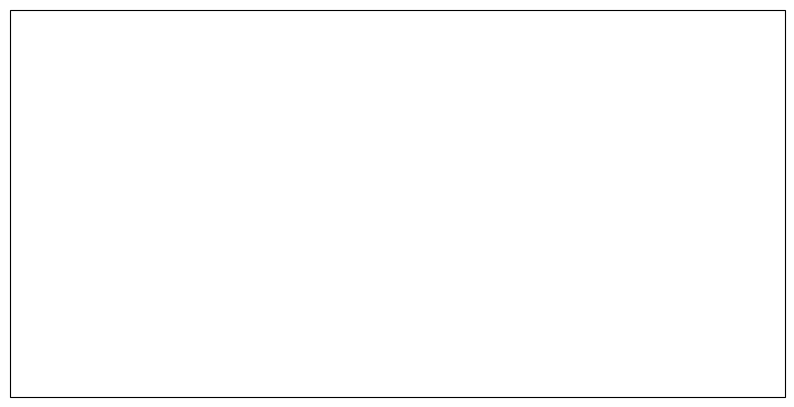

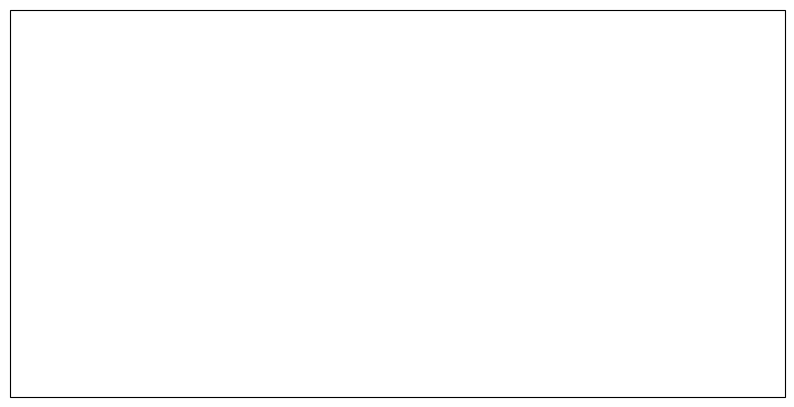

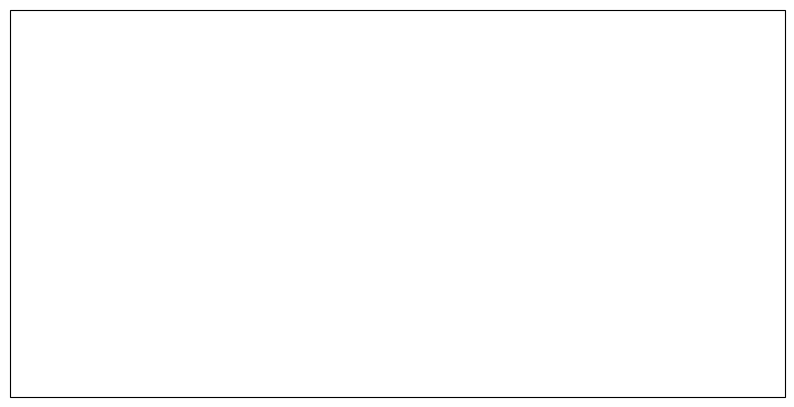

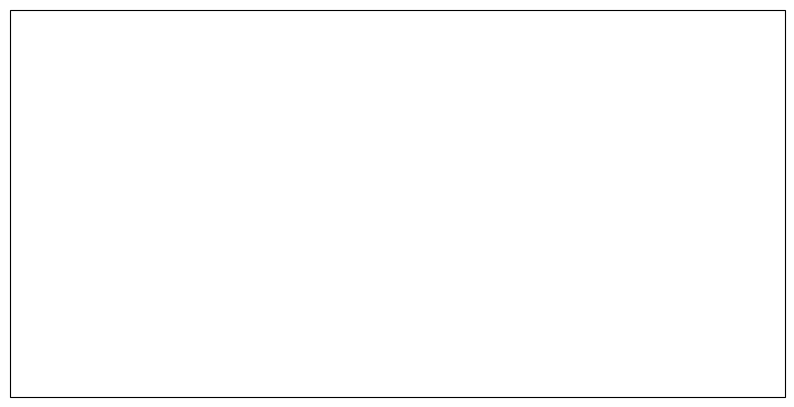

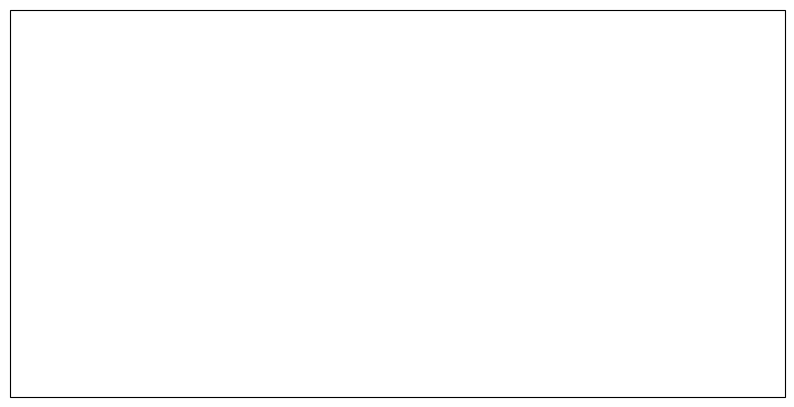

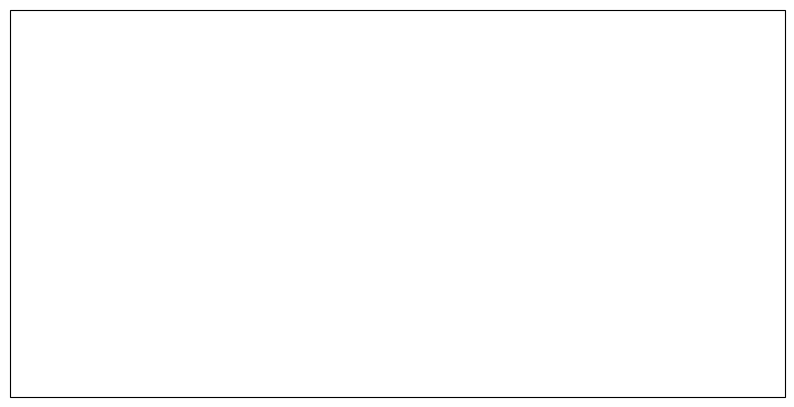

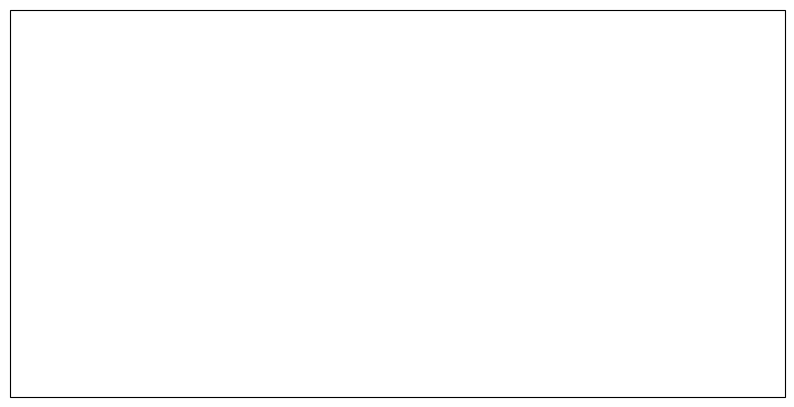

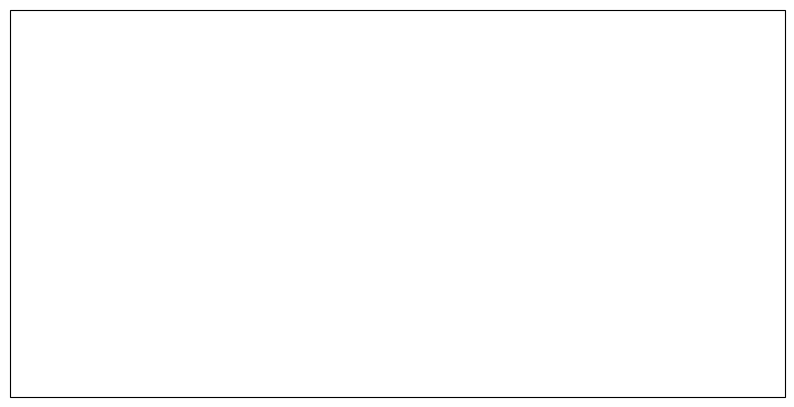

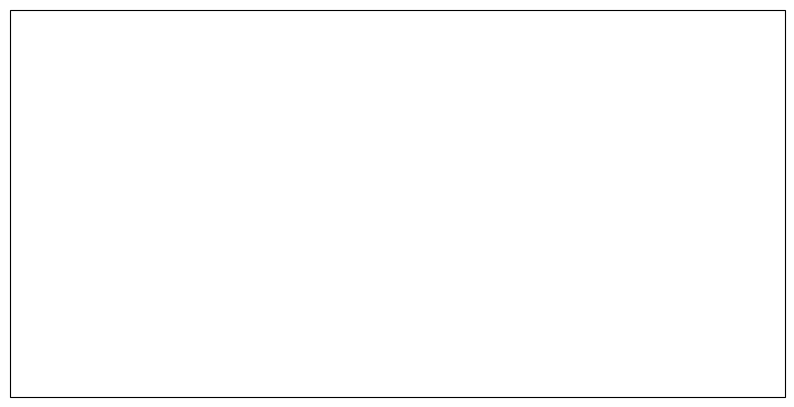

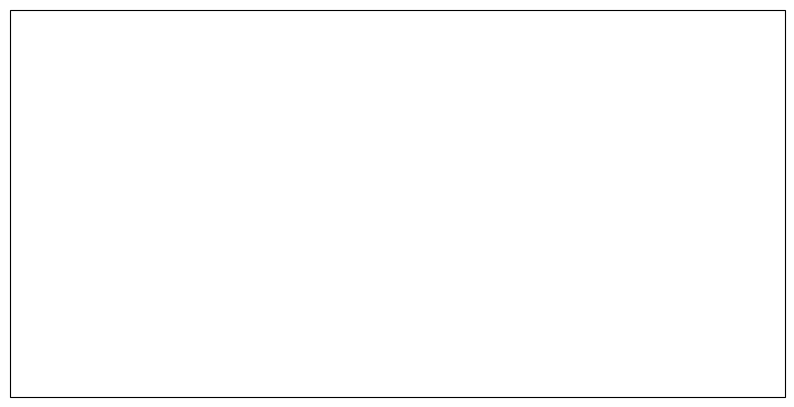

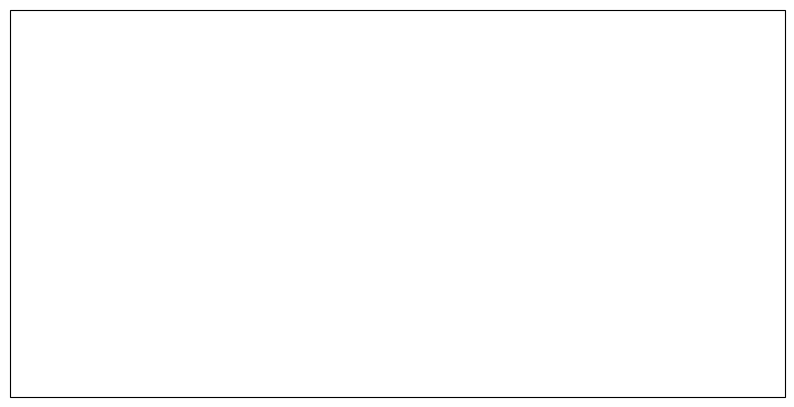

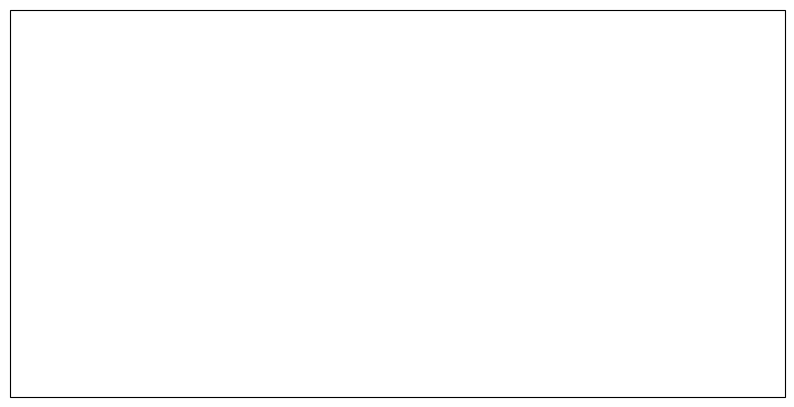

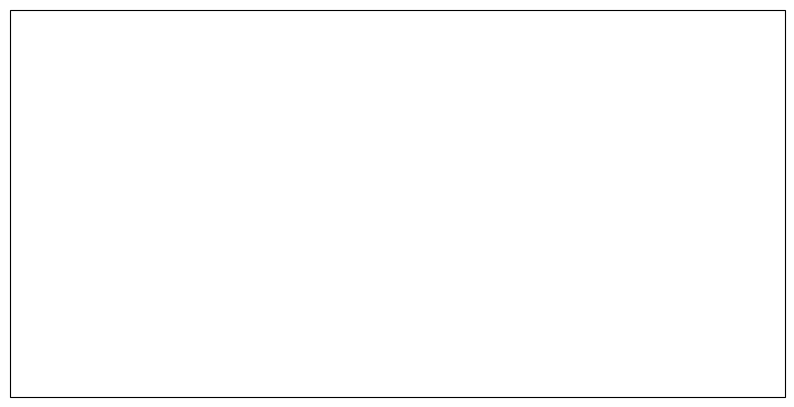

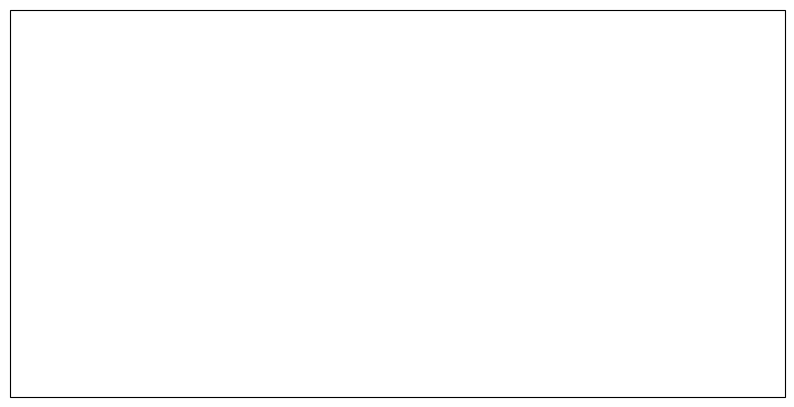

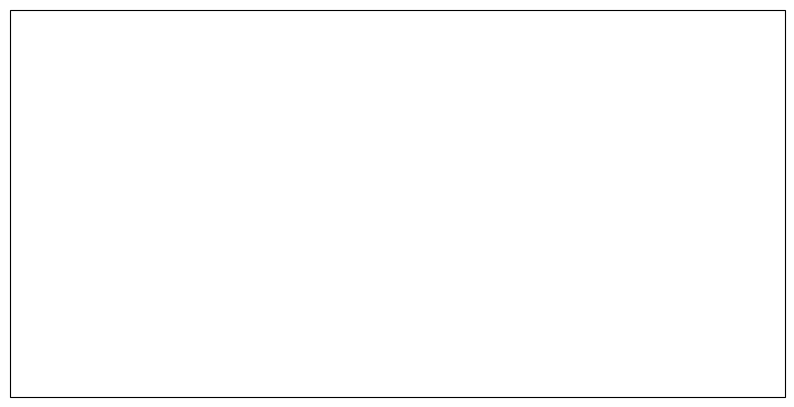

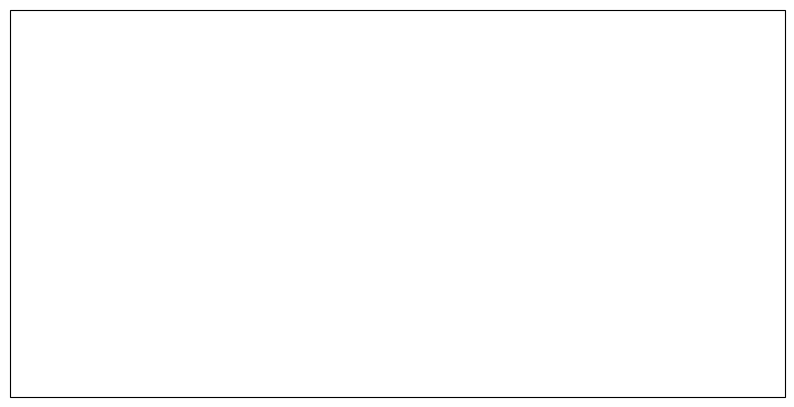

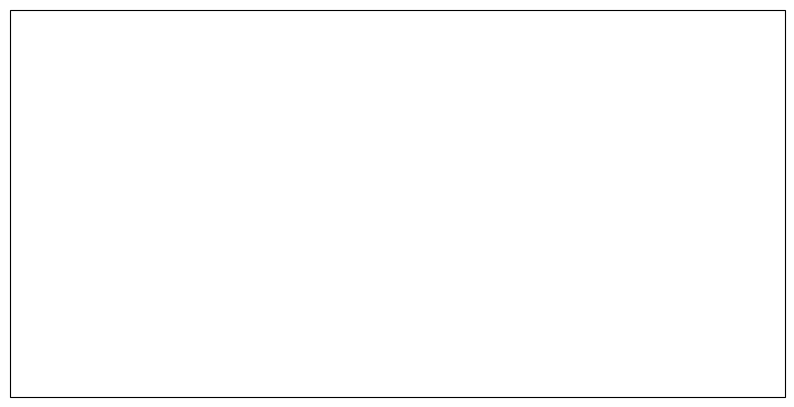

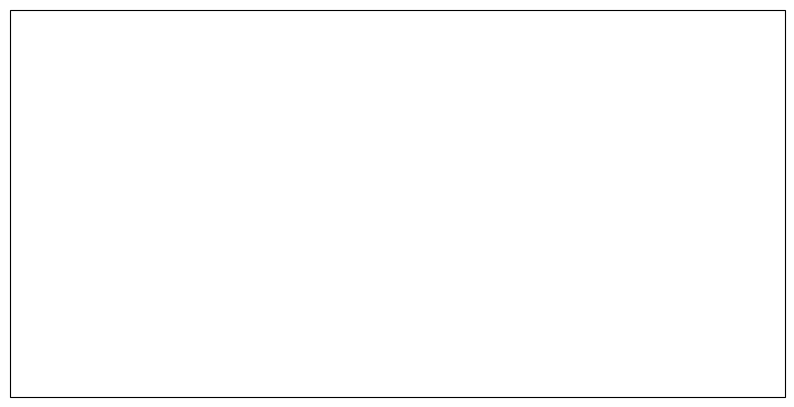

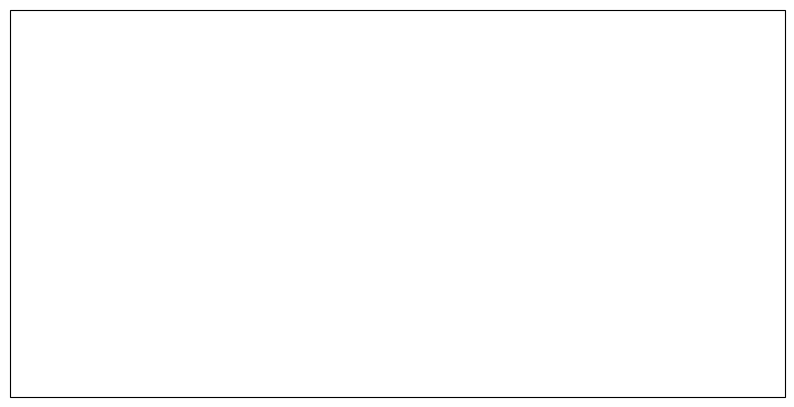

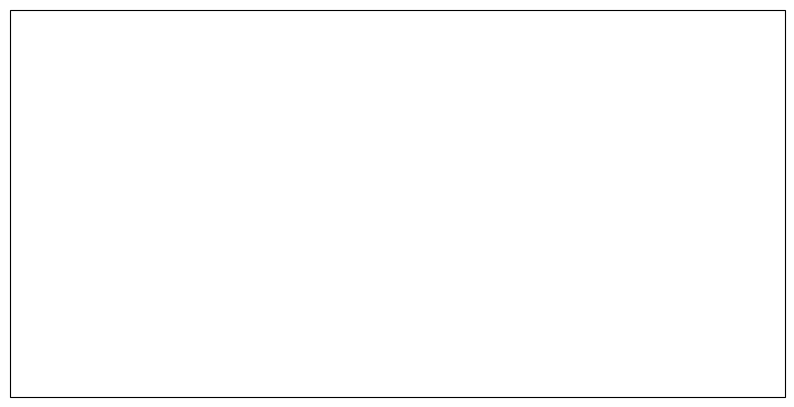

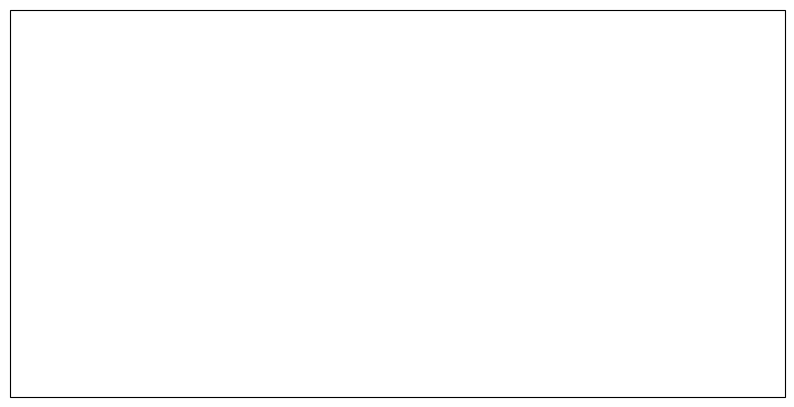

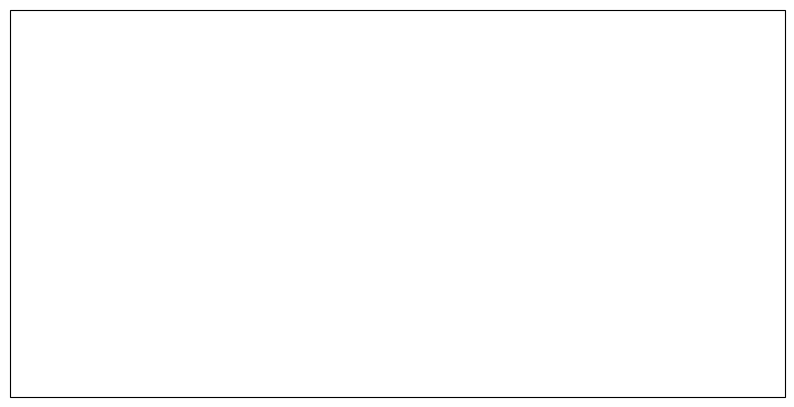

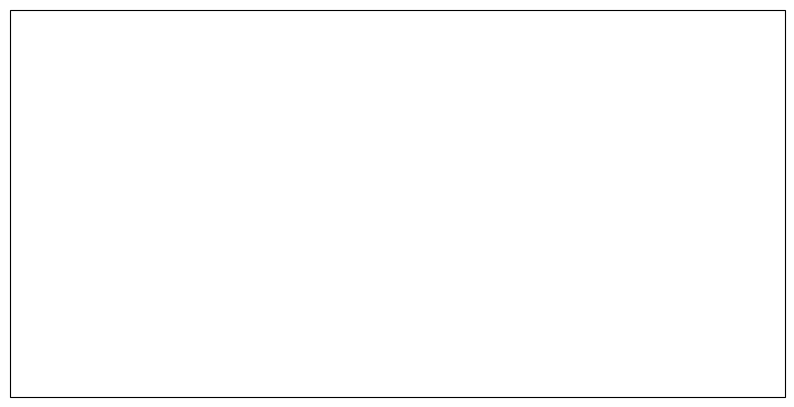

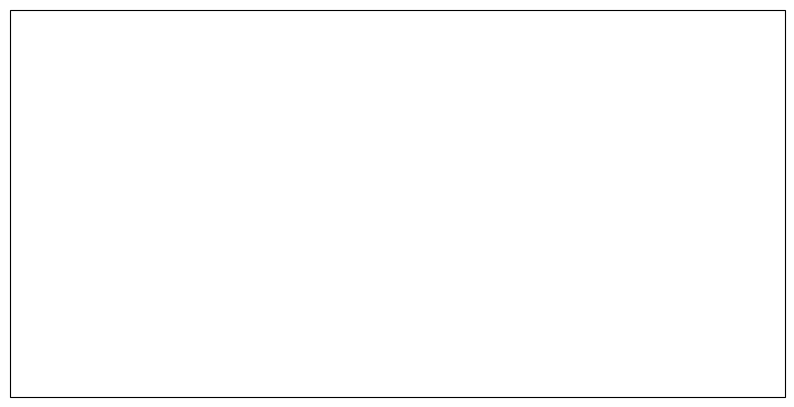

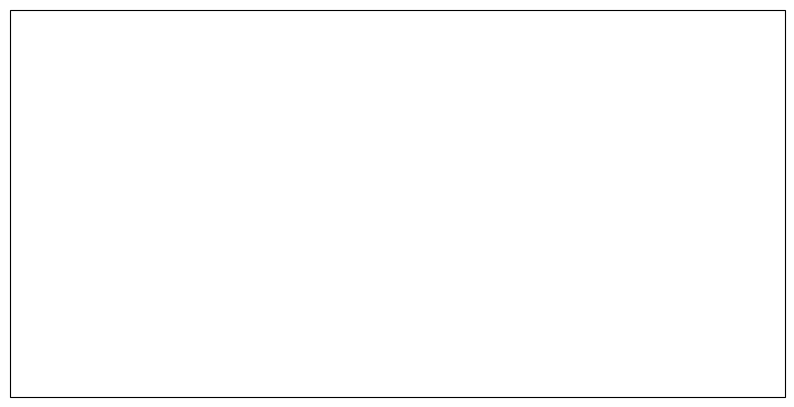

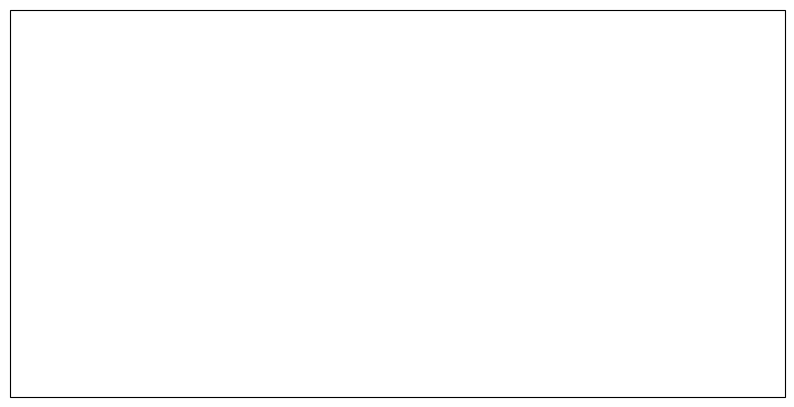

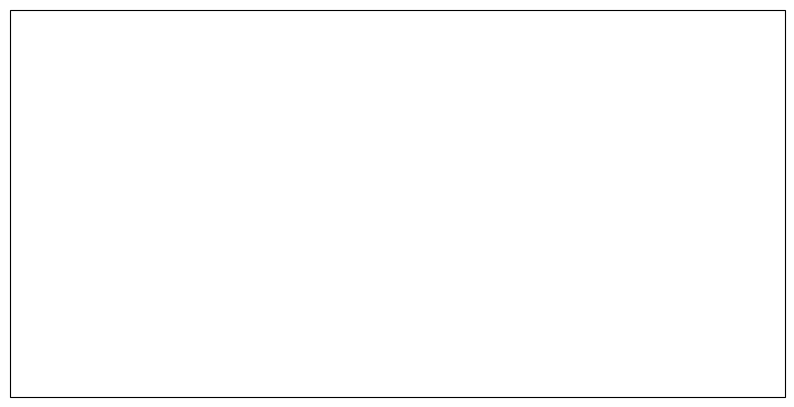

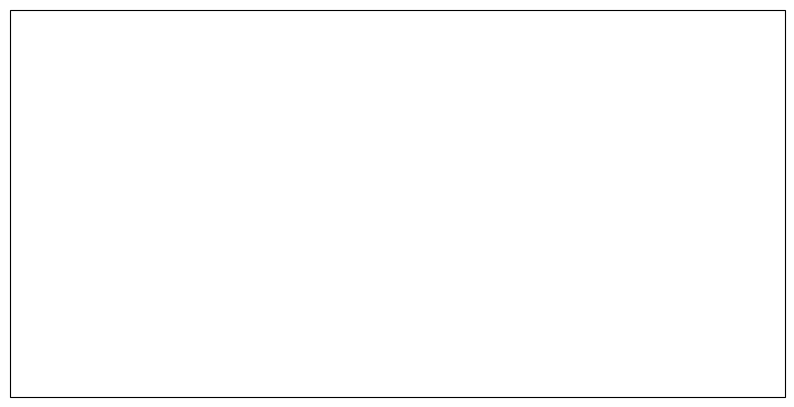

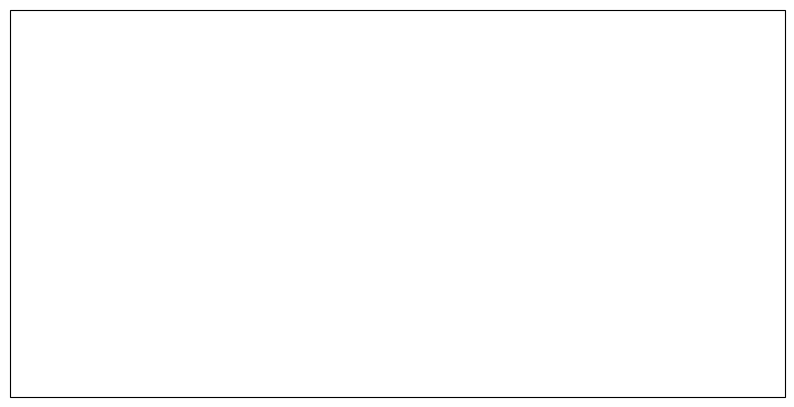

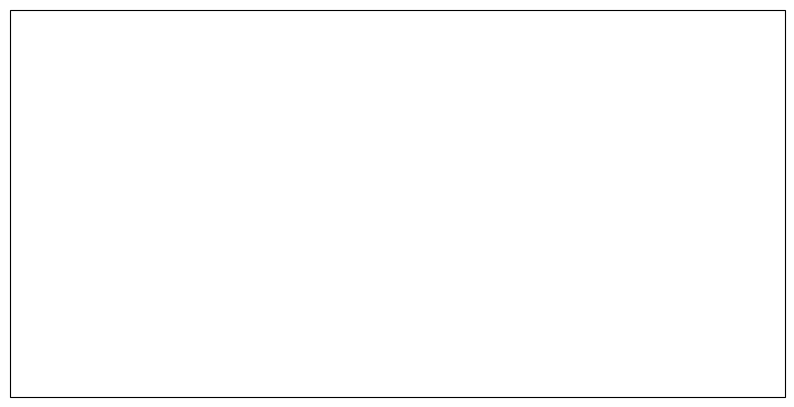

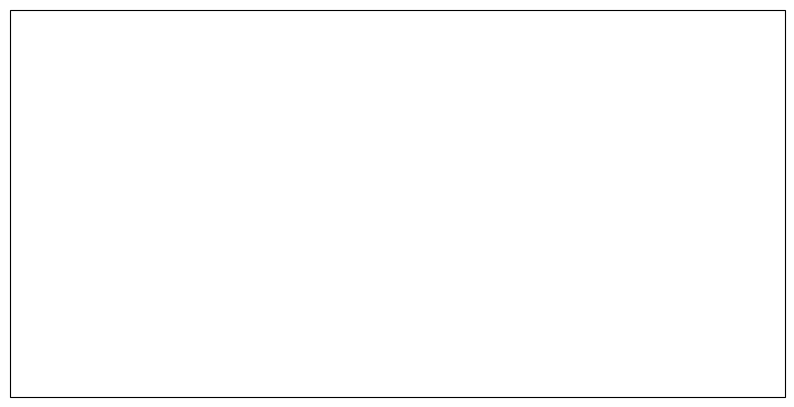

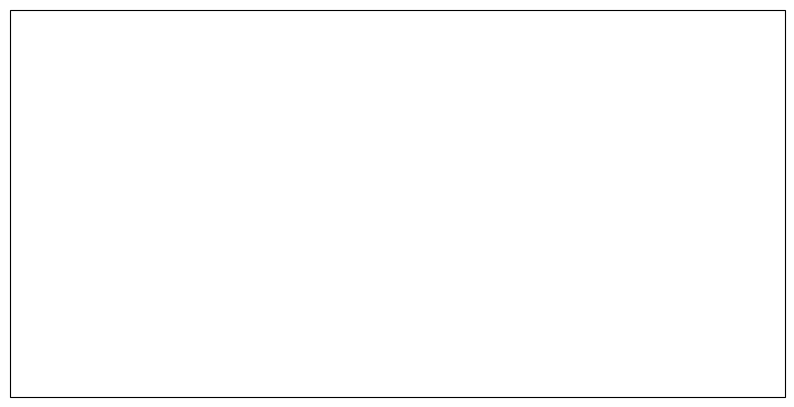

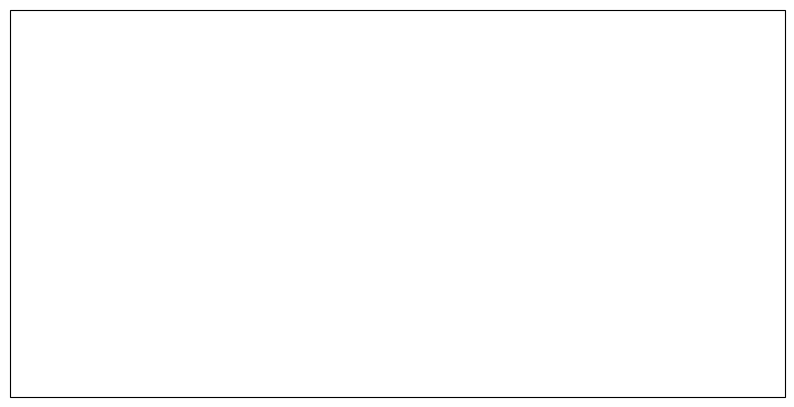

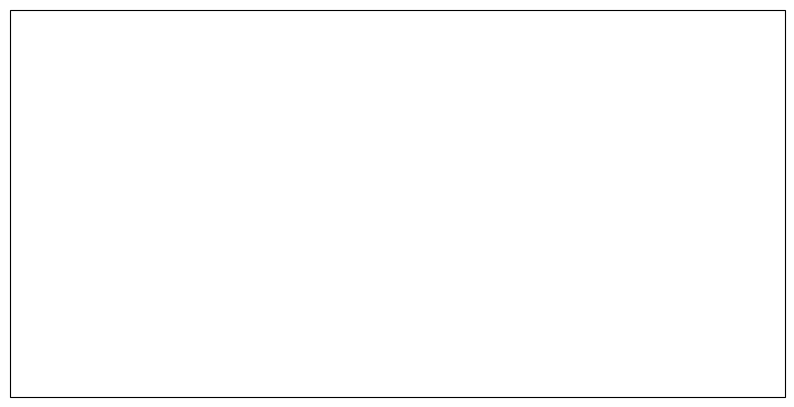

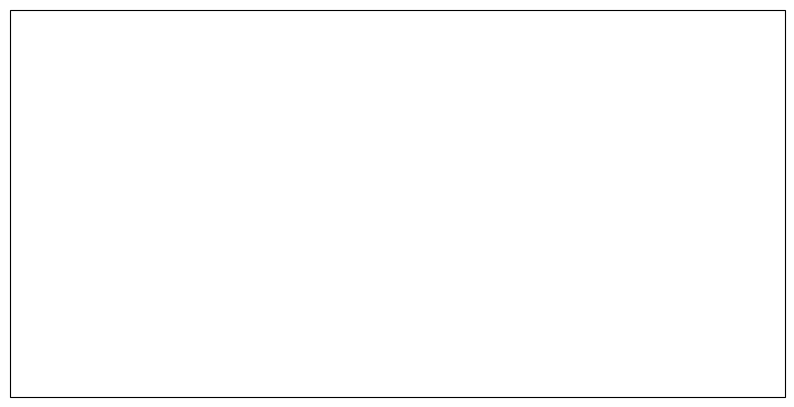

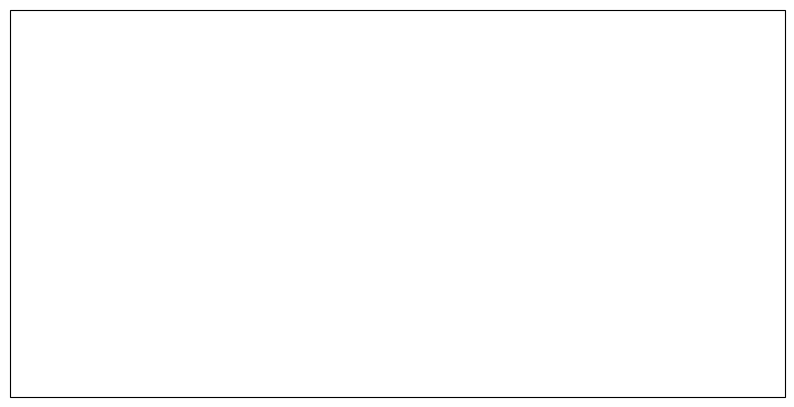

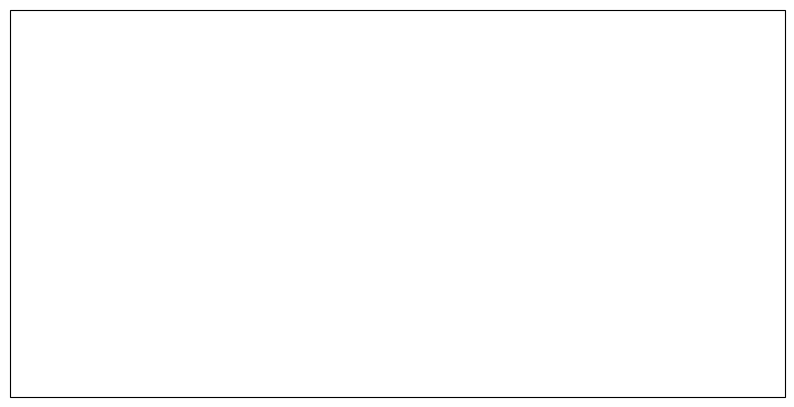

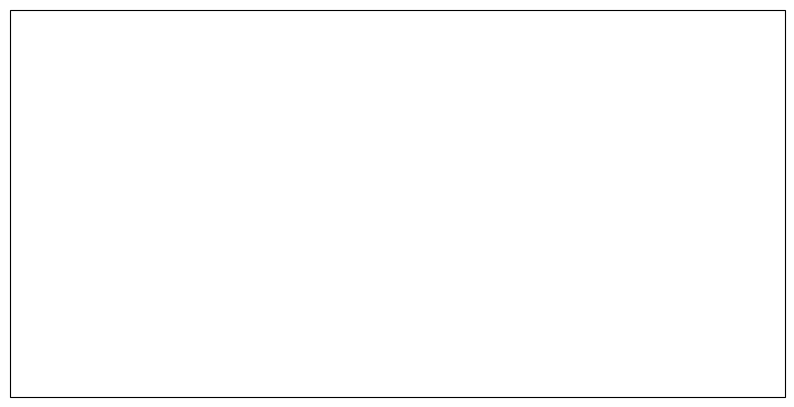

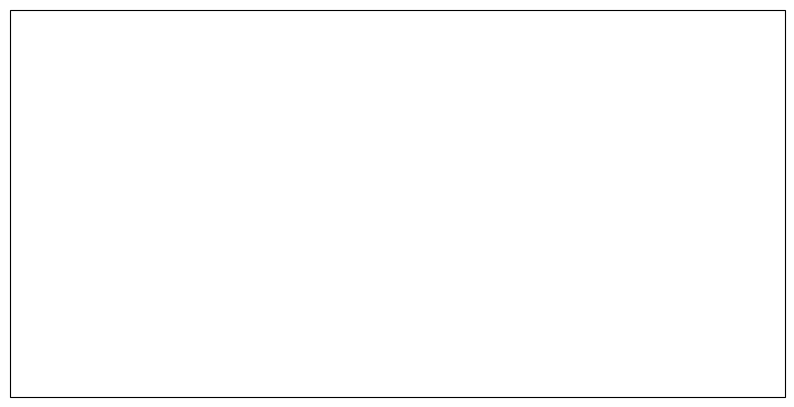

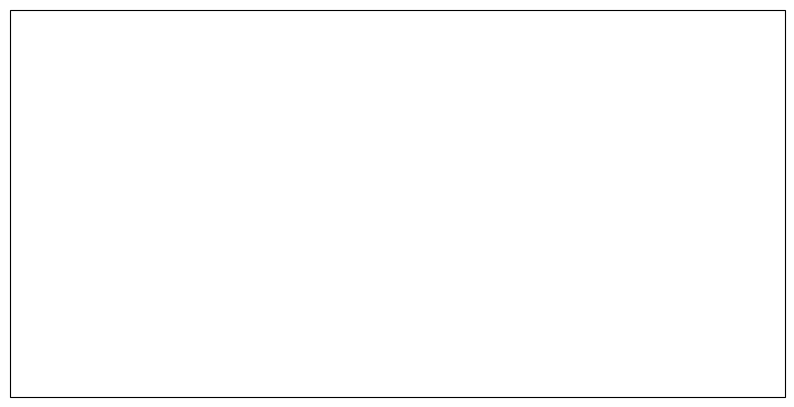

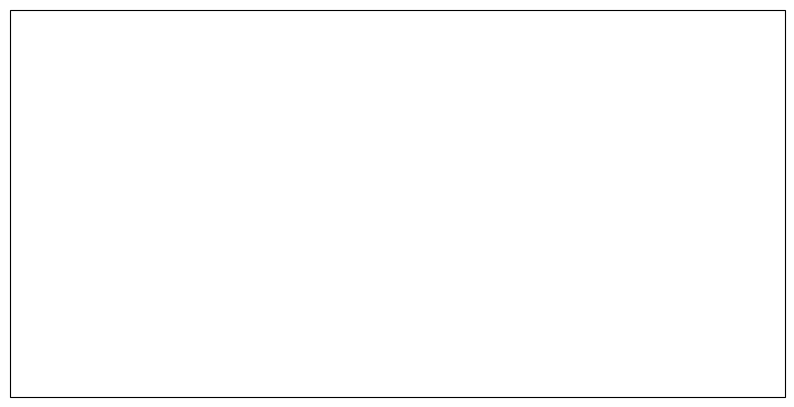

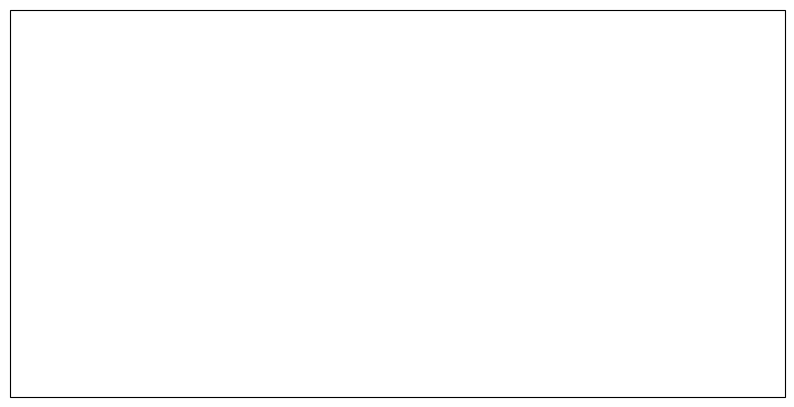

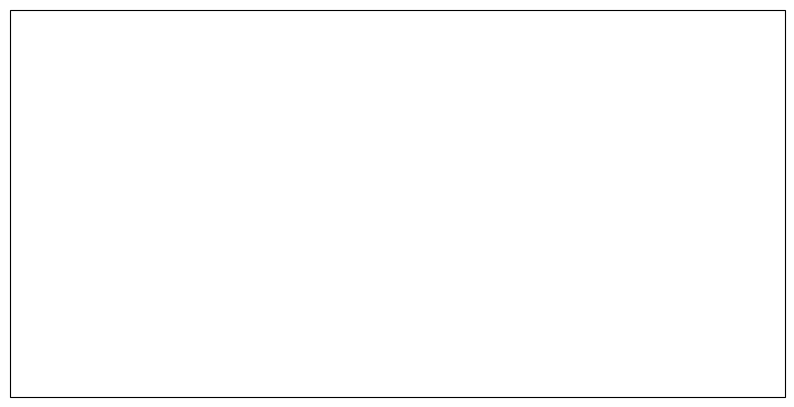

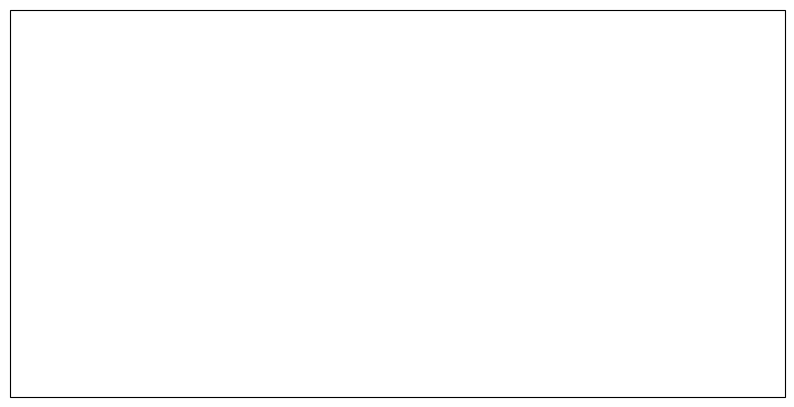

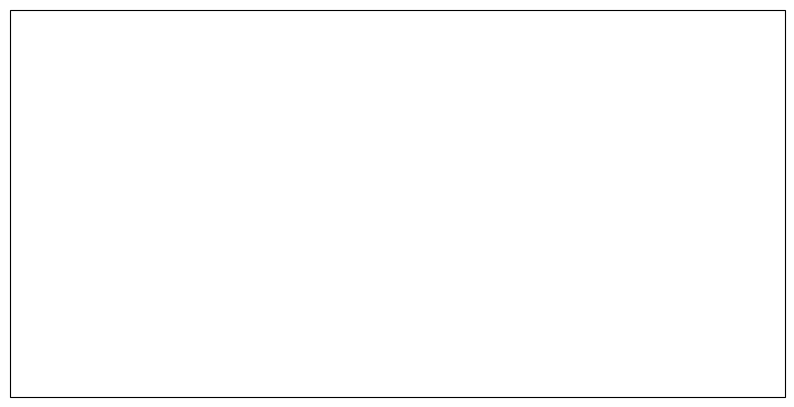

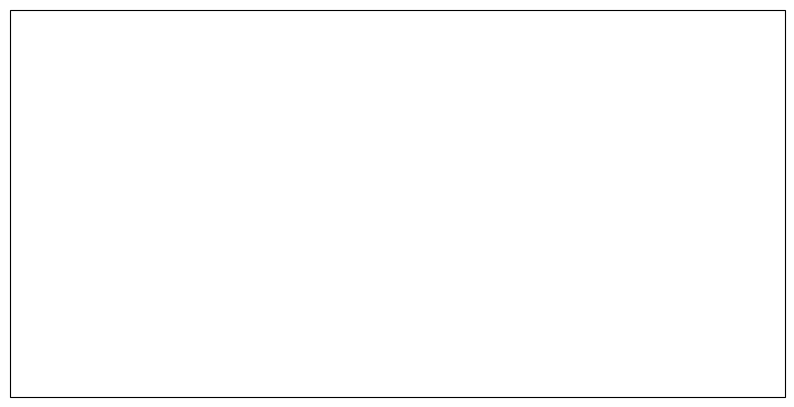

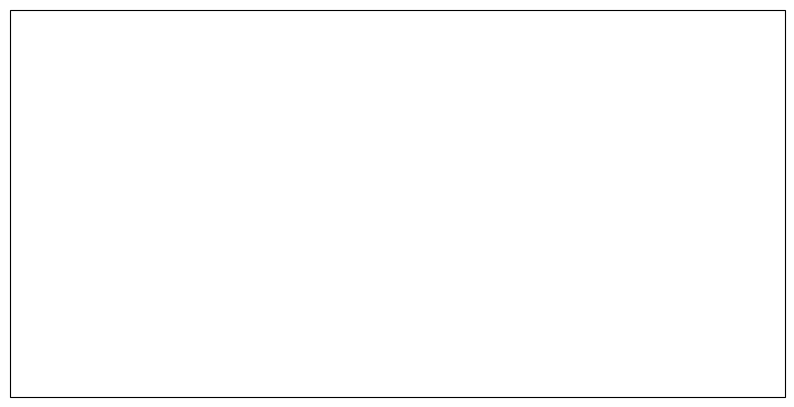

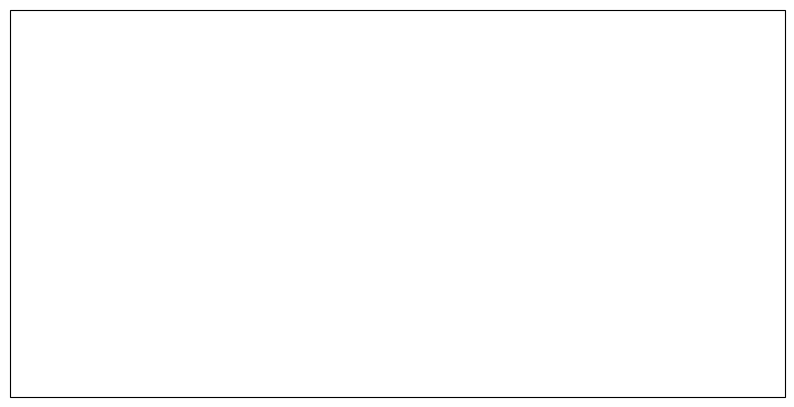

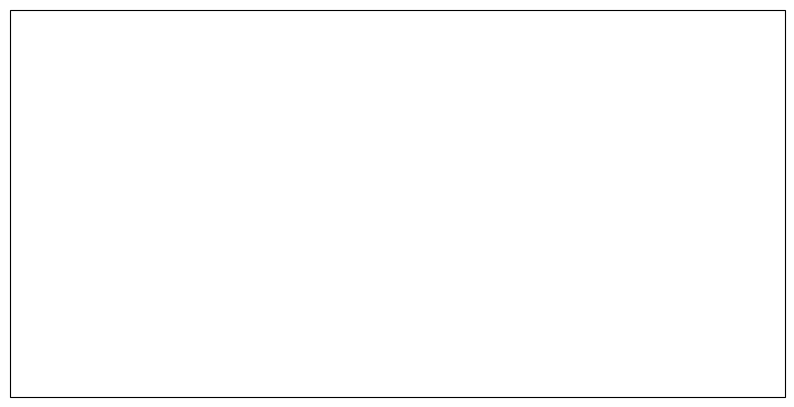

In [76]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from PIL import Image
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# Define start and end dates
start_date = pd.to_datetime("2023-03-22")
end_date = pd.to_datetime("2023-05-23")


# vmin and vmax
vmin = -.05
vmax = 0.1
#cmap = 'balance'

# Define the file path pattern
file_path_pattern = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/may/dt_global_twosat_phy_l4_{:%Y%m%d}_vDT2021.nc"


# Define the file path pattern
file_path_sst = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_1716288824368.nc"

ds_sst = xr.open_dataset(file_path_sst)

# Select latitude and longitude range
lat_range = slice(-41, -33)
lon_range = slice(12, 20)

    
# Initialize lists to store gradients and corresponding coordinates
tempgrad_list = []
times = []


# Iterate over the dates
for current_date in pd.date_range(start=start_date, end=end_date):
    file_path = file_path_pattern.format(current_date)
    if not os.path.exists(file_path):  # Check if the file exists
        continue
    
    ds = xr.open_dataset(file_path)
    
    # Calculate EKE
    ugos = ds['ugos'].sel(latitude=lat_range, longitude=lon_range)
    vgos = ds['vgos'].sel(latitude=lat_range, longitude=lon_range)

    latitude = ds['latitude']
    longitude = ds['longitude']
    # Extract sea surface height data for the specified region
    ssh_subset = ds['sla'].sel(latitude=lat_range, longitude=lon_range) # (Sea Level Anomaly)
    adt_subset = ds['adt'].sel(latitude=lat_range, longitude=lon_range) # (ADT)
    
    #plt.figure(figsize=(10, 6)) # Adjust the figure size to make space for the title
    # Create a map projection
    #ax = plt.axes(projection=ccrs.PlateCarree())
    
    
    # plot the SST 
    sst_subset = ds_sst['analysed_sst'].sel(latitude=lat_range, longitude=lon_range)
    
    sst_sel = sst_subset.sel(time=current_date, method='nearest')
    
    sst_sel_degree = sst_sel - 272.15
    
    # Compute the partial derivatives
    partial_lon = np.gradient(sst_sel_degree, axis=1)  # Gradient along longitude
    partial_lat = np.gradient(sst_sel_degree, axis=0)  # Gradient along latitude
    
    length_per_degree_lat = 111 # km
    
    length_per_degree_lon = 11 * np.cos(np.deg2rad(sst_sel_degree.latitude.values))
    
    # Convert the gradients to degrees per km
    partial_lon_per_km = partial_lon / length_per_degree_lon
    partial_lat_per_km = partial_lat / length_per_degree_lat

    # Sum the partial derivatives (now in degrees per km)
    tempgrad = partial_lon_per_km + partial_lat_per_km
    
    # Append the results and time to the lists
    tempgrad_list.append(tempgrad)
    times.append(current_date)

# Convert lists to numpy arrays
tempgrad_array = np.array(tempgrad_list)
times_array = np.array(times)


# Create a new xarray Dataset to store the gradients with time, latitude, and longitude dimensions
ds_grad = xr.Dataset(
    {
        "tempgrad": (("time", "latitude", "longitude"), tempgrad_array)
    },
    coords={
        "time": times_array,
        "latitude": sst_subset.latitude,
        "longitude": sst_subset.longitude
    }
)

ds_grad





In [77]:
# Load the datasets
tempgrad= ds_grad.tempgrad
temp = ds_date.temp

# Ensure the temp dataset has latitude and longitude as coordinates
temp = temp.assign_coords(lat=temp['lat'], lon=temp['long'])

# Interpolate SST at the locations and times of the temp dataset
tempgrad_at_temp_locs = tempgrad.interp(
    latitude=temp['lat'],
    longitude=temp['long'],
    time=temp['time'],
    method="linear"
)

tempgrad_at_temp_locs


<xarray.DataArray 'tempgrad' (time: 624)>
array([-1.30227680e-03, -2.28259592e-03, -2.70557899e-03, -2.86648466e-03,
       -2.40981425e-03, -1.96307618e-03, -1.84260247e-03, -1.44178865e-03,
       -5.88650061e-04,  2.48263584e-04,  9.32517778e-04,  1.91461919e-03,
        2.98402985e-03,  3.77632629e-03,  4.35199064e-03,  5.00046554e-03,
        5.49774365e-03,  5.17514047e-03,  4.17979423e-03,  3.24102646e-03,
        2.37873547e-03,  1.65435540e-03,  1.25187423e-03,  1.01224213e-03,
        9.92449617e-04,  8.81047197e-04,  1.29128588e-03,  2.45234216e-03,
        4.16636748e-03,  6.03923871e-03,  7.29828175e-03,  8.11150935e-03,
        8.12896432e-03,  7.97780875e-03,  7.20586493e-03,  5.30816287e-03,
        3.80832828e-03,  2.18376522e-03,  6.54869973e-05, -1.85792026e-03,
       -2.94912544e-03, -3.94321698e-03, -4.35076998e-03, -4.21722537e-03,
       -2.84164820e-03, -9.13867100e-04,  1.68184491e-03,  3.44668229e-03,
        4.33404559e-03,  4.44028955e-03,  4.07405397e-03,  3.57434530e-03,
        3.12698341e-03,  2.42784607e-03,  1.61194659e-03,  9.28707500e-04,
        3.13583563e-04, -4.85326978e-04, -1.17528456e-03, -1.64918930e-03,
       -1.90827036e-03, -1.92195009e-03, -1.67410852e-03, -1.20603788e-03,
       -5.97142963e-04,  3.38248771e-05,  6.83856580e-04,  1.10741174e-03,
        1.28603962e-03,  1.41021850e-03,  1.44470948e-03,  1.47972687e-03,
        1.53229505e-03,  1.59483514e-03,  1.77096928e-03,  1.73401064e-03,
        1.71774955e-03,  1.07296262e-03,  1.34796933e-04, -6.34697271e-04,
...
       -2.42024862e-03, -5.52830937e-03, -8.95590187e-03, -9.61726807e-03,
       -9.75499132e-03, -7.61199113e-03, -5.66146502e-03, -3.22649930e-03,
       -3.29756523e-04,  1.98580406e-03,  3.90333903e-03,  5.19144069e-03,
        6.36709190e-03,  6.23081024e-03,  5.18857557e-03,  3.96082104e-03,
        2.66947644e-03,  6.35909847e-04, -8.23318354e-04, -2.59992526e-03,
       -2.75898033e-03, -2.13114745e-03, -6.18636385e-04,  1.28065263e-03,
        2.66458245e-03,  4.19861215e-03,  5.21560874e-03,  6.20744974e-03,
        6.16928014e-03,  6.63756925e-03,  6.23672960e-03,  6.00514578e-03,
        6.35667561e-03,  7.05779487e-03,  7.13114736e-03,  6.90404028e-03,
        6.72419734e-03,  6.61029446e-03,  6.29892311e-03,  5.06271429e-03,
        3.88454388e-03,  2.39976106e-03,  1.06842171e-03,  2.54966211e-04,
       -1.03645041e-04, -4.50873282e-04, -8.37633565e-04, -1.26313125e-03,
       -2.09320250e-03, -2.75379876e-03, -3.32935772e-03, -3.68583268e-03,
       -4.08198371e-03, -4.01903977e-03, -3.69178468e-03, -3.39105024e-03,
       -2.91035205e-03, -2.35755157e-03, -1.75624346e-03, -9.55487711e-04,
       -9.46834313e-05,  8.10702513e-04,  1.89379314e-03,  2.48082367e-03,
        3.18723391e-03,  3.35347711e-03,  3.81007497e-03,  3.81078365e-03,
        3.63957315e-03,  3.26137479e-03,  2.69752301e-03,  2.14238916e-03,
        1.66330068e-03,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan])
Coordinates:
    latitude   (time) float64 -37.52 -37.53 -37.54 -37.54 ... -34.19 -34.18 nan
    longitude  (time) float64 17.32 17.34 17.35 17.35 ... 16.84 16.83 16.82 nan
  * time       (time) datetime64[ns] 2023-03-22T08:33:43 ... 2023-05-23T15:45:43
    long       (time) float64 17.32 17.34 17.35 17.35 ... 16.84 16.83 16.82 nan
    lat        (time) float64 -37.52 -37.53 -37.54 -37.54 ... -34.19 -34.18 nan
    ATD        (time) float64 0.0 1.573 3.091 3.77 ... 1.683e+03 1.685e+03 nan
    lon        (time) float64 17.32 17.34 17.35 17.35 ... 16.84 16.83 16.82 nan

In [93]:
days_elapsed_tempgrad = (tempgrad_at_temp_locs.time.values - tempgrad_at_temp_locs.time.values[0]) / np.timedelta64(1, 'D')
days_elapsed_tempgrad

# Calculate the number of days since the reference date
yearday_tempgrad = days_elapsed_tempgrad +80.36

# Replace the time coordinate with yearday
tempgrad_global_glider = tempgrad_at_temp_locs.assign_coords(time=("time", yearday))

# Print the updated DataArray
tempgrad_global_glider

<xarray.DataArray 'tempgrad' (time: 624)>
array([-1.30227680e-03, -2.28259592e-03, -2.70557899e-03, -2.86648466e-03,
       -2.40981425e-03, -1.96307618e-03, -1.84260247e-03, -1.44178865e-03,
       -5.88650061e-04,  2.48263584e-04,  9.32517778e-04,  1.91461919e-03,
        2.98402985e-03,  3.77632629e-03,  4.35199064e-03,  5.00046554e-03,
        5.49774365e-03,  5.17514047e-03,  4.17979423e-03,  3.24102646e-03,
        2.37873547e-03,  1.65435540e-03,  1.25187423e-03,  1.01224213e-03,
        9.92449617e-04,  8.81047197e-04,  1.29128588e-03,  2.45234216e-03,
        4.16636748e-03,  6.03923871e-03,  7.29828175e-03,  8.11150935e-03,
        8.12896432e-03,  7.97780875e-03,  7.20586493e-03,  5.30816287e-03,
        3.80832828e-03,  2.18376522e-03,  6.54869973e-05, -1.85792026e-03,
       -2.94912544e-03, -3.94321698e-03, -4.35076998e-03, -4.21722537e-03,
       -2.84164820e-03, -9.13867100e-04,  1.68184491e-03,  3.44668229e-03,
        4.33404559e-03,  4.44028955e-03,  4.07405397e-03,  3.57434530e-03,
        3.12698341e-03,  2.42784607e-03,  1.61194659e-03,  9.28707500e-04,
        3.13583563e-04, -4.85326978e-04, -1.17528456e-03, -1.64918930e-03,
       -1.90827036e-03, -1.92195009e-03, -1.67410852e-03, -1.20603788e-03,
       -5.97142963e-04,  3.38248771e-05,  6.83856580e-04,  1.10741174e-03,
        1.28603962e-03,  1.41021850e-03,  1.44470948e-03,  1.47972687e-03,
        1.53229505e-03,  1.59483514e-03,  1.77096928e-03,  1.73401064e-03,
        1.71774955e-03,  1.07296262e-03,  1.34796933e-04, -6.34697271e-04,
...
       -2.42024862e-03, -5.52830937e-03, -8.95590187e-03, -9.61726807e-03,
       -9.75499132e-03, -7.61199113e-03, -5.66146502e-03, -3.22649930e-03,
       -3.29756523e-04,  1.98580406e-03,  3.90333903e-03,  5.19144069e-03,
        6.36709190e-03,  6.23081024e-03,  5.18857557e-03,  3.96082104e-03,
        2.66947644e-03,  6.35909847e-04, -8.23318354e-04, -2.59992526e-03,
       -2.75898033e-03, -2.13114745e-03, -6.18636385e-04,  1.28065263e-03,
        2.66458245e-03,  4.19861215e-03,  5.21560874e-03,  6.20744974e-03,
        6.16928014e-03,  6.63756925e-03,  6.23672960e-03,  6.00514578e-03,
        6.35667561e-03,  7.05779487e-03,  7.13114736e-03,  6.90404028e-03,
        6.72419734e-03,  6.61029446e-03,  6.29892311e-03,  5.06271429e-03,
        3.88454388e-03,  2.39976106e-03,  1.06842171e-03,  2.54966211e-04,
       -1.03645041e-04, -4.50873282e-04, -8.37633565e-04, -1.26313125e-03,
       -2.09320250e-03, -2.75379876e-03, -3.32935772e-03, -3.68583268e-03,
       -4.08198371e-03, -4.01903977e-03, -3.69178468e-03, -3.39105024e-03,
       -2.91035205e-03, -2.35755157e-03, -1.75624346e-03, -9.55487711e-04,
       -9.46834313e-05,  8.10702513e-04,  1.89379314e-03,  2.48082367e-03,
        3.18723391e-03,  3.35347711e-03,  3.81007497e-03,  3.81078365e-03,
        3.63957315e-03,  3.26137479e-03,  2.69752301e-03,  2.14238916e-03,
        1.66330068e-03,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan])
Coordinates:
    latitude   (time) float64 -37.52 -37.53 -37.54 -37.54 ... -34.19 -34.18 nan
    longitude  (time) float64 17.32 17.34 17.35 17.35 ... 16.84 16.83 16.82 nan
  * time       (time) float64 80.36 80.46 80.56 80.66 ... 142.5 142.6 142.7
    long       (time) float64 17.32 17.34 17.35 17.35 ... 16.84 16.83 16.82 nan
    lat        (time) float64 -37.52 -37.53 -37.54 -37.54 ... -34.19 -34.18 nan
    ATD        (time) float64 0.0 1.573 3.091 3.77 ... 1.683e+03 1.685e+03 nan
    lon        (time) float64 17.32 17.34 17.35 17.35 ... 16.84 16.83 16.82 nan

([<matplotlib.axis.XTick at 0x172e7109150>,
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200'),
  Text(1400.0, 0, '1400'),
  Text(1600.0, 0, '1600'),
  Text(1800.0, 0, '1800')])

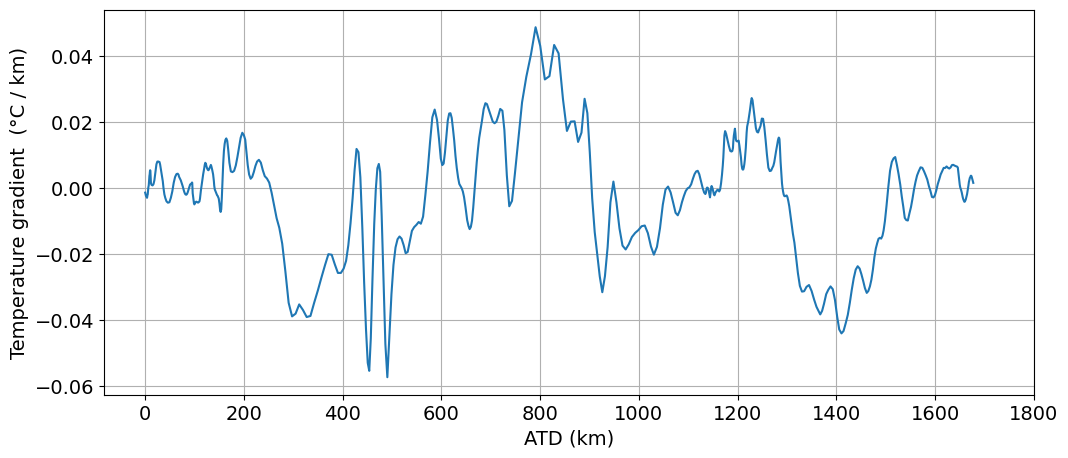

In [99]:
# Create a figure with a specific size
plt.figure(figsize=(12, 5))

plt.plot(tempgrad_global_glider.ATD,tempgrad_global_glider, label='global')

# Set labels
plt.xlabel('ATD (km)')
plt.ylabel('Temperature gradient  (°C / km)')
plt.grid()

# Set x-axis ticks to have steps of 200
plt.xticks(np.arange(0, max(tempgrad_global_glider.ATD) + 200, 200))

# Rotate date labels for better readability
#plt.gcf().autofmt_xdate()

# ADT in space and time

In [142]:
combined_ds.adt

<xarray.DataArray 'adt' (time: 63, latitude: 720, longitude: 1440)>
dask.array<concatenate, shape=(63, 720, 1440), dtype=float64, chunksize=(1, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 2023-03-22 2023-03-23 ... 2023-05-23
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Attributes:
    comment:        The absolute dynamic topography is the sea surface height...
    grid_mapping:   crs
    long_name:      Absolute dynamic topography
    standard_name:  sea_surface_height_above_geoid
    units:          m

In [140]:

import os

# Define start and end dates
start_date = pd.to_datetime("2023-03-22")
end_date = pd.to_datetime("2023-05-23")

# Define the file path pattern
file_path_pattern = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/may/dt_global_twosat_phy_l4_{:%Y%m%d}_vDT2021.nc"

# Generate a list of file paths for the given date range
file_paths = [file_path_pattern.format(current_date) for current_date in pd.date_range(start=start_date, end=end_date)]

# Filter out the paths that do not exist
existing_file_paths = [file_path for file_path in file_paths if os.path.exists(file_path)]

# Open multiple files as a single dataset
combined_ds = xr.open_mfdataset(existing_file_paths, combine='by_coords')

# Print the combined dataset
combined_ds

<xarray.Dataset>
Dimensions:         (time: 63, latitude: 720, nv: 2, longitude: 1440)
Coordinates:
  * time            (time) datetime64[ns] 2023-03-22 2023-03-23 ... 2023-05-23
  * latitude        (latitude) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * longitude       (longitude) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
  * nv              (nv) int32 0 1
Data variables: (12/14)
    crs             (time) int32 -2147483647 -2147483647 ... -2147483647
    lat_bnds        (time, latitude, nv) float32 dask.array<chunksize=(1, 720, 2), meta=np.ndarray>
    lon_bnds        (time, longitude, nv) float32 dask.array<chunksize=(1, 1440, 2), meta=np.ndarray>
    sla             (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    err_sla         (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ugosa           (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ...              ...
    err_vgosa       (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    adt             (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ugos            (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    vgos            (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    tpa_correction  (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    flag_ice        (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         http://climate.copernicus.eu/c3s-user-se...
    creator_email:                   http://climate.copernicus.eu/c3s-user-se...
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2023-03-22T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2023-03-21T12:00:00Z
    title:                           DT merged two satellites Global Ocean Gr...

In [145]:
# Load the datasets
adt = combined_ds.adt
temp = ds_date.temp

# Ensure the temp dataset has latitude and longitude as coordinates
temp = temp.assign_coords(lat=temp['lat'], lon=temp['long'])

# Interpolate SST at the locations and times of the temp dataset
adt_at_temp_locs = adt.interp(
    latitude=temp['lat'],
    longitude=temp['long'],
    time=temp['time'],
    method="linear"
)

adt_at_temp_locs


<xarray.DataArray 'adt' (time: 624)>
dask.array<chunked_aware_interpnd, shape=(624,), dtype=float64, chunksize=(624,), chunktype=numpy.ndarray>
Coordinates:
    latitude   (time) float64 -37.52 -37.53 -37.54 -37.54 ... -34.19 -34.18 nan
    longitude  (time) float64 17.32 17.34 17.35 17.35 ... 16.84 16.83 16.82 nan
  * time       (time) datetime64[ns] 2023-03-22T08:33:43 ... 2023-05-23T15:45:43
    long       (time) float64 17.32 17.34 17.35 17.35 ... 16.84 16.83 16.82 nan
    lat        (time) float64 -37.52 -37.53 -37.54 -37.54 ... -34.19 -34.18 nan
    ATD        (time) float64 0.0 1.573 3.091 3.77 ... 1.683e+03 1.685e+03 nan
    lon        (time) float64 17.32 17.34 17.35 17.35 ... 16.84 16.83 16.82 nan
Attributes:
    comment:        The absolute dynamic topography is the sea surface height...
    grid_mapping:   crs
    long_name:      Absolute dynamic topography
    standard_name:  sea_surface_height_above_geoid
    units:          m

In [147]:
days_elapsed_adt = (adt_at_temp_locs.time.values - adt_at_temp_locs.time.values[0]) / np.timedelta64(1, 'D')
days_elapsed_adt

# Calculate the number of days since the reference date
yearday_adt = days_elapsed_adt +80.36

# Replace the time coordinate with yearday
adt_global_glider = adt_at_temp_locs.assign_coords(time=("time", yearday))

# Print the updated DataArray
adt_global_glider

<xarray.DataArray 'adt' (time: 624)>
dask.array<chunked_aware_interpnd, shape=(624,), dtype=float64, chunksize=(624,), chunktype=numpy.ndarray>
Coordinates:
    latitude   (time) float64 -37.52 -37.53 -37.54 -37.54 ... -34.19 -34.18 nan
    longitude  (time) float64 17.32 17.34 17.35 17.35 ... 16.84 16.83 16.82 nan
  * time       (time) float64 80.36 80.46 80.56 80.66 ... 142.5 142.6 142.7
    long       (time) float64 17.32 17.34 17.35 17.35 ... 16.84 16.83 16.82 nan
    lat        (time) float64 -37.52 -37.53 -37.54 -37.54 ... -34.19 -34.18 nan
    ATD        (time) float64 0.0 1.573 3.091 3.77 ... 1.683e+03 1.685e+03 nan
    lon        (time) float64 17.32 17.34 17.35 17.35 ... 16.84 16.83 16.82 nan
Attributes:
    comment:        The absolute dynamic topography is the sea surface height...
    grid_mapping:   crs
    long_name:      Absolute dynamic topography
    standard_name:  sea_surface_height_above_geoid
    units:          m

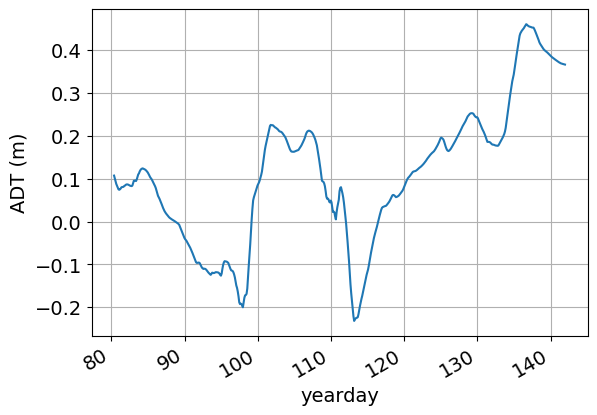

In [150]:
plt.plot(adt_global_glider.time,adt_global_glider, label='global')

# Set labels
plt.xlabel('yearday')
plt.ylabel('ADT (m)')
plt.grid()

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

In [151]:
plt.plot(adt_global_glider.ATD,adt_global_glider, label='global')

# Set labels
plt.xlabel('ATD (km)')
plt.ylabel('ADT (m)')
plt.grid()

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# EKE along time and ATD

In [152]:
# Select latitude and longitude range
lat_range = slice(-41, -32)
lon_range = slice(12, 21)

# Calculate EKE
ugos = combined_ds['ugos'].sel(latitude=lat_range, longitude=lon_range)
vgos = combined_ds['vgos'].sel(latitude=lat_range, longitude=lon_range)
eke = 0.5 * (ugos ** 2 + vgos ** 2)

temp = ds_date.temp

# Ensure the temp dataset has latitude and longitude as coordinates
temp = temp.assign_coords(lat=temp['lat'], lon=temp['long'])

# Interpolate SST at the locations and times of the temp dataset
eke_at_temp_locs = eke.interp(
    latitude=temp['lat'],
    longitude=temp['long'],
    time=temp['time'],
    method="linear"
)

eke_at_temp_locs

<xarray.DataArray (time: 624)>
dask.array<chunked_aware_interpnd, shape=(624,), dtype=float64, chunksize=(624,), chunktype=numpy.ndarray>
Coordinates:
    latitude   (time) float64 -37.52 -37.53 -37.54 -37.54 ... -34.19 -34.18 nan
    longitude  (time) float64 17.32 17.34 17.35 17.35 ... 16.84 16.83 16.82 nan
  * time       (time) datetime64[ns] 2023-03-22T08:33:43 ... 2023-05-23T15:45:43
    long       (time) float64 17.32 17.34 17.35 17.35 ... 16.84 16.83 16.82 nan
    lat        (time) float64 -37.52 -37.53 -37.54 -37.54 ... -34.19 -34.18 nan
    ATD        (time) float64 0.0 1.573 3.091 3.77 ... 1.683e+03 1.685e+03 nan
    lon        (time) float64 17.32 17.34 17.35 17.35 ... 16.84 16.83 16.82 nan

In [153]:
days_elapsed_eke = (eke_at_temp_locs.time.values - eke_at_temp_locs.time.values[0]) / np.timedelta64(1, 'D')
days_elapsed_eke

# Calculate the number of days since the reference date
yearday_eke = days_elapsed_eke +80.36

# Replace the time coordinate with yearday
eke_global_glider = eke_at_temp_locs.assign_coords(time=("time", yearday))

# Print the updated DataArray
eke_global_glider

<xarray.DataArray (time: 624)>
dask.array<chunked_aware_interpnd, shape=(624,), dtype=float64, chunksize=(624,), chunktype=numpy.ndarray>
Coordinates:
    latitude   (time) float64 -37.52 -37.53 -37.54 -37.54 ... -34.19 -34.18 nan
    longitude  (time) float64 17.32 17.34 17.35 17.35 ... 16.84 16.83 16.82 nan
  * time       (time) float64 80.36 80.46 80.56 80.66 ... 142.5 142.6 142.7
    long       (time) float64 17.32 17.34 17.35 17.35 ... 16.84 16.83 16.82 nan
    lat        (time) float64 -37.52 -37.53 -37.54 -37.54 ... -34.19 -34.18 nan
    ATD        (time) float64 0.0 1.573 3.091 3.77 ... 1.683e+03 1.685e+03 nan
    lon        (time) float64 17.32 17.34 17.35 17.35 ... 16.84 16.83 16.82 nan

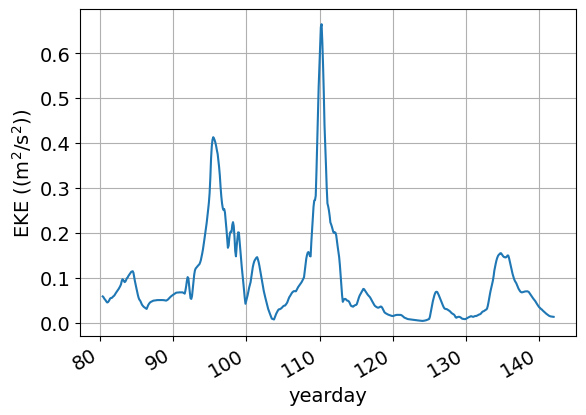

In [155]:
plt.plot(eke_global_glider.time,eke_global_glider, label='global')

# Set labels
plt.xlabel('yearday')
plt.ylabel('EKE ((m$^2$/s$^2$))')
plt.grid()

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

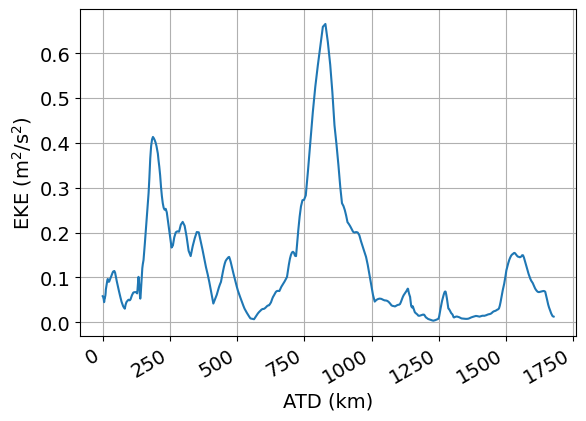

In [159]:
plt.plot(eke_global_glider.ATD,eke_global_glider, label='global')

# Set labels
plt.xlabel('ATD (km)')
plt.ylabel('EKE (m$^2$/s$^2$)')
plt.grid()

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# plots along time in dates

In [34]:
AOU = ds_date.sol - ds_date.o2

In [35]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Import the module for date formatting

#density
density = gsw.sigma0(ds_date.salinity, ds_date.temp)

# Adjust the figure size
plt.figure(figsize=(10, 4))  # Adjust width as needed, height is optional

# Plot the pcolormesh
plt.pcolormesh(ds_date.time, ds_date.ctd_depth, AOU)

# Add labels and title
plt.xlabel('Time', fontsize=10)
plt.ylabel('Depth (m)', fontsize=10)

# Add colorbar with label
cbar = plt.colorbar()
cbar.set_label('AOU', fontsize=10)

# Generate levels for the contour lines
# Specify the beginning, ending, and spacing
beginning = 26.4  # Beginning value
ending = 27.8    # Ending value
spacing = 0.2    # Spacing between contour lines
levels = np.arange(beginning, ending + spacing, spacing)

# Add density contour lines with specified levels and labels
contour = plt.contour(ds_date.time, ds_date.ctd_depth, density, levels=levels, colors='k', linewidths=0.5)
plt.clabel(contour, inline=True, fontsize=8)  # Add labels to contour lines

# Add grid lines
plt.grid()

# Invert y-axis
plt.gca().invert_yaxis()

# Format the x-axis ticks to exclude the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Customize x-axis ticks to be shown at days 10, 20, 30, etc.
plt.xticks(pd.date_range(start=start_date, end=end_date, freq='10D'))  

# Set aspect ratio to 'auto' to ensure square grid
plt.gca().set_aspect('auto')

# Show plot
plt.show()




# resolution density

In [ ]:
density = gsw.sigma0(ds_work.salinity, ds_work.temp)
delta_rho = np.diff(density)
np.shape(delta_rho)
delta_rho


In [ ]:
plt.hist(delta_rho, bins = np.arange(-0.02,0.02,0.0005))
plt.grid()

# Grid density for all variables

In [ ]:
density = gsw.sigma0(ds_work.salinity, ds_work.temp)
den_grid_002 = np.arange(np.min(density), np.max(density)+0.002, 0.002)

def grid_to_den(density, var, den_grid):
    
    var_grid = np.ndarray([var.ATD.size, den_grid.size])
    
    for v in range(var.ATD.size):
        
        density_profile = density.isel(ATD=v)
        var_profile = var.isel(ATD=v)
    
        ind_sort = np.argsort(density_profile.data)
        den_sort = np.sort(density_profile.data)

        var_grid[v] = griddata(den_sort, var_profile[ind_sort], den_grid)
        
    return var_grid

In [ ]:
ox_sol = gsw.O2sol(ds_work.salinity, ds_work.temp, ds_work.p, ds_work.long, ds_work.lat)

In [ ]:
temp_den_grid_002 = grid_to_den(density, ds_work.temp, den_grid_002)
sal_den_grid_002 = grid_to_den(density, ds_work.salinity, den_grid_002)
ox_den_grid_002 = grid_to_den(density, ds_work.o2, den_grid_002)
sol_den_grid_002 = grid_to_den(density, ox_sol, den_grid_002)

In [ ]:
fig, ax = plt.subplots(4, figsize=(12, 12), sharex=True)

vmin = 160
vmax = 230

density = gsw.sigma0(sal_den_grid_002, temp_den_grid_002)
AOU = sol_den_grid_002 - ox_den_grid_002

# Create the bar chart
img0 = ax[0].pcolormesh(ds_work.ATD, den_grid_002, temp_den_grid_002.T, cmap = cmo.thermal)
img1 = ax[1].pcolormesh(ds_work.ATD, den_grid_002, sal_den_grid_002.T, cmap = cmo.haline)
img2 = ax[2].pcolormesh(ds_work.ATD, den_grid_002, ox_den_grid_002.T, cmap = cmo.matter_r, vmin =160, vmax=230)
img3 = ax[3].pcolormesh(ds_work.ATD, den_grid_002, AOU.T, cmap = cmo.deep_r)

[a.invert_yaxis() for a in ax]
# Add colorbars to the plots
cbar0 = plt.colorbar(img0, ax=ax[0], pad=0.02)
cbar0.set_label('Temperature (°C)')

cbar1 = plt.colorbar(img1, ax=ax[1], pad=0.02)
cbar1.set_label('Salinity (g / kg)')

cbar2 = plt.colorbar(img2, ax=ax[2], pad=0.02)
cbar2.set_label(r'DO ($\mu$mol / kg)')

cbar3 = plt.colorbar(img3, ax=ax[3], pad=0.02)
cbar3.set_label(r'AOU ($\mu$mol / kg)')





#ax[0].set_title('Temperature')
#ax[1].set_title('Salinity')
#ax[2].set_title('DO')
#ax[3].set_title('AOU')

ax[3].set_xlabel('Along-track distance (km)')
ax[0].set_ylabel(r'Density (kg/m$^3$)')
ax[1].set_ylabel(r'Density (kg/m$^3$)')
ax[2].set_ylabel(r'Density (kg/m$^3$)')
ax[3].set_ylabel(r'Density (kg/m$^3$)')

ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()

# Generate levels for the contour lines
# Specify the beginning, ending, and spacing
beginning = 26.4  # Beginning value
ending = 27.8    # Ending value
spacing = 0.2    # Spacing between contour lines
levels = np.arange(beginning, ending + spacing, spacing)


ax[0].plot(mixed_layer_densities.ATD, mixed_layer_densities, color='k', linewidth =1)
ax[1].plot(mixed_layer_densities.ATD, mixed_layer_densities, color='k', linewidth =1)
ax[2].plot(mixed_layer_densities.ATD, mixed_layer_densities, color='k', linewidth =1)
ax[3].plot(mixed_layer_densities.ATD, mixed_layer_densities, color='k', linewidth =1)



# Increase font sizes for all text and numbers
plt.rcParams.update({'font.size': 14})  # Set the default font size

# Set the xlabel on the top
ax[0] = ax[0].twiny()
ax[0].set_xlabel('Yearday')

tick_positions = np.arange(0, max(ds_work.ATD), 200)
tick_labels = ds_work.year_day[np.searchsorted(ds_work.ATD, tick_positions)].astype(int)  # Convert to integers
ax[0].set_xticks(tick_positions)
ax[0].set_xticklabels([f'{t:.0f}' for t in tick_labels])

# Set font sizes for specific elements
for a in ax:
    a.set_title(a.get_title(), fontsize=14)  # Increase title font size
    a.set_xlabel(a.get_xlabel(), fontsize=14)  # Increase x-axis label font size
    a.set_ylabel(a.get_ylabel(), fontsize=14)  # Increase y-axis label font size
    a.tick_params(axis='both', which='major', labelsize=10)  # Increase tick label font size

colorbar_ax0.tick_params(axis='both', which='major', labelsize=10)     
colorbar_ax1.tick_params(axis='both', which='major', labelsize=10)  # Increase colorbar tick label font size
colorbar_ax2.tick_params(axis='both', which='major', labelsize=10)  
colorbar_ax3.tick_params(axis='both', which='major', labelsize=10)  

# Increase font size for colorbar labels
colorbar_ax0.set_ylabel(colorbar_ax0.get_ylabel(), fontsize=12) 
colorbar_ax1.set_ylabel(colorbar_ax1.get_ylabel(), fontsize=12)  
colorbar_ax2.set_ylabel(colorbar_ax2.get_ylabel(), fontsize=12)  
colorbar_ax3.set_ylabel(colorbar_ax3.get_ylabel(), fontsize=12)  



# Save the figure
plt.savefig('CombinedATD.png', bbox_inches='tight', dpi=100)

# plot in TS space

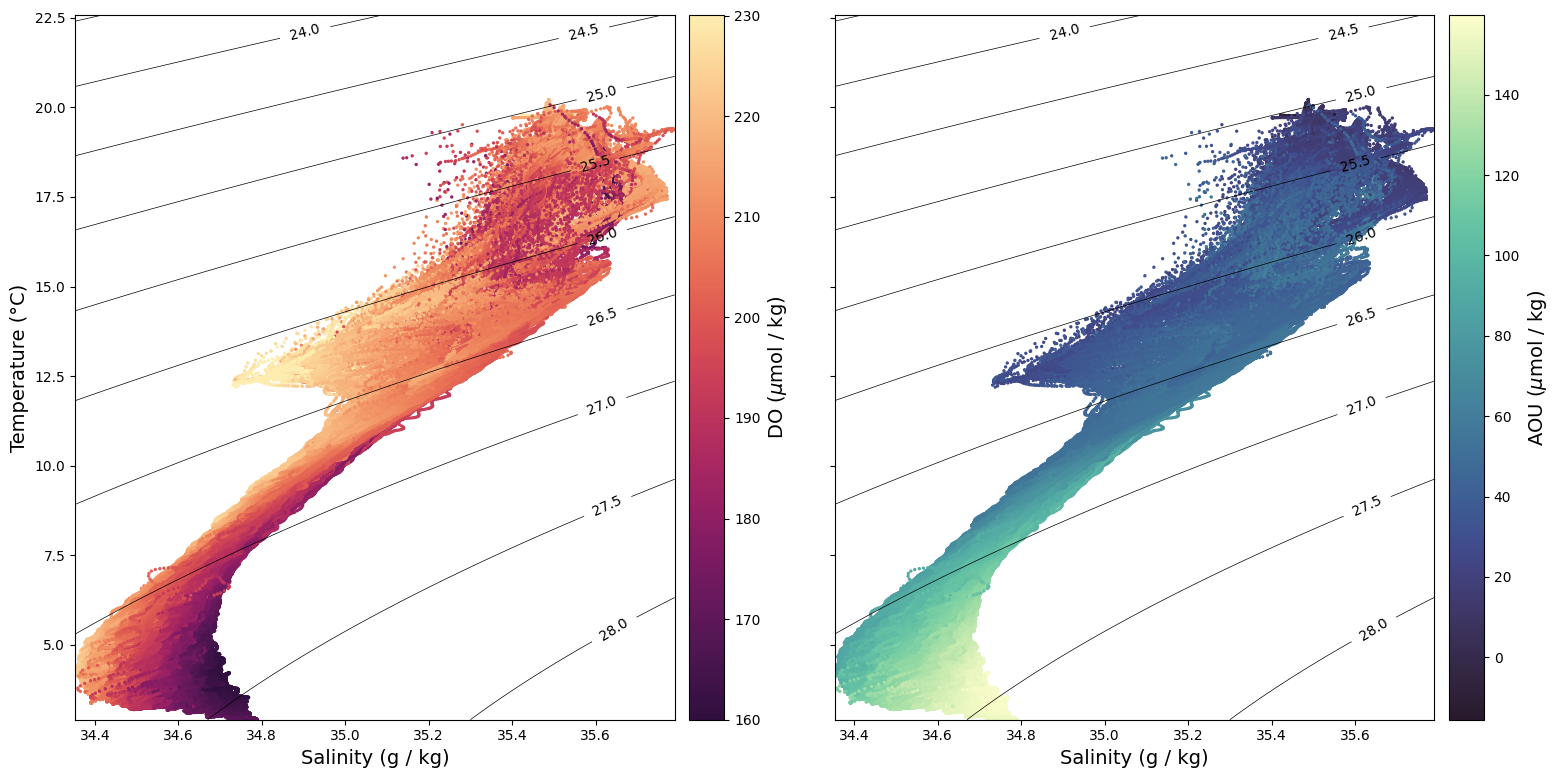

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import gsw
import cmocean.cm as cmo

# Assuming ds_work is a dataset with salinity, temperature, o2, and sol (oxygen saturation) data
# For example: ds_work = xr.Dataset({'salinity': ..., 'temp': ..., 'o2': ..., 'sol': ...})

fig, ax = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)

vmin = 160
vmax = 230

# Calculate density and AOU
density = gsw.sigma0(ds_work.salinity, ds_work.temp)
AOU = ds_work.sol - ds_work.o2

# Create the scatter plots with smaller dots (e.g., s=10)
img0 = ax[0].scatter(ds_work.salinity, ds_work.temp, c=ds_work.o2, cmap=cmo.matter_r, vmin=vmin, vmax=vmax, s=2)
img1 = ax[1].scatter(ds_work.salinity, ds_work.temp, c=AOU, cmap=cmo.deep_r, s=2)

# Add colorbars to the plots
cbar0 = plt.colorbar(img0, ax=ax[0], pad=0.02)
cbar0.set_label(r'DO ($\mu$mol / kg)')

cbar1 = plt.colorbar(img1, ax=ax[1], pad=0.02)
cbar1.set_label(r'AOU ($\mu$mol / kg)')

# Set axis labels
ax[0].set_xlabel('Salinity (g / kg)')
ax[0].set_ylabel('Temperature (°C)')
ax[1].set_xlabel('Salinity (g / kg)')

# Generate density contour levels
levels = np.arange(22, 30, 0.5)

# Create a grid of salinity and temperature
salinity_range = np.linspace(ds_work.salinity.min(), ds_work.salinity.max(), 100)
temperature_range = np.linspace(ds_work.temp.min(), ds_work.temp.max(), 100)
S_grid, T_grid = np.meshgrid(salinity_range, temperature_range)

# Calculate density on the grid
density_grid = gsw.sigma0(S_grid, T_grid)

# Add contour lines
contours0 = ax[0].contour(S_grid, T_grid, density_grid, levels=levels, colors='k', linewidths=0.5)
contours1 = ax[1].contour(S_grid, T_grid, density_grid, levels=levels, colors='k', linewidths=0.5)

# Add labels to contour lines
ax[0].clabel(contours0, inline=True, fontsize=10, fmt='%1.1f')
ax[1].clabel(contours1, inline=True, fontsize=10, fmt='%1.1f')

# Increase font sizes for all text and numbers
plt.rcParams.update({'font.size': 14})

#plt.grid()

# Set font sizes for specific elements
for a in ax:
    a.set_title(a.get_title(), fontsize=14)
    a.set_xlabel(a.get_xlabel(), fontsize=14)
    a.set_ylabel(a.get_ylabel(), fontsize=14)
    a.tick_params(axis='both', which='major', labelsize=10)
    a.invert_yaxis()

# Ensure colorbar tick labels are also adjusted
cbar0.ax.tick_params(axis='both', which='major', labelsize=10)
cbar1.ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()
